<a href="https://colab.research.google.com/github/Fulviacon/Lasflores/blob/main/Copia_de_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Carga del DataFrame

In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

file_path = next(iter(uploaded))

df = pd.read_csv(file_path)

pd.set_option('display.max_columns', None)

print(df.head())

df = pd.read_csv('VACUNAS_SELECCION_a.csv', sep=';')

# Contar el total de filas (cada fila es una persona)
total_personas = df.shape[0]

# Imprimir el total de personas que respondieron
print(f'Total de personas que respondieron: {total_personas}')


Saving VACUNAS_SELECCION_a.csv to VACUNAS_SELECCION_a.csv
  edad_continua;edades_agrupadas;niv_edu_3;vacuna_oro2;id_genero;residencia_regiones;ocupacion;cobertura_salud;enf_cronica;embarazo;info_wapp;info_face;info_ig;recibio_info;aplica_vacunas;desconoce_vac;no_quiere;no_paga;desconfianza_total;futuro_total;lucro_total;inmuno_total;score_antivacuna;falta_conf_total;riesgo_total;score_indecision_total;vacuna_score_t;pagaria_oro
0  16;1;2;1;1;2;1;4;2;2;0;1;0;1;1;0;0;0;7;9;11;6;...                                                                                                                                                                                                                                                                                                                                 
1  16;1;2;1;1;2;1;4;2;2;0;1;0;0;1;0;0;0;3;7;6;6;2...                                                                                                                                              

Gráficas de las frecuencias de cada variable Sociodemográfica

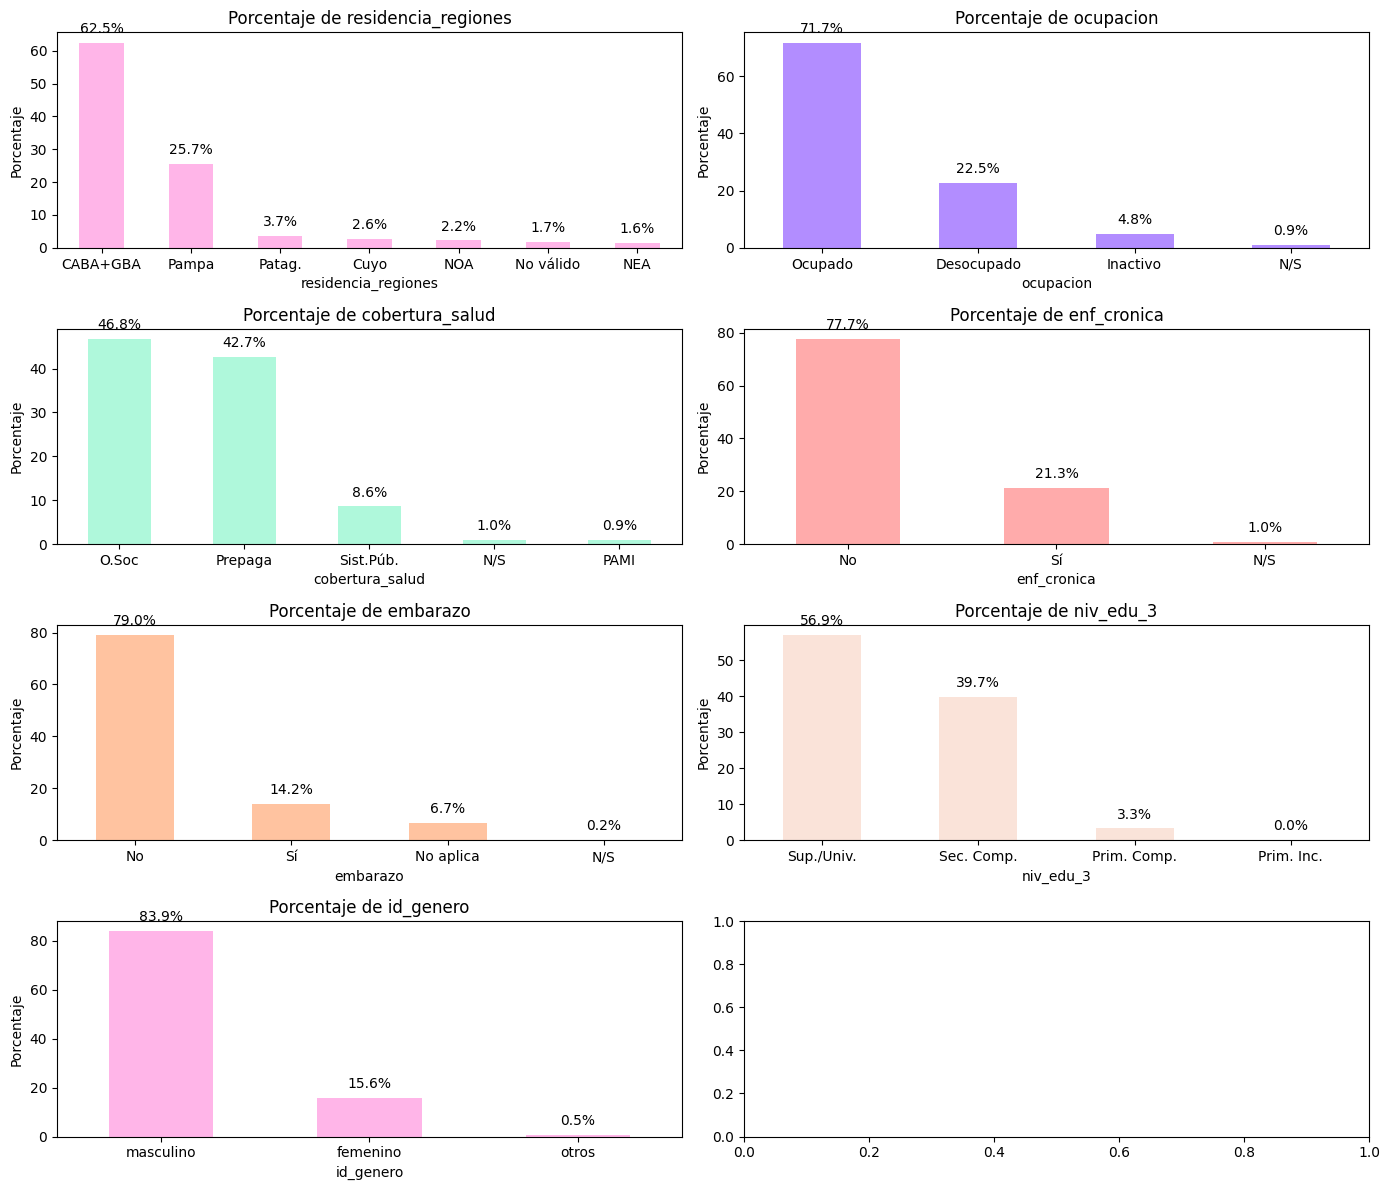

<Figure size 640x480 with 0 Axes>

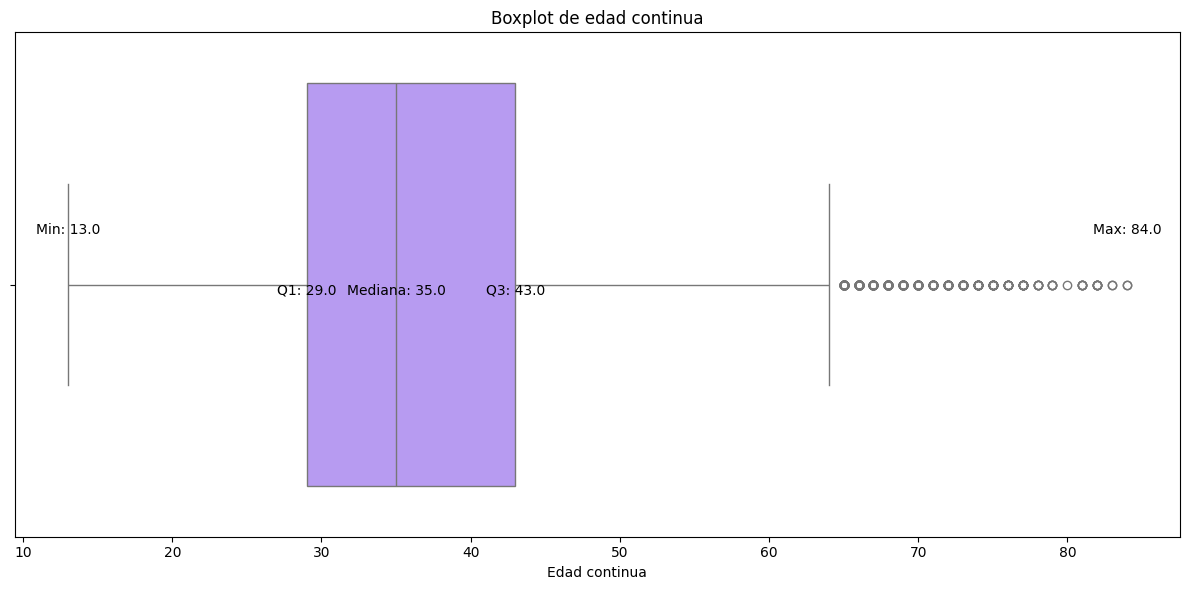

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/VACUNAS_SELECCION_a.csv'
df = pd.read_csv(file_path, sep=';')

# Diccionarios de mapeo
mapeo_embarazo = {1: 'Sí', 2: 'No', 3: 'No aplica', 0: 'N/S'}
mapeo_niv_edu_3 = {1: 'Prim. Inc.', 2: 'Prim. Comp.', 3: 'Sec. Comp.', 4: 'Sup./Univ.'}
mapeo_residencia = {1: 'CABA+GBA', 2: 'NOA', 3: 'NEA', 4: 'Cuyo', 5: 'Pampa', 6: 'Patag.', 9: 'No válido'}
mapeo_ocupacion = {1: 'Desocupado', 2: 'Inactivo', 3: 'Ocupado', 99: 'N/S'}
mapeo_cobertura = {1: 'Prepaga', 2: 'O.Soc', 3: 'PAMI', 4: 'Sist.Púb.', 0: 'N/S'}
mapeo_enf_cronica = {1: 'Sí', 2: 'No', 0: 'N/S'}
mapeo_genero = {1:'masculino', 2: 'femenino', 3: 'otros'}

# Aplicar el mapeo a las columnas correspondientes
df['embarazo'] = df['embarazo'].map(mapeo_embarazo)
df['niv_edu_3'] = df['niv_edu_3'].map(mapeo_niv_edu_3)
df['residencia_regiones'] = df['residencia_regiones'].map(mapeo_residencia)
df['ocupacion'] = df['ocupacion'].map(mapeo_ocupacion)
df['cobertura_salud'] = df['cobertura_salud'].map(mapeo_cobertura)
df['enf_cronica'] = df['enf_cronica'].map(mapeo_enf_cronica)
df['id_genero'] = df['id_genero'].map(mapeo_genero)

variables_categoricas = ['residencia_regiones', 'ocupacion', 'cobertura_salud', 'enf_cronica', 'embarazo', 'niv_edu_3', 'id_genero']

pastel_colors = ['#FFB5E8', '#B28DFF', '#AFF8DB', '#FFABAB', '#FFC3A0', '#FAE3D9']

# Ajustar el número de columnas para mostrar varios gráficos en la misma figura
fig, axes = plt.subplots(nrows=len(variables_categoricas)//2 + len(variables_categoricas) % 2, ncols=2, figsize=(14, 12))
axes = axes.flatten()

# Crear gráficos de barras para variables categóricas
for i, var in enumerate(variables_categoricas):
# Calcular las frecuencias en porcentaje
    frequencies = df[var].value_counts(normalize=True) * 100

# Graficar barras con color pastel
    bars = frequencies.plot(kind='bar', color=pastel_colors[i % len(pastel_colors)], ax=axes[i])
    axes[i].set_title(f'Porcentaje de {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Porcentaje')
    axes[i].tick_params(axis='x', rotation=0)

# Añadir etiquetas con los valores porcentuales en cada barra
    for bar in bars.patches:
        axes[i].annotate(f'{bar.get_height():.1f}%',
                         xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                         xytext=(0, 5),  # Desplazamiento de la etiqueta
                         textcoords='offset points',
                         ha='center', va='bottom')

# Ajustar el espacio entre los gráficos
plt.tight_layout()
plt.show()

# Ajustar el espacio entre los gráficos
plt.tight_layout()
plt.show()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
# Define una variable llamada file_path que contiene la ruta donde se encuentra el archivo CSV que se va a cargar.
# En este caso, el archivo está ubicado en el directorio /content/, lo que indica que probablemente se está utilizando Google Colab.
# un archivo CSV ubicado en /content/VACUNAS_SELECCION_a.csv, con campos separados por punto y coma (;)
file_path = '/content/VACUNAS_SELECCION_a.csv'
df = pd.read_csv(file_path, sep=';')
# Utiliza la función read_csv() de la librería pandas (importada como pd) para leer el archivo CSV desde la ruta especificada en file_path.
# El parámetro sep=';' indica que el separador de los datos en el archivo es el punto y coma (;), en lugar del separador por defecto que es la coma (',').
# Los datos se cargan en un DataFrame df, que es la estructura principal de pandas para manejar datos tabulares.


# Crear el boxplot para la variable numérica 'edad_continua' con color pastel
plt.figure(figsize=(12, 6))
boxplot = sns.boxplot(x=df['edad_continua'], color='#B28DFF')
plt.title('Boxplot de edad continua')
plt.xlabel('Edad continua')

# Extraer los valores clave del boxplot
quartiles = df['edad_continua'].quantile([0.25, 0.5, 0.75])
#Calcula los cuartiles del 25% (q1), el 50% (median o mediana) y el 75% (q3) de la columna edad_continua.
#La función quartile() devuelve los valores correspondientes a estos percentiles y los almacena en el objeto quartiles.
q1, median, q3 = quartiles[0.25], quartiles[0.5], quartiles[0.75]
#Extrae los valores del primer cuartil (q1), la mediana y el tercer cuartil (q3) a partir del objeto quartiles.
#Estos valores son esenciales para definir la caja del boxplot.
min_val = df['edad_continua'].min()
# Calcula el valor mínimo de la columna edad_continua.
max_val = df['edad_continua'].max()
# Calcula el valor máximo de la columna edad_continua.

# Anotar los valores en el gráfico
plt.text(median, 0.02, f'Mediana: {median:.1f}', horizontalalignment='center', color='black', fontsize=10)
plt.text(q1, 0.02, f'Q1: {q1:.1f}', horizontalalignment='center', color='black', fontsize=10)
plt.text(q3, 0.02, f'Q3: {q3:.1f}', horizontalalignment='center', color='black', fontsize=10)
plt.text(min_val, -0.1, f'Min: {min_val:.1f}', horizontalalignment='center', color='black', fontsize=10)
plt.text(max_val, -0.1, f'Max: {max_val:.1f}', horizontalalignment='center', color='black', fontsize=10)

# Ajustar el gráfico
plt.tight_layout()
plt.show()



Representación de los score Anti-vacunas.

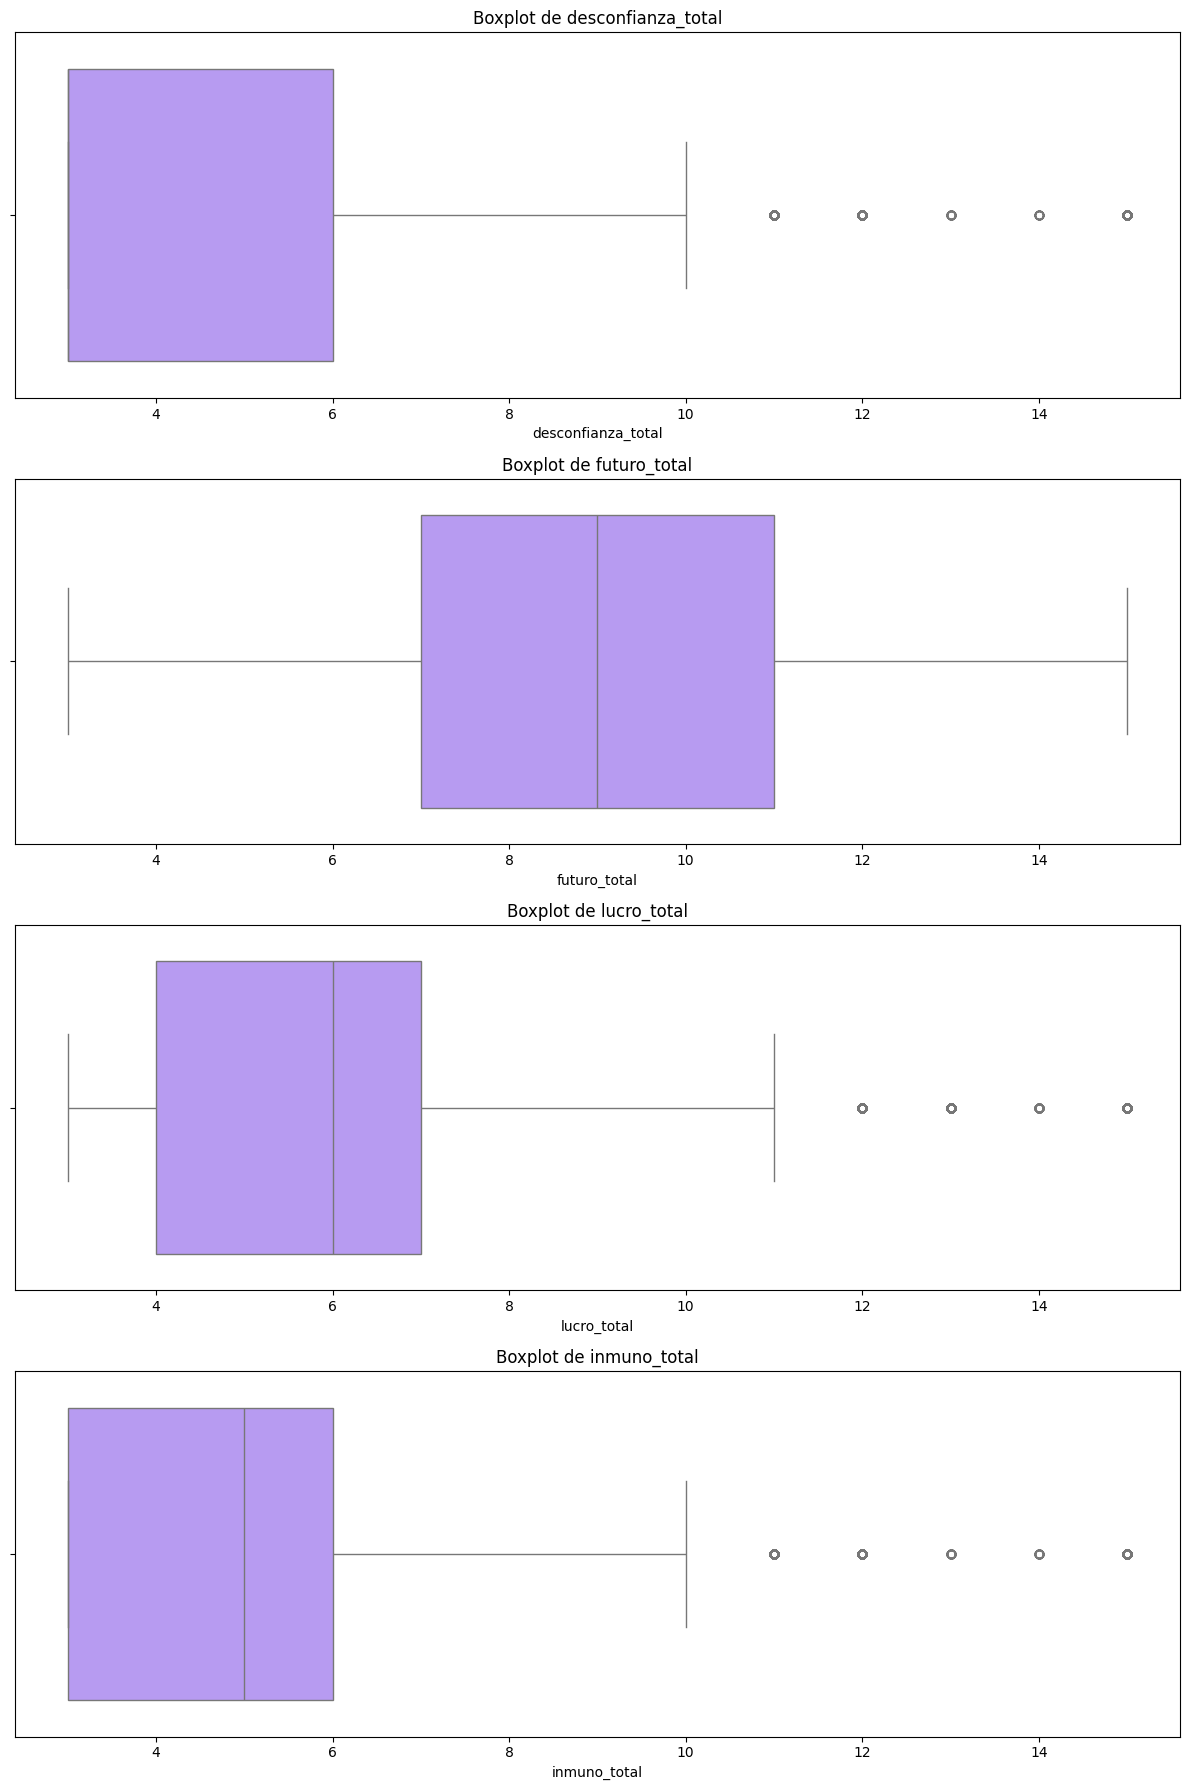

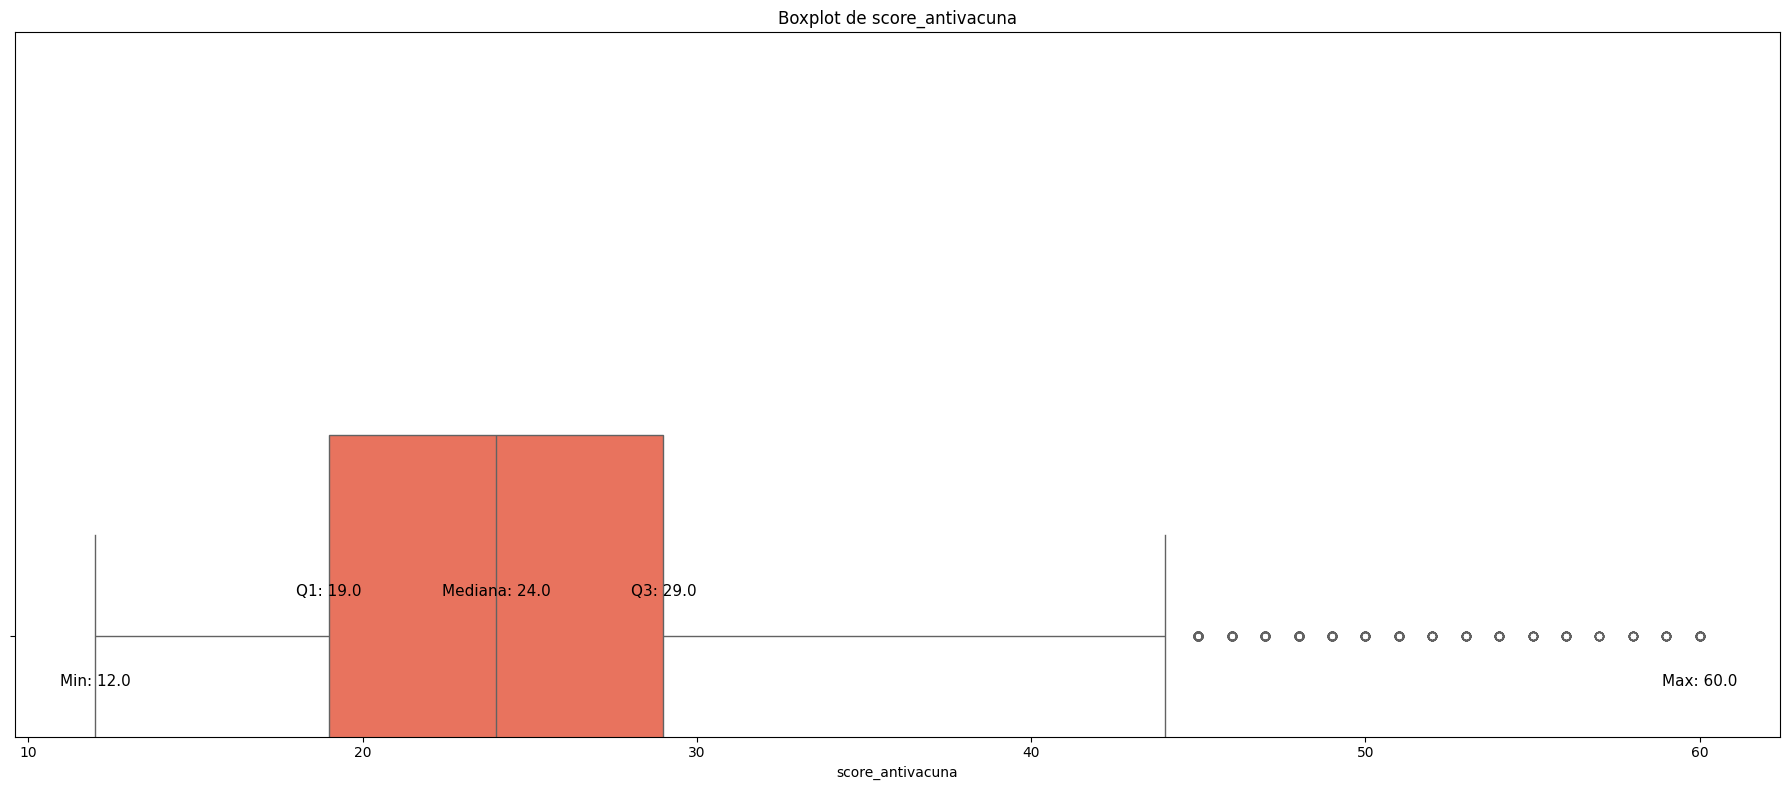

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el archivo CSV
df = pd.read_csv('VACUNAS_SELECCION_a.csv', sep=';')

# Calcular el score antivacunas sumando las variables: desconfianza_total, futuro_total, lucro_total, inmuno_total
df['score_antivacuna'] = df['desconfianza_total'] + df['futuro_total'] + df['lucro_total'] + df['inmuno_total']

# Lista de variables a graficar (excepto 'score_antivacuna')
variables = ['desconfianza_total', 'futuro_total', 'lucro_total', 'inmuno_total']

# Crear un layout para los boxplots de las variables restantes
plt.figure(figsize=(12, 18))  # Aumentamos el tamaño de la figura para más espacio vertical

for i, var in enumerate(variables):
    plt.subplot(len(variables), 1, i+1)  # 1 gráfico por fila para más espacio en el eje X
    sns.boxplot(x=df[var], color='#B28DFF')  # Color habitual para las demás variables
    plt.title(f'Boxplot de {var}')
    plt.xlabel(var)

# Ajustar el espacio entre los gráficos
plt.tight_layout()
plt.show()

# Gráfico independiente para score_antivacuna ya ajustado
plt.figure(figsize=(18, 8))  # Tamaño más grande para score_antivacuna
boxplot = sns.boxplot(x=df['score_antivacuna'], color='#FF6347')  # Color diferente para score_antivacuna (rojo tomate)

# Calcular valores estadísticos clave para score_antivacuna
quartiles = df['score_antivacuna'].quantile([0.25, 0.5, 0.75])
q1, median, q3 = quartiles[0.25], quartiles[0.5], quartiles[0.75]
min_val = df['score_antivacuna'].min()
max_val = df['score_antivacuna'].max()

# Añadir etiquetas con valores clave, y ajustar su posición para evitar superposiciones
plt.text(median, 0.08, f'Mediana: {median:.1f}', horizontalalignment='center', color='black', fontsize=11)
plt.text(q1, 0.08, f'Q1: {q1:.1f}', horizontalalignment='center', color='black', fontsize=11)
plt.text(q3, 0.08, f'Q3: {q3:.1f}', horizontalalignment='center', color='black', fontsize=11)
plt.text(min_val, -0.1, f'Min: {min_val:.1f}', horizontalalignment='center', color='black', fontsize=11)
plt.text(max_val, -0.1, f'Max: {max_val:.1f}', horizontalalignment='center', color='black', fontsize=11)

# Ajustar los límites del eje Y para más espacio vertical
plt.ylim(-0.2, 1.2)  # Añadir espacio extra en el eje Y

plt.title('Boxplot de score_antivacuna')
plt.xlabel('score_antivacuna')

# Mostrar el gráfico ajustado
plt.tight_layout()
plt.show()


Representación del score Indecisión.

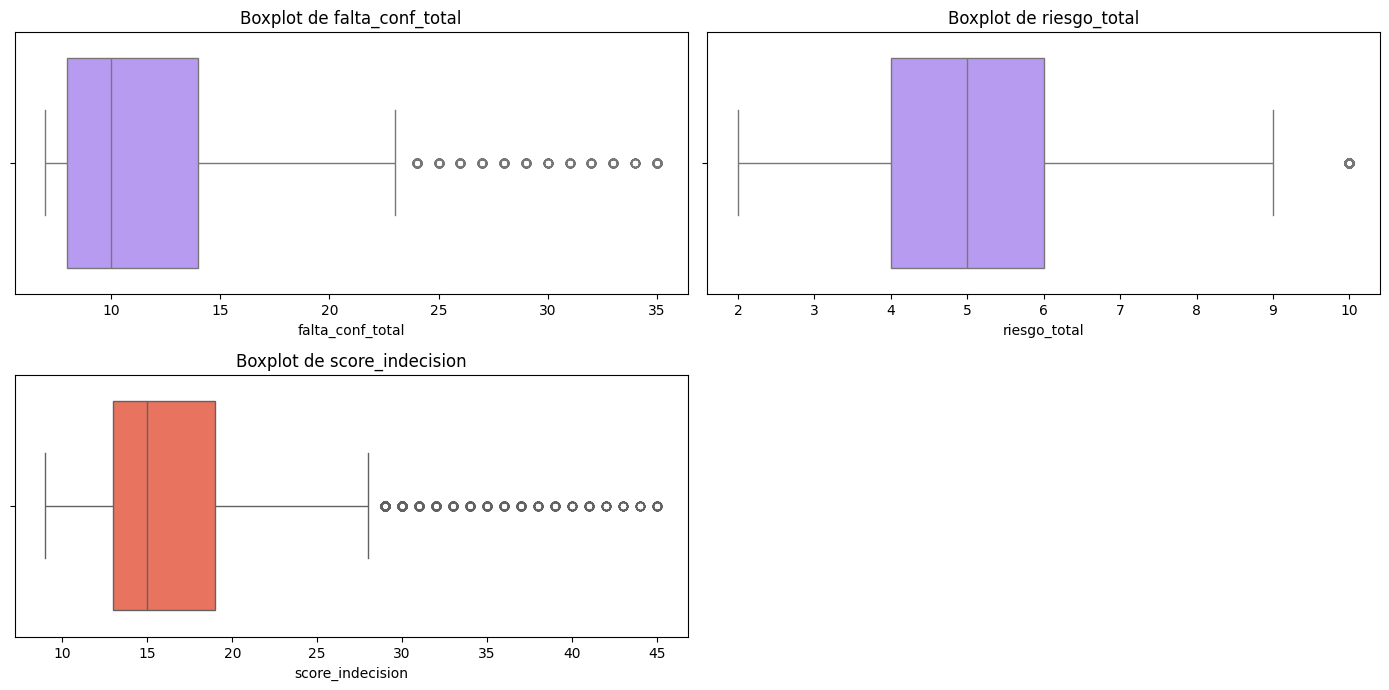

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('VACUNAS_SELECCION_a.csv', sep=';')

# Calcular el score de indecisión sumando falta_conf_total y riesgo_total
df['score_indecision'] = df['falta_conf_total'] + df['riesgo_total']

# Lista de variables a graficar, incluyendo el score_indecision
variables = ['falta_conf_total', 'riesgo_total', 'score_indecision']

# Crear boxplots para cada una de las variables
plt.figure(figsize=(14, 10))
for i, var in enumerate(variables):
    plt.subplot(3, 2, i+1)

    # Condición para cambiar el color del boxplot del score_indecision
    if var == 'score_indecision':
        sns.boxplot(x=df[var], color='#FF6347')  # Pintar en rojo (tomate) el score_indecision
    else:
        sns.boxplot(x=df[var], color='#B28DFF')  # Color pastel morado para las demás variables

    # Títulos y etiquetas
    plt.title(f'Boxplot de {var}')
    plt.xlabel(var)

# Ajustar el espacio entre gráficos
plt.tight_layout()
plt.show()


Identificar clusters en función de la desconfianza ; actitud hacia la vacunación general y hacia oropouche.
Este código genera cuatro tipos de gráficos que permiten visualizar y analizar los **clusters latentes** identificados en los datos, proporcionando una representación visual de la agrupación de individuos según sus características y actitudes:

### 1. **Gráfico de Dispersión 2D (PCA)**

- **Qué muestra:** Reduce la cantidad de variables a dos componentes principales mediante un análisis de componentes principales (PCA). Cada punto en el gráfico representa un individuo del dataset, y los colores indican a qué cluster pertenece cada uno.
- **Interpretación:** Este gráfico permite visualizar la separación y agrupación de los individuos en un plano bidimensional, facilitando la comprensión de cómo se agrupan en función de sus características. Si los clusters están bien definidos, deberías ver grupos de puntos claramente diferenciados.

### 2. **Gráfico de Dispersión 3D (PCA)**

- **Qué muestra:** Similar al gráfico de dispersión en 2D, pero utiliza tres componentes principales. Muestra los clusters en un espacio tridimensional.
- **Interpretación:** Proporciona una representación más rica de los clusters al añadir una tercera dimensión, permitiendo explorar mejor la estructura interna de los grupos. Este gráfico es útil cuando los clusters no están bien separados en 2D, pero pueden estar más diferenciados en 3D.

### 3. **Gráfico de Barras: Distribución de Individuos por Cluster**

- **Qué muestra:** Un gráfico de barras que indica cuántos individuos pertenecen a cada cluster latente.
- **Interpretación:** Este gráfico es útil para ver si los clusters son equilibrados o si algunos tienen muchos más individuos que otros. Un desequilibrio podría sugerir la necesidad de ajustar el número de clusters o investigar por qué ciertos grupos son más grandes.

### 4. **Gráfico de Radar: Comparación de Medias de Variables por Cluster**

- **Qué muestra:** Un gráfico de radar que compara las medias de variables clave entre los diferentes clusters. Cada línea del gráfico representa un cluster, y cada eje es una variable como *desconfianza total*, *futuro total*, *lucro total*, etc.
- **Interpretación:** Permite ver cómo varían las actitudes y características entre los diferentes clusters. Si las líneas de los clusters son muy diferentes en una o más variables, esto sugiere que esas variables son importantes para diferenciar los grupos.

### **Resumen de lo que demuestran:**

- **Estructura de los clusters:** Los gráficos de dispersión (2D y 3D) permiten evaluar visualmente cómo se distribuyen los individuos en los clusters y si hay una clara separación entre ellos.
- **Distribución de los individuos:** El gráfico de barras muestra el tamaño de cada cluster, lo que permite evaluar la proporción de individuos en cada grupo.
- **Características y actitudes:** El gráfico de radar muestra las diferencias en variables clave entre los clusters, lo que ayuda a entender las características específicas que definen cada grupo.

Estos gráficos te permiten analizar tanto la calidad de la clasificación de los clusters como las diferencias significativas entre ellos.

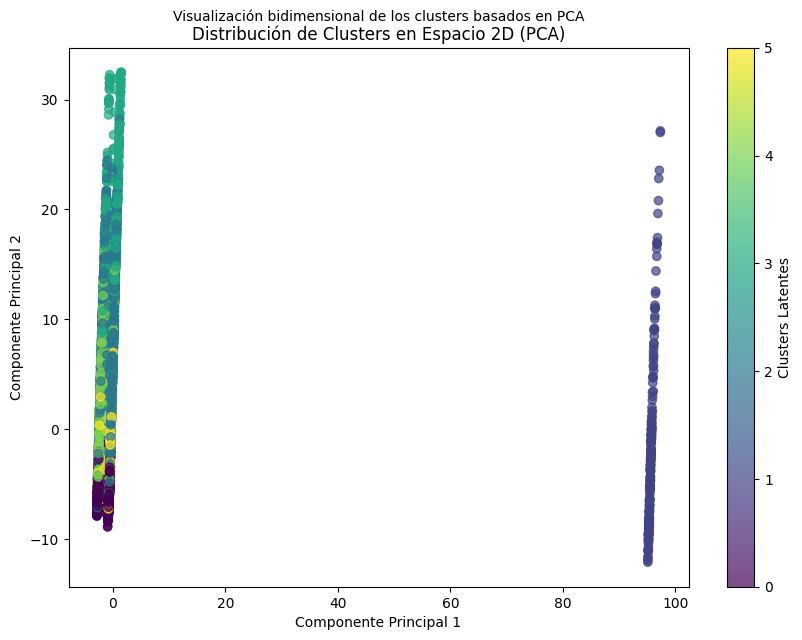

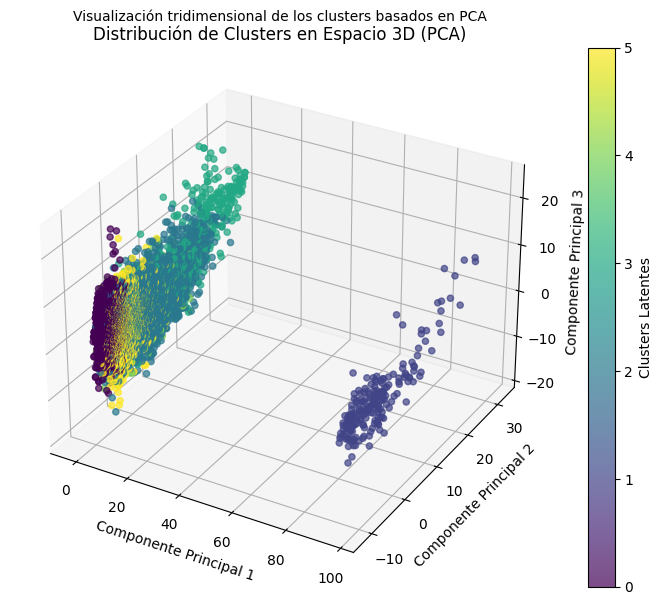

<ipython-input-6-9b5c4f9d7c37>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=clases_asignadas, palette='viridis')


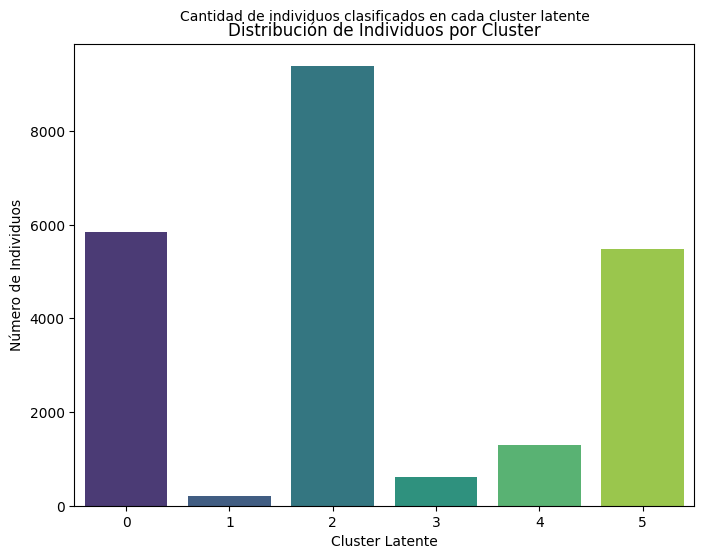

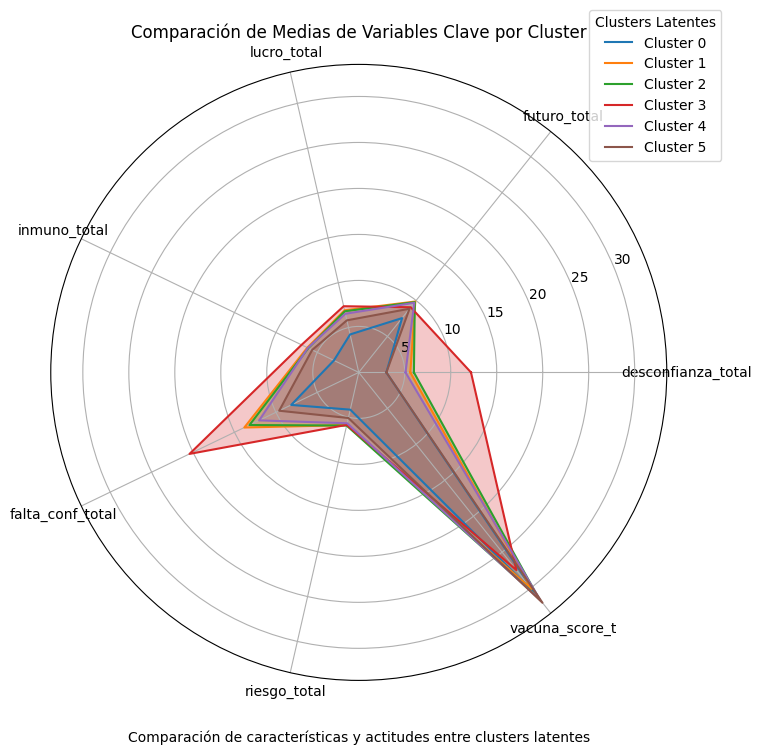

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.mixture import GaussianMixture
# Cargar el archivo CSV
df = pd.read_csv('VACUNAS_SELECCION_a.csv', sep=';')

# Definir las columnas a usar en el análisis
columns_to_use = ['edades_agrupadas', 'ocupacion', 'desconfianza_total', 'futuro_total',
                  'lucro_total', 'inmuno_total', 'falta_conf_total', 'riesgo_total',
                  'vacuna_score_t']

# Ajustar el modelo GaussianMixture con 6 clases (por ejemplo)
lca_model6 = GaussianMixture(n_components=6, random_state=42)
lca_model6.fit(df[columns_to_use])

# Asignación de individuos a clases
probabilidades = lca_model6.predict_proba(df[columns_to_use])
clases_asignadas = np.argmax(probabilidades, axis=1)


# 1. Gráfico de Dispersión 2D (PCA)
pca = PCA(n_components=2)
pca_2d = pca.fit_transform(df[columns_to_use])

plt.figure(figsize=(10, 7))
scatter = plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=clases_asignadas, cmap='viridis', alpha=0.7)
plt.title("Distribución de Clusters en Espacio 2D (PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(scatter, label="Clusters Latentes")
plt.annotate("Visualización bidimensional de los clusters basados en PCA", (0.5, 1.05), xycoords='axes fraction', ha='center')
plt.show()

# 2. Gráfico de Dispersión 3D (PCA)
pca_3d = PCA(n_components=3).fit_transform(df[columns_to_use])

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_3d[:, 0], pca_3d[:, 1], pca_3d[:, 2], c=clases_asignadas, cmap='viridis', alpha=0.7)
ax.set_title("Distribución de Clusters en Espacio 3D (PCA)")
ax.set_xlabel("Componente Principal 1")
ax.set_ylabel("Componente Principal 2")
ax.set_zlabel("Componente Principal 3")
fig.colorbar(scatter, ax=ax, label="Clusters Latentes")
ax.text2D(0.5, 1.05, "Visualización tridimensional de los clusters basados en PCA", transform=ax.transAxes, ha='center')
plt.show()

# 3. Gráfico de Barras: Distribución de Individuos por Cluster
plt.figure(figsize=(8, 6))
sns.countplot(x=clases_asignadas, palette='viridis')
plt.title("Distribución de Individuos por Cluster")
plt.xlabel("Cluster Latente")
plt.ylabel("Número de Individuos")
plt.annotate("Cantidad de individuos clasificados en cada cluster latente", (0.5, 1.05), xycoords='axes fraction', ha='center')
plt.show()

# 4. Gráfico de Radar: Comparación de Medias de Variables por Cluster
from math import pi

# Obtener las medias por cluster de las variables seleccionadas
media_por_cluster = df.groupby(clases_asignadas).mean()[['desconfianza_total', 'futuro_total', 'lucro_total',
                                                        'inmuno_total', 'falta_conf_total', 'riesgo_total',
                                                        'vacuna_score_t']]

# Preparar los datos para el gráfico de radar
variables = media_por_cluster.columns
n_clusters = len(media_por_cluster)
angles = np.linspace(0, 2 * np.pi, len(variables), endpoint=False).tolist()
angles += angles[:1]

# Inicializar el gráfico de radar
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Dibujar cada cluster
for i in range(n_clusters):
    values = media_por_cluster.iloc[i].tolist()
    values += values[:1]  # Cerrar el gráfico de radar
    ax.plot(angles, values, label=f'Cluster {i}')
    ax.fill(angles, values, alpha=0.25)

# Añadir etiquetas y leyenda
ax.set_title("Comparación de Medias de Variables Clave por Cluster")
ax.set_xticks(angles[:-1])
ax.set_xticklabels(variables)
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1), title="Clusters Latentes")
plt.annotate("Comparación de características y actitudes entre clusters latentes", (0.5, -0.1), xycoords='axes fraction', ha='center')
plt.show()


Vamos a analizar los resultados de los modelos de regresión logística multinomial ajustados para las variables `vacuna_oro2` y `pagaria_oro`:

### Modelo para `vacuna_oro2`

**Estadísticas Generales:**
- **Número de Observaciones**: 22,822
- **Pseudo R-squared**: 0.3588, lo que indica que el modelo explica aproximadamente el 35.88% de la variación en la variable dependiente.
- **Log-Likelihood**: -4477.1
- **LL-Null**: -6982.9
- **LLR p-value**: 0.000, indicando que el modelo es significativamente diferente del modelo nulo.

**Coeficientes y Significancia:**
- **const**: 6.2721, p < 0.001. El intercepto es significativo.
- **edades_agrupadas**: 0.9170, p < 0.001. El coeficiente positivo indica que a medida que aumenta la edad, la probabilidad de decir "sí" a vacunarse para Oropouche aumenta.
- **ocupacion**: -0.0013, p = 0.614. No es significativo, lo que sugiere que la ocupación no tiene un efecto relevante en la decisión de vacunarse.
- **desconfianza_total**: -0.0846, p < 0.001. Un aumento en la desconfianza hacia las vacunas reduce la probabilidad de vacunarse.
- **futuro_total**: -0.0717, p < 0.001. Un aumento en las preocupaciones sobre los efectos futuros también reduce la probabilidad de vacunarse.
- **lucro_total**: -0.0851, p < 0.001. Las preocupaciones sobre el lucro comercial disminuyen la probabilidad de vacunarse.
- **inmuno_total**: -0.1431, p < 0.001. La preferencia por la inmunidad natural reduce significativamente la probabilidad de vacunarse.
- **falta_conf_total**: -0.1089, p < 0.001. La falta de confianza general en las vacunas disminuye la probabilidad de vacunarse.
- **riesgo_total**: -0.4693, p < 0.001. Las preocupaciones sobre los riesgos asociados con las vacunas tienen el mayor impacto negativo en la probabilidad de vacunarse.
- **vacuna_score_t**: 0.0386, p < 0.001. Un aumento en el puntaje de actitud hacia las vacunas aumenta ligeramente la probabilidad de vacunarse.

### Modelo para `pagaria_oro`

**Estadísticas Generales:**
- **Número de Observaciones**: 22,822
- **Pseudo R-squared**: 0.0005701, indicando que el modelo explica muy poco de la variación en la variable dependiente.
- **Log-Likelihood**: -15601
- **LL-Null**: -15610
- **LLR p-value**: 0.03760, indicando que el modelo tiene alguna capacidad predictiva, aunque el pseudo R-squared es muy bajo.

**Coeficientes y Significancia:**
- **const**: 0.4724, p = 0.005. El intercepto es significativo.
- **edades_agrupadas**: -0.0495, p = 0.292. No es significativo, indicando que la edad no tiene un efecto relevante en la disposición a pagar por la vacuna.
- **ocupacion**: -0.0033, p = 0.023. Un coeficiente negativo y significativo sugiere que, en promedio, las personas con diferentes ocupaciones tienen menor disposición a pagar por la vacuna.
- **desconfianza_total**: 0.0069, p = 0.365. No es significativo, por lo que la desconfianza no parece influir significativamente en la disposición a pagar.
- **futuro_total**: -0.0105, p = 0.117. No es significativo, indicando que las preocupaciones sobre los efectos futuros no afectan de manera significativa la disposición a pagar.
- **lucro_total**: 0.0172, p = 0.025. Un aumento en las preocupaciones sobre el lucro comercial está asociado con una mayor disposición a pagar por la vacuna.
- **inmuno_total**: 0.0029, p = 0.721. No es significativo, por lo que la preferencia por la inmunidad natural no afecta significativamente la disposición a pagar.
- **falta_conf_total**: -0.0088, p = 0.059. Casi significativo, indicando que la falta de confianza podría tener un impacto en la disposición a pagar, pero no de manera fuerte.
- **riesgo_total**: -0.0055, p = 0.586. No es significativo, sugiriendo que las preocupaciones sobre los riesgos no afectan significativamente la disposición a pagar.
- **vacuna_score_t**: -0.0005, p = 0.898. No es significativo, lo que sugiere que el puntaje de actitud hacia las vacunas no tiene un impacto relevante en la disposición a pagar.

### Resumen
- El modelo para `vacuna_oro2` muestra un buen ajuste con varios factores significativamente relacionados con la decisión de vacunarse, especialmente las actitudes negativas hacia las vacunas y preocupaciones sobre riesgos.
- El modelo para `pagaria_oro` tiene un ajuste pobre y las variables predictoras tienen efectos menos claros y significativos. Esto podría indicar que otros factores no incluidos en el modelo podrían estar influyendo en la disposición a pagar por la vacuna.

In [ ]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Cargar el archivo CSV
df = pd.read_csv('VACUNAS_SELECCION_a.csv', sep=';')

# Reemplazar los valores 99 con NaN y eliminar las filas con valores NaN en las columnas relevantes
df['vacuna_oro2'] = df['vacuna_oro2'].replace(99, np.nan)
df['pagaria_oro'] = df['pagaria_oro'].replace(99, np.nan)
df.dropna(subset=['vacuna_oro2', 'pagaria_oro'], inplace=True)

# Convertir las variables a formato categórico
df['vacuna_oro2'] = df['vacuna_oro2'].astype('int')
df['pagaria_oro'] = df['pagaria_oro'].astype('int')

# Definir el conjunto de variables predictoras (independientes)
columns_to_use = ['edades_agrupadas', 'ocupacion', 'desconfianza_total', 'futuro_total', 'lucro_total',
                   'inmuno_total', 'falta_conf_total', 'riesgo_total', 'vacuna_score_t']  # Lista de columnas a usar
X = df[columns_to_use]

# Agregar una constante para la intersección en el modelo
X = sm.add_constant(X)

# Crear el modelo de Regresión Logística Multinomial para `vacuna_oro2`
modelo_vacuna = sm.MNLogit(df['vacuna_oro2'], X)
resultado_vacuna = modelo_vacuna.fit()

# Mostrar el resumen del modelo para `vacuna_oro2`
print("Modelo para 'vacuna_oro2':")
print(resultado_vacuna.summary())

# Crear el modelo de Regresión Logística Multinomial para `pagaria_oro`
modelo_pagaria = sm.MNLogit(df['pagaria_oro'], X)
resultado_pagaria = modelo_pagaria.fit()

# Mostrar el resumen del modelo para `pagaria_oro`
print("Modelo para 'pagaria_oro':")
print(resultado_pagaria.summary())


Optimization terminated successfully.
         Current function value: 0.196177
         Iterations 8
Modelo para 'vacuna_oro2':
                          MNLogit Regression Results                          
Dep. Variable:            vacuna_oro2   No. Observations:                22822
Model:                        MNLogit   Df Residuals:                    22812
Method:                           MLE   Df Model:                            9
Date:                Mon, 16 Sep 2024   Pseudo R-squ.:                  0.3588
Time:                        01:51:35   Log-Likelihood:                -4477.1
converged:                       True   LL-Null:                       -6982.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
     vacuna_oro2=1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.2721      0.348     18.012      0.000   

Explicación del Código
DataFrames: Se crean dos DataFrames, df_vacuna_oro2 y df_pagaria_oro, con los coeficientes, errores estándar y p-valores para cada variable en los modelos correspondientes.

Visualización:

Gráfico de Coeficientes: Utiliza seaborn para crear gráficos de barras horizontales que muestran los coeficientes y errores estándar de cada variable.
Errores Estándar: Se añaden barras de error para visualizar la precisión de las estimaciones de los coeficientes.
Estilo: Se configura un estilo de gráfico claro y sencillo usando paletas de colores pastel para mejorar la legibilidad.

Estos gráficos te permitirán visualizar rápidamente el impacto de cada variable en los modelos y evaluar la significancia de los coeficientes.








<ipython-input-22-8784479ccf04>:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Coeficiente', y='Variable', data=df_vacuna_oro2, palette='pastel',
<ipython-input-22-8784479ccf04>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Coeficiente', y='Variable', data=df_vacuna_oro2, palette='pastel',


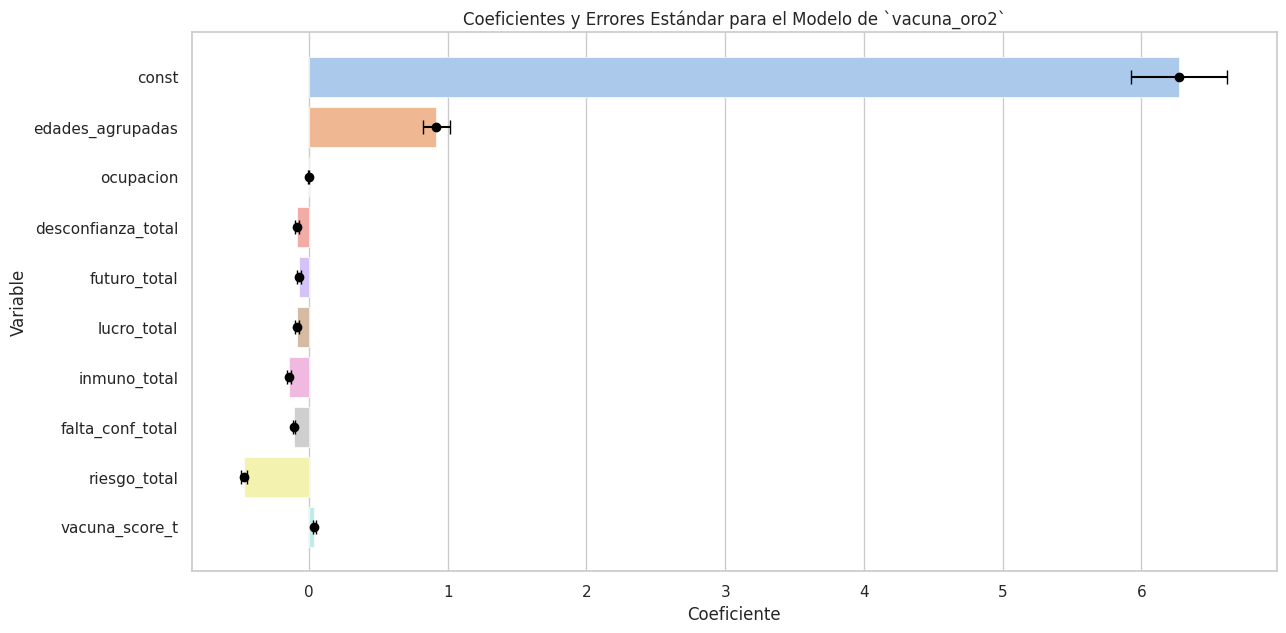

<ipython-input-22-8784479ccf04>:48: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Coeficiente', y='Variable', data=df_pagaria_oro, palette='pastel',
<ipython-input-22-8784479ccf04>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Coeficiente', y='Variable', data=df_pagaria_oro, palette='pastel',


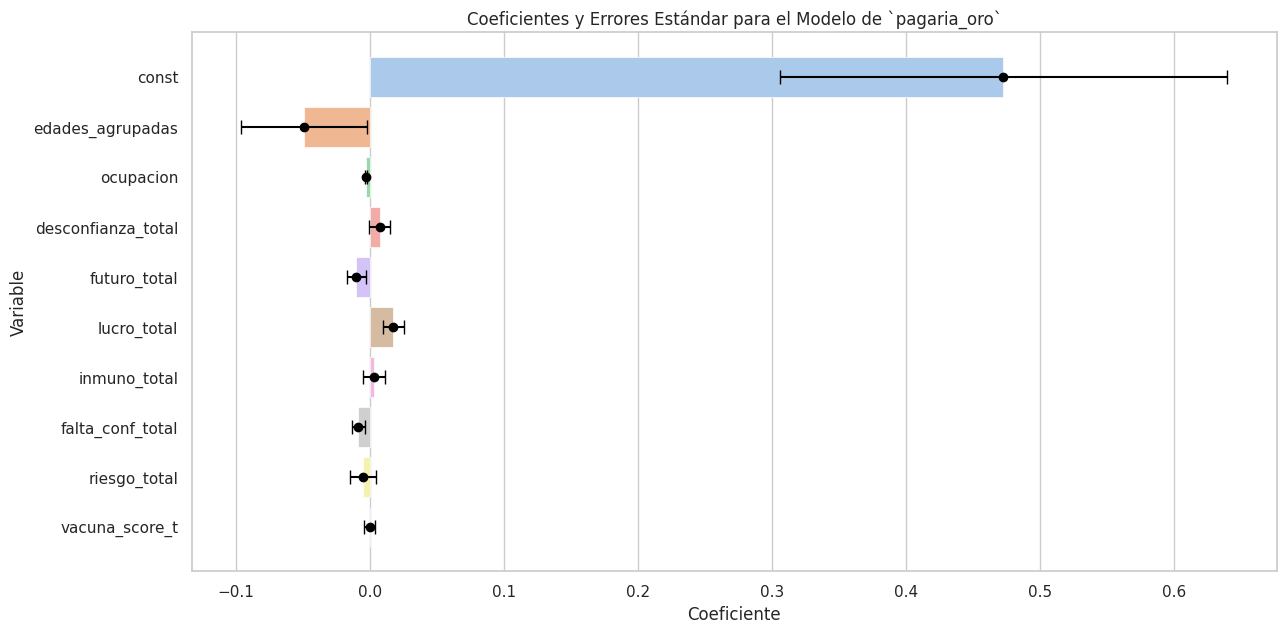

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Crear un DataFrame con los coeficientes y errores estándar para vacuna_oro2
coef_vacuna_oro2 = {
    'Variable': ['const', 'edades_agrupadas', 'ocupacion', 'desconfianza_total',
                 'futuro_total', 'lucro_total', 'inmuno_total', 'falta_conf_total',
                 'riesgo_total', 'vacuna_score_t'],
    'Coeficiente': [6.2721, 0.9170, -0.0013, -0.0846, -0.0717, -0.0851, -0.1431,
                    -0.1089, -0.4693, 0.0386],
    'Error_Estandar': [0.348, 0.096, 0.003, 0.014, 0.015, 0.014, 0.015, 0.008,
                       0.022, 0.008],
    'p-valor': [0.000, 0.000, 0.614, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000]
}
df_vacuna_oro2 = pd.DataFrame(coef_vacuna_oro2)

# Crear un DataFrame con los coeficientes y errores estándar para pagaria_oro
coef_pagaria_oro = {
    'Variable': ['const', 'edades_agrupadas', 'ocupacion', 'desconfianza_total',
                 'futuro_total', 'lucro_total', 'inmuno_total', 'falta_conf_total',
                 'riesgo_total', 'vacuna_score_t'],
    'Coeficiente': [0.4724, -0.0495, -0.0033, 0.0069, -0.0105, 0.0172, 0.0029,
                    -0.0088, -0.0055, -0.0005],
    'Error_Estandar': [0.167, 0.047, 0.001, 0.008, 0.007, 0.008, 0.008, 0.005,
                       0.010, 0.004],
    'p-valor': [0.005, 0.292, 0.023, 0.365, 0.117, 0.025, 0.721, 0.059, 0.586, 0.898]
}
df_pagaria_oro = pd.DataFrame(coef_pagaria_oro)

# Configuración del estilo de los gráficos
sns.set(style="whitegrid")

# Gráfico para `vacuna_oro2`
plt.figure(figsize=(14, 7))
ax = sns.barplot(x='Coeficiente', y='Variable', data=df_vacuna_oro2, palette='pastel',
                 ci=None, orient='h', linewidth=0.5)
ax.errorbar(df_vacuna_oro2['Coeficiente'], df_vacuna_oro2['Variable'],
            xerr=df_vacuna_oro2['Error_Estandar'], fmt='o', color='black',
            capsize=5, capthick=1)
plt.title('Coeficientes y Errores Estándar para el Modelo de `vacuna_oro2`')
plt.xlabel('Coeficiente')
plt.ylabel('Variable')
plt.show()

# Gráfico para `pagaria_oro`
plt.figure(figsize=(14, 7))
ax = sns.barplot(x='Coeficiente', y='Variable', data=df_pagaria_oro, palette='pastel',
                 ci=None, orient='h', linewidth=0.5)
ax.errorbar(df_pagaria_oro['Coeficiente'], df_pagaria_oro['Variable'],
            xerr=df_pagaria_oro['Error_Estandar'], fmt='o', color='black',
            capsize=5, capthick=1)
plt.title('Coeficientes y Errores Estándar para el Modelo de `pagaria_oro`')
plt.xlabel('Coeficiente')
plt.ylabel('Variable')
plt.show()


Vamos a analizar los gráficos generados para los modelos de `vacuna_oro2` y `pagaria_oro`:

### Gráfico para `vacuna_oro2`

**Visualización:**
- **Barras**: Cada barra horizontal representa el coeficiente de una variable en el modelo de regresión logística multinomial para `vacuna_oro2`.
- **Errores Estándar**: Las barras de error en negro indican el rango de incertidumbre alrededor de cada coeficiente.

**Interpretación:**
- **Coeficientes Positivos**: Variables como `edades_agrupadas` y `vacuna_score_t` tienen coeficientes positivos, lo que indica que un aumento en estas variables está asociado con una mayor probabilidad de responder "sí" a la pregunta sobre la vacunación para Oropouche.
  - **edades_agrupadas**: Un aumento en la edad está asociado con una mayor probabilidad de vacunarse. Esto podría reflejar un mayor nivel de experiencia o responsabilidad en personas mayores.
  - **vacuna_score_t**: Un aumento en el puntaje de actitud hacia las vacunas está ligeramente asociado con una mayor probabilidad de vacunarse.

- **Coeficientes Negativos**: Variables como `desconfianza_total`, `futuro_total`, `lucro_total`, `inmuno_total`, `falta_conf_total`, y `riesgo_total` tienen coeficientes negativos, lo que sugiere que un aumento en estas variables disminuye la probabilidad de vacunarse.
  - **desconfianza_total**: Un mayor nivel de desconfianza hacia las vacunas disminuye la probabilidad de vacunarse.
  - **riesgo_total**: Las preocupaciones sobre los riesgos asociados con las vacunas tienen el mayor impacto negativo en la probabilidad de vacunarse.

- **Coeficiente No Significativo**: `ocupacion` tiene un coeficiente cercano a cero y no es significativo, indicando que la ocupación no tiene un efecto relevante en la decisión de vacunarse.

### Gráfico para `pagaria_oro`

**Visualización:**
- **Barras**: Cada barra horizontal representa el coeficiente de una variable en el modelo de regresión logística multinomial para `pagaria_oro`.
- **Errores Estándar**: Las barras de error en negro indican el rango de incertidumbre alrededor de cada coeficiente.

**Interpretación:**
- **Coeficientes Positivos**: Variables como `lucro_total` tienen coeficientes positivos, sugiriendo que una mayor preocupación por el lucro comercial está asociada con una mayor disposición a pagar por la vacuna.
  - **lucro_total**: Un aumento en las preocupaciones sobre el lucro comercial está asociado con una mayor disposición a pagar por la vacuna.

- **Coeficientes Negativos**: Variables como `ocupacion` tienen coeficientes negativos, indicando que las personas con diferentes ocupaciones tienden a tener una menor disposición a pagar por la vacuna.
  - **ocupacion**: Las diferencias en ocupación tienen un efecto negativo en la disposición a pagar por la vacuna, lo cual puede reflejar variaciones en la capacidad económica o prioridades.

- **Coeficientes No Significativos**: Muchas variables como `edades_agrupadas`, `desconfianza_total`, `futuro_total`, `inmuno_total`, `falta_conf_total`, `riesgo_total`, y `vacuna_score_t` tienen coeficientes cercanos a cero y no son significativos. Esto sugiere que estas variables no tienen un impacto claro en la disposición a pagar por la vacuna en este modelo.

**Resumen General:**
- **Para `vacuna_oro2`**: Las actitudes negativas hacia las vacunas y preocupaciones sobre los riesgos tienen un impacto significativo y negativo en la probabilidad de vacunarse. El modelo tiene una buena capacidad predictiva con un Pseudo R-squared de 0.3588.
- **Para `pagaria_oro`**: El modelo tiene un Pseudo R-squared muy bajo (0.00057), indicando una capacidad predictiva muy limitada. Los efectos de las variables en la disposición a pagar por la vacuna son menos claros y muchos no son significativos.

Estos gráficos permiten visualizar de manera clara cómo cada variable influye en las decisiones relacionadas con la vacunación y el pago por la vacuna, destacando la importancia de algunas variables y la falta de impacto significativo de otras.

Relación entre clusters y vacuna_oro2

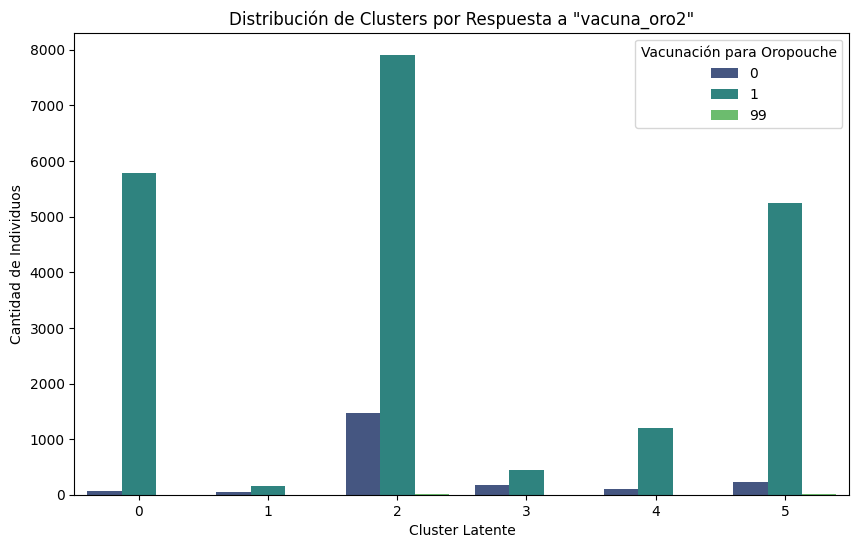

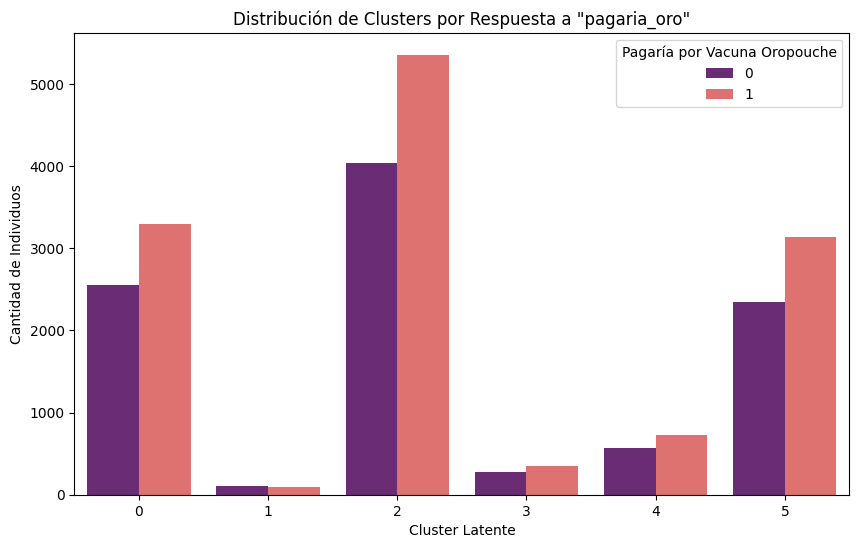

In [ ]:
import seaborn as sns

# Crear una nueva columna para las clases asignadas
df['clase_latente'] = clases_asignadas

# Gráfico de barras apiladas: Relación entre Clusters y 'vacuna_oro2'
plt.figure(figsize=(10, 6))
sns.countplot(x='clase_latente', hue='vacuna_oro2', data=df, palette='viridis')
plt.title('Distribución de Clusters por Respuesta a "vacuna_oro2"')
plt.xlabel('Cluster Latente')
plt.ylabel('Cantidad de Individuos')
plt.legend(title='Vacunación para Oropouche')
plt.show()

# Gráfico de barras apiladas: Relación entre Clusters y 'pagaria_oro'
plt.figure(figsize=(10, 6))
sns.countplot(x='clase_latente', hue='pagaria_oro', data=df, palette='magma')
plt.title('Distribución de Clusters por Respuesta a "pagaria_oro"')
plt.xlabel('Cluster Latente')
plt.ylabel('Cantidad de Individuos')
plt.legend(title='Pagaría por Vacuna Oropouche')
plt.show()


Limpiar 99 en vacunas_oro 2 y pagaria_oro. Y regraficar.

Número óptimo de clases según BIC: 10
Número óptimo de clases según AIC: 10


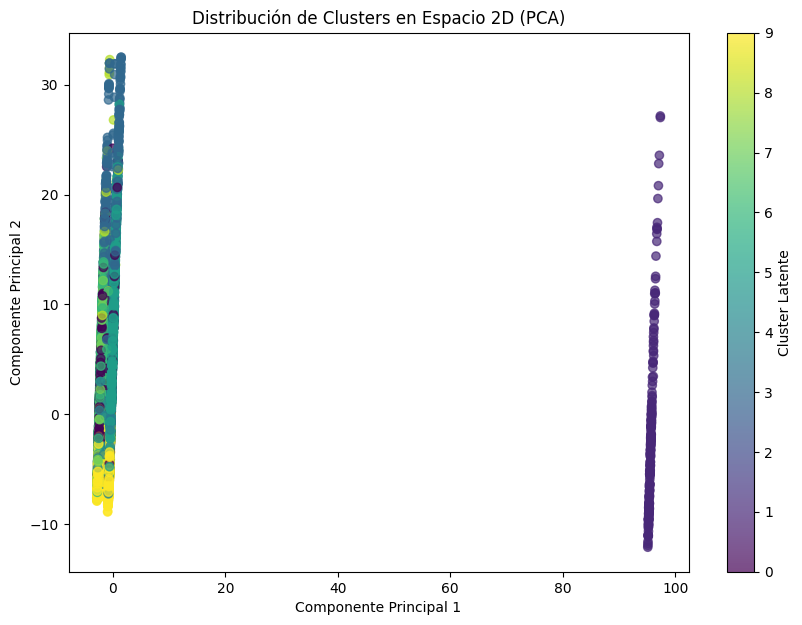

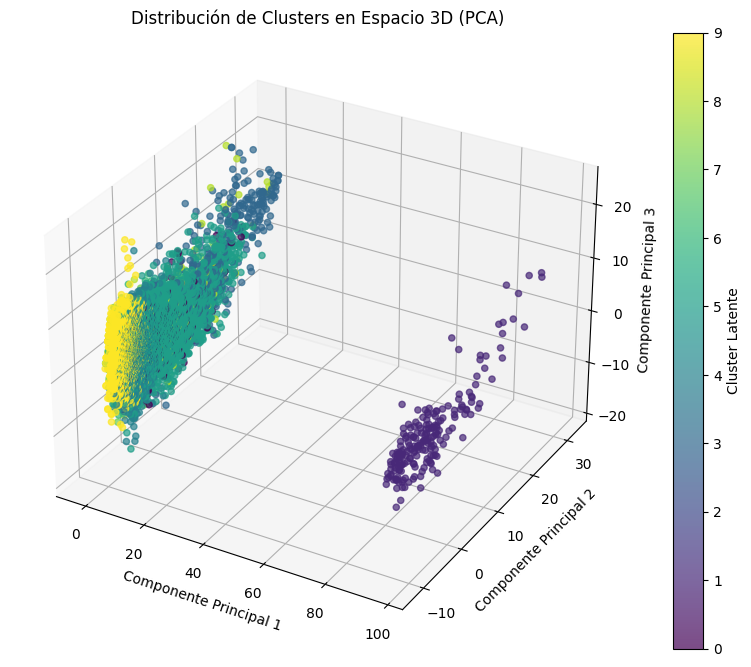

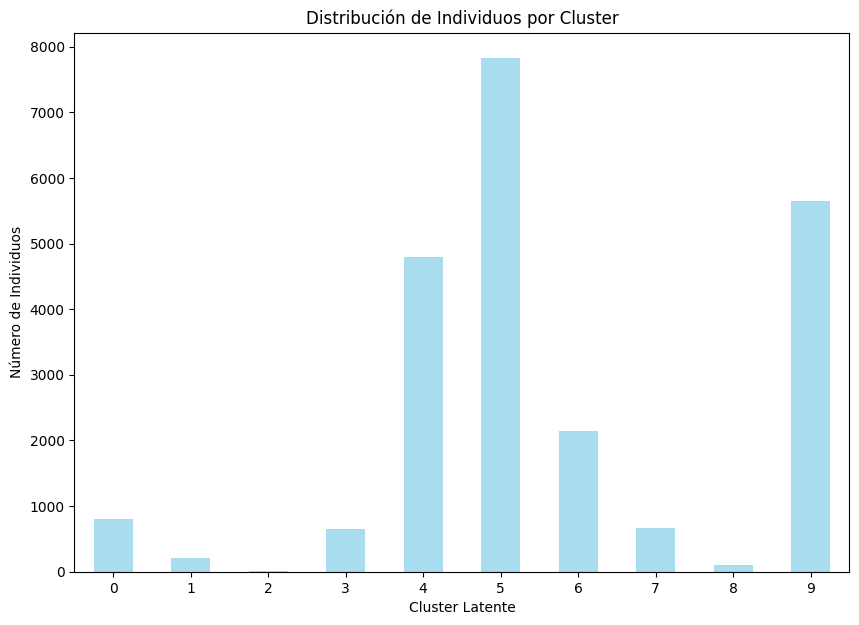

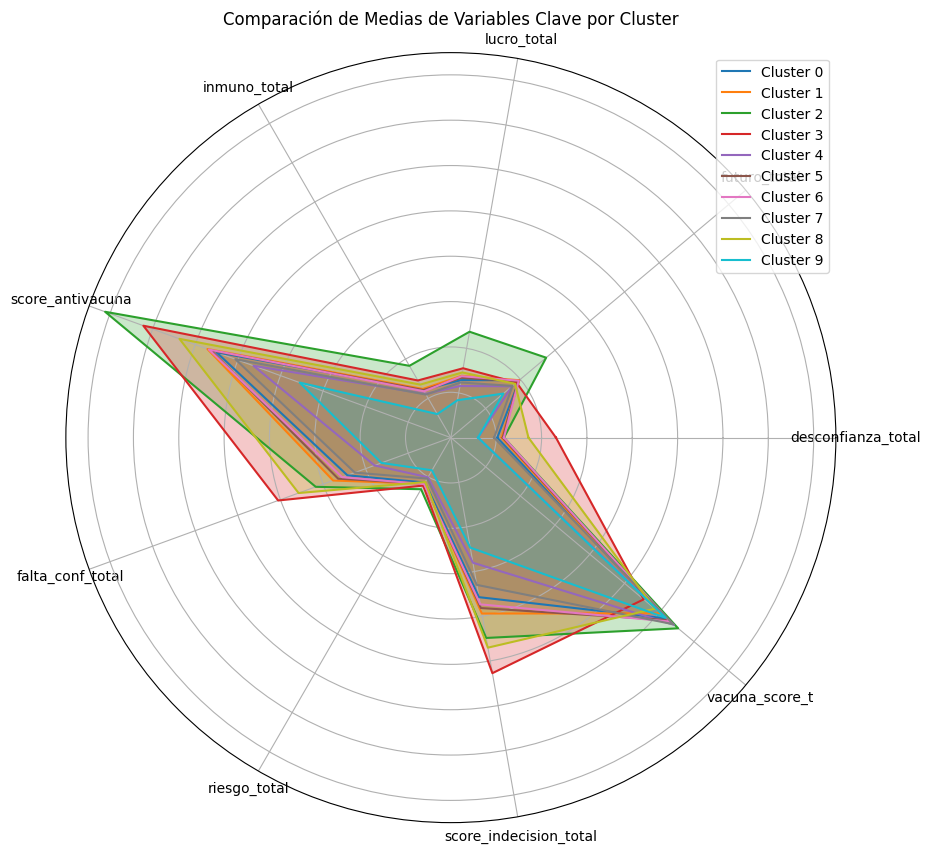

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import numpy as np

# Cargar el archivo CSV
df = pd.read_csv('VACUNAS_SELECCION_a.csv', sep=';')

# Limpiar los datos eliminando valores 99 en 'vacuna_oro2' y 'pagaria_oro'
df = df[df['vacuna_oro2'] != 99]
df = df[df['pagaria_oro'] != 99]

# Definir las columnas a usar en el análisis
columns_to_use = ['edades_agrupadas', 'ocupacion', 'desconfianza_total', 'futuro_total',
                  'lucro_total', 'inmuno_total', 'falta_conf_total', 'riesgo_total',
                  'vacuna_score_t']

# Ajuste de modelos con diferentes números de clases
models = []
bic_values = []
aic_values = []

for k in range(2, 11):
    model = GaussianMixture(n_components=k, random_state=42)
    model.fit(df[columns_to_use])

    models.append(model)
    bic_values.append(model.bic(df[columns_to_use]))
    aic_values.append(model.aic(df[columns_to_use]))

# Seleccionar el número óptimo de clases basado en el BIC y AIC
optimal_classes_bic = np.argmin(bic_values) + 2
optimal_classes_aic = np.argmin(aic_values) + 2

print("Número óptimo de clases según BIC:", optimal_classes_bic)
print("Número óptimo de clases según AIC:", optimal_classes_aic)

# Revisar el modelo óptimo según BIC
optimal_model = models[optimal_classes_bic - 2]

# Ajustar el modelo óptimo y asignar clases
lca_model = GaussianMixture(n_components=optimal_classes_bic, random_state=42)
lca_model.fit(df[columns_to_use])
probabilidades = lca_model.predict_proba(df[columns_to_use])
df['clase_latente'] = np.argmax(probabilidades, axis=1)

# Gráfico de dispersión 2D (PCA)
pca = PCA(n_components=2)
pca_2d = pca.fit_transform(df[columns_to_use])
plt.figure(figsize=(10, 7))
scatter = plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=df['clase_latente'], cmap='viridis', alpha=0.7)
plt.title("Distribución de Clusters en Espacio 2D (PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(label='Cluster Latente')
plt.show()

# Gráfico de dispersión 3D (PCA)
pca = PCA(n_components=3)
pca_3d = pca.fit_transform(df[columns_to_use])
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_3d[:, 0], pca_3d[:, 1], pca_3d[:, 2], c=df['clase_latente'], cmap='viridis', alpha=0.7)
ax.set_title("Distribución de Clusters en Espacio 3D (PCA)")
ax.set_xlabel("Componente Principal 1")
ax.set_ylabel("Componente Principal 2")
ax.set_zlabel("Componente Principal 3")
fig.colorbar(scatter, ax=ax, label='Cluster Latente')
plt.show()

# Gráfico de barras: distribución de individuos por cluster
plt.figure(figsize=(10, 7))
df['clase_latente'].value_counts().sort_index().plot(kind='bar', color='skyblue', alpha=0.7)
plt.title("Distribución de Individuos por Cluster")
plt.xlabel("Cluster Latente")
plt.ylabel("Número de Individuos")
plt.xticks(rotation=0)
plt.show()

# Gráfico de radar: comparación de medias de variables por cluster
from math import pi
import seaborn as sns

clusters_mean = df.groupby('clase_latente')[['desconfianza_total', 'futuro_total', 'lucro_total',
                                             'inmuno_total', 'score_antivacuna', 'falta_conf_total',
                                             'riesgo_total', 'score_indecision_total', 'vacuna_score_t']].mean().reset_index()
num_vars = len(clusters_mean.columns) - 1
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
for i, row in clusters_mean.iterrows():
    values = row.drop('clase_latente').tolist()
    values += values[:1]
    ax.plot(angles, values, label=f'Cluster {int(row["clase_latente"])}')
    ax.fill(angles, values, alpha=0.25)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(clusters_mean.columns[1:])
plt.title("Comparación de Medias de Variables Clave por Cluster")
plt.legend(loc='best')
plt.show()


Descripción del Código
Preparar Datos:

El código que proporcionaste realiza un análisis y modelado para predecir si una persona estaría dispuesta a pagar por una vacuna basada en ciertas características demográficas y de salud. Aquí está una descripción de lo que hace el código y cómo interpretar los resultados:

### Descripción del Código

1. **Carga y Preprocesamiento de Datos**:
   - **Carga de Datos**: Se carga el archivo CSV `VACUNAS_SELECCION_a.csv`.
   - **Reemplazo de Valores**: Los valores 99 en las columnas `vacuna_oro2`, `pagaria_oro`, y `cobertura_salud` se reemplazan por `NaN` (not a number), ya que 99 se utiliza como código para valores no especificados.
   - **Etiquetado de Variables**: Se etiquetan las variables categóricas (`cobertura_salud`, `ocupacion`, `residencia_regiones`) usando diccionarios de mapeo.

2. **Análisis Bivariado**:
   - Se filtran los datos según tres criterios: `cobertura_salud` igual a 'Prepaga', `residencia_regiones` igual a 'GBA+CABA', y `ocupacion` igual a 'Ocupado'.
   - Se generan gráficos de barras que muestran la distribución de la disposición a pagar (`pagaria_oro`) en estos subconjuntos.

3. **Preparación de Datos para Modelado**:
   - **Creación de Variables Dummy**: Se convierten las variables categóricas en variables dummy utilizando `pd.get_dummies()`, y se elimina la primera categoría para evitar la colinealidad.
   - **Eliminación de Valores Nulos**: Se eliminan las filas con valores nulos para las variables utilizadas en el modelo.
   - **División de Datos**: Los datos se dividen en conjuntos de entrenamiento y prueba (70% entrenamiento, 30% prueba).

4. **Entrenamiento y Evaluación del Modelo**:
   - **Modelo de Regresión Logística**: Se entrena un modelo de regresión logística utilizando el conjunto de entrenamiento.
   - **Evaluación del Modelo**: Se evalúa el modelo usando el conjunto de prueba. Se imprimen el reporte de clasificación y la matriz de confusión.

### Interpretación de los Resultados

1. **Gráficos Bivariados**:
   - **Distribución en Cobertura Prepaga**: Muestra la proporción de personas dispuestas y no dispuestas a pagar por la vacuna entre aquellos con cobertura prepaga.
   - **Distribución en GBA+CABA**: Muestra la misma proporción pero para individuos residentes en GBA+CABA.
   - **Distribución para Ocupados**: Muestra la proporción para individuos ocupados.

   Estos gráficos te ayudarán a ver cómo varía la disposición a pagar por la vacuna según estas características. Un gráfico que muestre más barras para la opción 'Sí' indica una mayor disposición a pagar en el grupo correspondiente.

2. **Resultados del Modelo de Regresión Logística**:
   - **Reporte de Clasificación**: Incluye métricas como precisión, recall, f1-score y soporte.
     - **Precisión**: La proporción de verdaderos positivos entre todos los positivos predichos.
     - **Recall**: La proporción de verdaderos positivos entre todos los positivos reales.
     - **F1-Score**: La media armónica entre precisión y recall.
   - **Matriz de Confusión**: Muestra el número de verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.
     - **Verdaderos Positivos (TP)**: Casos correctamente predichos como positivos.
     - **Falsos Positivos (FP)**: Casos incorrectamente predichos como positivos.
     - **Verdaderos Negativos (TN)**: Casos correctamente predichos como negativos.
     - **Falsos Negativos (FN)**: Casos incorrectamente predichos como negativos.

   La interpretación de estas métricas te dará una idea de cómo de bien el modelo está prediciendo la disposición a pagar por la vacuna. Un modelo bien ajustado debería mostrar alta precisión y recall.

### Posibles Problemas

- **Valores Nulos**: Asegúrate de que todos los valores nulos se manejan correctamente y que el conjunto de datos utilizado para el modelado no contiene valores nulos.
- **Tamaño de Muestra**: Verifica que los conjuntos de entrenamiento y prueba contengan suficientes datos para obtener resultados significativos.
- **Manejo de Errores**: Asegúrate de que no haya errores durante el ajuste del modelo y la predicción.

Si ves algún error específico al ejecutar el código, por favor, compártelo para una solución más detallada.

Intento de calcular probabilidad de la clase latente

In [ ]:
import pandas as pd
from sklearn.mixture import GaussianMixture
import numpy as np

# Cargar el archivo CSV
df = pd.read_csv('VACUNAS_SELECCION_a.csv', sep=';')

# Seleccionar las columnas que vas a usar para ajustar el modelo
# Reemplaza 'col1', 'col2', 'col3' con los nombres de las columnas relevantes de tu dataset
columns_to_use = ['col1', 'col2', 'col3']  # Ejemplo de columnas, reemplázalas con las tuyas

# Definir y ajustar el modelo GaussianMixture con 6 componentes (puedes cambiar el número de clases si es necesario)
lca_model = GaussianMixture(n_components=6, random_state=42)
lca_model.fit(df[columns_to_use])

# Predecir las probabilidades de pertenencia a cada clase
probabilidades = lca_model.predict_proba(df[columns_to_use])

# Asignar la clase latente a cada individuo según la mayor probabilidad
df['clase_latente'] = np.argmax(probabilidades, axis=1)

# Imprimir las primeras filas para verificar la nueva columna
print(df[['clase_latente']].head())


<ipython-input-20-0b392c5a4534>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='pagaria_oro', palette='pastel')


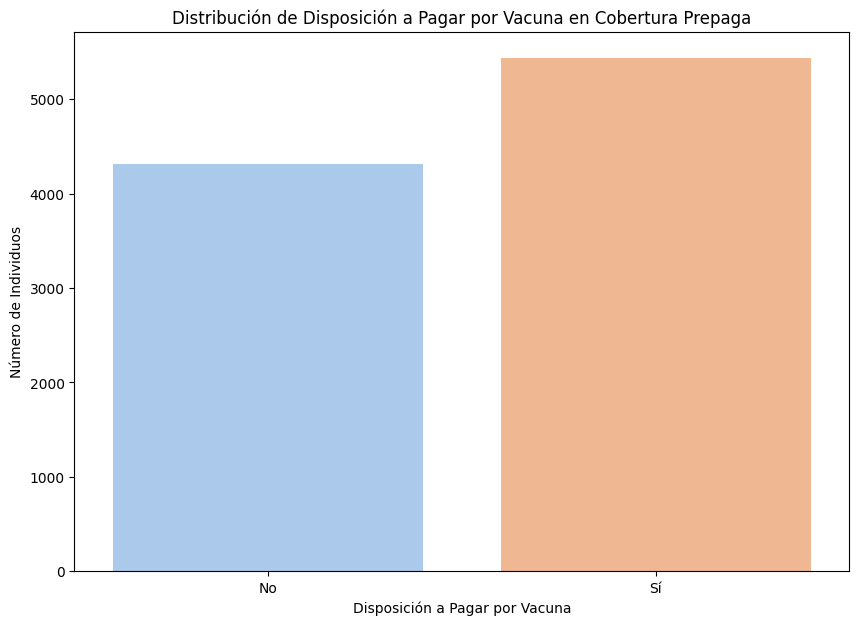

<ipython-input-20-0b392c5a4534>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='pagaria_oro', palette='pastel')


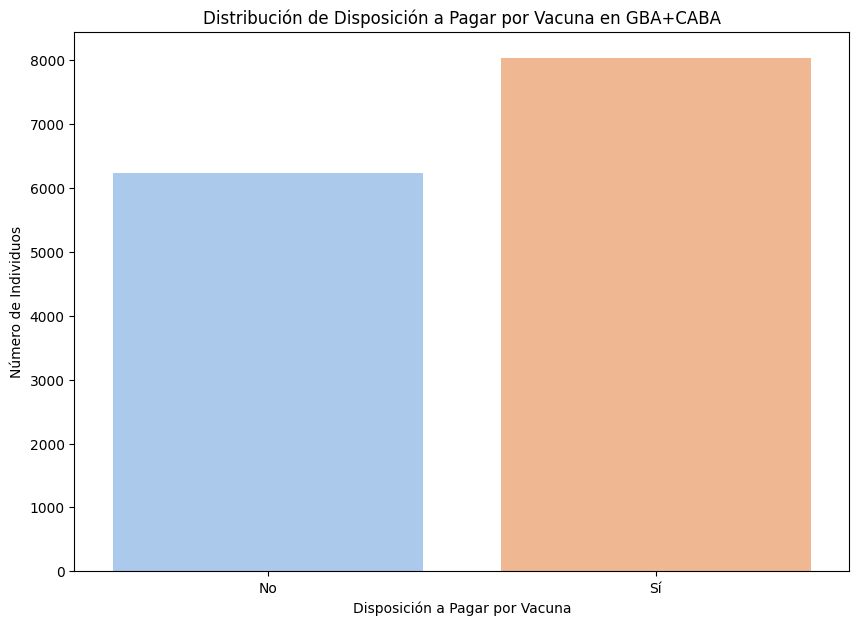

<ipython-input-20-0b392c5a4534>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='pagaria_oro', palette='pastel')


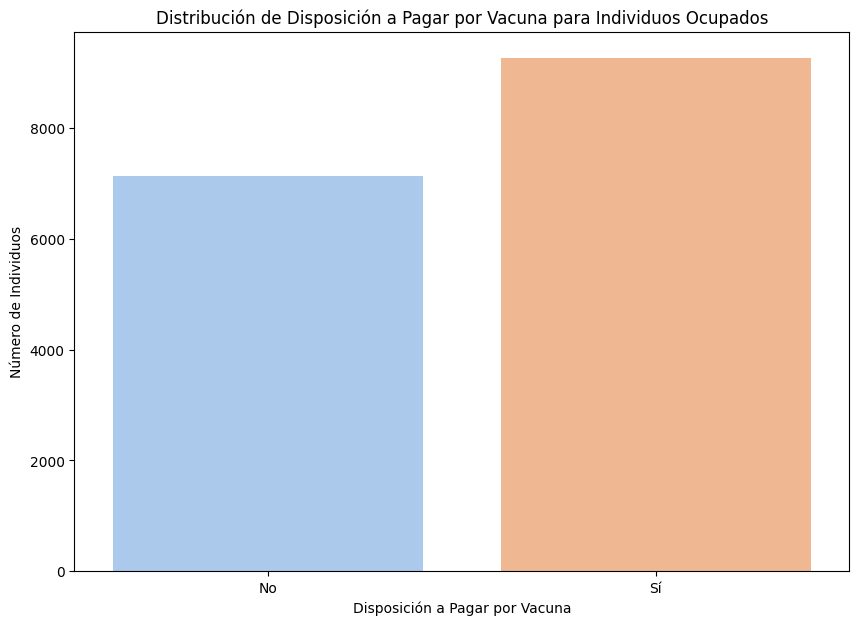

Dimensiones de X_train: (15995, 13)
Dimensiones de y_train: (15995,)
Dimensiones de X_test: (6855, 13)
Dimensiones de y_test: (6855,)
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.35      0.01      0.02      2970
           1       0.57      0.99      0.72      3885

    accuracy                           0.56      6855
   macro avg       0.46      0.50      0.37      6855
weighted avg       0.47      0.56      0.42      6855

Matriz de Confusión:
[[  30 2940]
 [  55 3830]]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Cargar el archivo CSV
df = pd.read_csv('VACUNAS_SELECCION_a.csv', sep=';')

# Reemplazar los valores 99 en las columnas pertinentes
df['vacuna_oro2'] = df['vacuna_oro2'].replace(99, np.nan)
df['pagaria_oro'] = df['pagaria_oro'].replace(99, np.nan)
df['cobertura_salud'] = df['cobertura_salud'].replace(99, np.nan)

# Etiquetar variables
cobertura_labels = {1: 'Prepaga', 2: 'O.Social', 3: 'PAMI', 4: 'Sist. P', 0: 'n/s'}
ocupacion_labels = {1: 'Desocupado', 2: 'Inactivo', 3: 'Ocupado', 99: 'n/s'}
residencia_labels = {1: 'GBA+CABA', 2: 'NOA', 3: 'NEA', 4: 'Cuyo', 5: 'Pampa', 6: 'Patagonia', 9: 'n/v'}

df['cobertura_salud'] = df['cobertura_salud'].map(cobertura_labels)
df['ocupacion'] = df['ocupacion'].map(ocupacion_labels)
df['residencia_regiones'] = df['residencia_regiones'].map(residencia_labels)

# Filtrar datos
df_prepaga = df[df['cobertura_salud'] == 'Prepaga']
df_gba_caba = df[df['residencia_regiones'] == 'GBA+CABA']
df_ocupado = df[df['ocupacion'] == 'Ocupado']

# Análisis bivariado: Disposición a pagar por vacuna
def plot_disposicion_a_pagar(data, title):
    plt.figure(figsize=(10, 7))
    sns.countplot(data=data, x='pagaria_oro', palette='pastel')
    plt.title(title)
    plt.xlabel('Disposición a Pagar por Vacuna')
    plt.ylabel('Número de Individuos')
    plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])
    plt.show()

plot_disposicion_a_pagar(df_prepaga, 'Distribución de Disposición a Pagar por Vacuna en Cobertura Prepaga')
plot_disposicion_a_pagar(df_gba_caba, 'Distribución de Disposición a Pagar por Vacuna en GBA+CABA')
plot_disposicion_a_pagar(df_ocupado, 'Distribución de Disposición a Pagar por Vacuna para Individuos Ocupados')

# Variables independientes y dependientes
X = df[['cobertura_salud', 'residencia_regiones', 'ocupacion']]
X = pd.get_dummies(X, drop_first=True)  # Convertir variables categóricas a variables dummy
y = df['pagaria_oro']

# Eliminar valores nulos
df_model = pd.concat([X, y], axis=1).dropna()
X = df_model.drop(columns=['pagaria_oro'])
y = df_model['pagaria_oro']

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verificar si los conjuntos de entrenamiento y prueba tienen datos
print(f"Dimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de y_train: {y_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")
print(f"Dimensiones de y_test: {y_test.shape}")

# Entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=1000)

try:
    model.fit(X_train, y_train)
    # Predecir y evaluar el modelo
    y_pred = model.predict(X_test)
    print("Reporte de Clasificación:")
    print(classification_report(y_test, y_pred))
    print("Matriz de Confusión:")
    print(confusion_matrix(y_test, y_pred))
except ValueError as e:
    print(f"Error al ajustar el modelo: {e}")


Prediccion de Intención de Compra:

In [ ]:
# Importar las librerías necesarias
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf


# Cargar los datos (suponiendo que ya tienes el dataset 'VACUNAS_SELECCION' cargado)
# Cargar el archivo CSV
df = pd.read_csv('VACUNAS_SELECCION_a.csv', sep=';')

# Limpiar los datos eliminando valores 99 en 'vacuna_oro2' y 'pagaria_oro'
df = df[df['vacuna_oro2'] != 99]
df = df[df['pagaria_oro'] != 99]

# Definir las columnas a usar en el análisis
columns_to_use = ['edades_agrupadas', 'ocupacion', 'desconfianza_total', 'futuro_total',
                  'lucro_total', 'inmuno_total', 'falta_conf_total', 'riesgo_total',
                  'vacuna_score_t']

# Ajuste de modelos con diferentes números de clases
models = []
bic_values = []
aic_values = []

for k in range(2, 11):
    model = GaussianMixture(n_components=k, random_state=42)
    model.fit(df[columns_to_use])

    models.append(model)
    bic_values.append(model.bic(df[columns_to_use]))
    aic_values.append(model.aic(df[columns_to_use]))

# Seleccionar el número óptimo de clases basado en el BIC y AIC
optimal_classes_bic = np.argmin(bic_values) + 2
optimal_classes_aic = np.argmin(aic_values) + 2

# Revisar el modelo óptimo según BIC
optimal_model = models[optimal_classes_bic - 2]

# Ajustar el modelo óptimo y asignar clases
lca_model = GaussianMixture(n_components=optimal_classes_bic, random_state=42)
lca_model.fit(df[columns_to_use])
probabilidades = lca_model.predict_proba(df[columns_to_use])
df['clase_latente'] = np.argmax(probabilidades, axis=1)

# Definir el modelo de regresión logística multinomial
modelo = smf.logit(formula='pagaria_oro ~ clase_latente', data=df).fit()

# Imprimir los resultados del modelo
print(modelo.summary())

# Obtener los coeficientes, error estándar, y p-valores
coeficientes = modelo.params
errores_std = modelo.bse
p_valores = modelo.pvalues

log_likelihood = modelo.llf  # Log-Likelihood
aic = modelo.aic  # AIC

# Mostrar los resultados
print(f'Coefficients:\n{coeficientes}')
print(f'Standard Errors:\n{errores_std}')
print(f'p-values:\n{p_valores}')
print("Log-Likelihood:", log_likelihood)
print("AIC:", aic)

Optimization terminated successfully.
         Current function value: 0.684000
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:            pagaria_oro   No. Observations:                22822
Model:                          Logit   Df Residuals:                    22820
Method:                           MLE   Df Model:                            1
Date:                Mon, 16 Sep 2024   Pseudo R-squ.:               7.792e-07
Time:                        13:32:44   Log-Likelihood:                -15610.
converged:                       True   LL-Null:                       -15610.
Covariance Type:            nonrobust   LLR p-value:                    0.8761
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.2665      0.036      7.371      0.000       0.196       0.337
clase_latente     0.

Explicación:
Coeficientes y errores estándar: Creamos una serie con los coeficientes e intervalos de confianza calculados a partir del error estándar.
Intervalos de confianza (95%): Calculamos los intervalos utilizando la fórmula coef ± 1.96 * std_err para un nivel de confianza del 95%.
Gráfico: Usamos seaborn.pointplot para graficar los coeficientes con barras de error que representan los intervalos de confianza.
Línea de referencia: Agregamos una línea en y=0 para ver si los coeficientes incluyen el cero (lo que indica falta de significancia estadística).

<ipython-input-14-5af853b83a2d>:23: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(x=results.index, y=results['coef'], join=False, capsize=0.1, color="b",
<ipython-input-14-5af853b83a2d>:23: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 2}` instead.

  sns.pointplot(x=results.index, y=results['coef'], join=False, capsize=0.1, color="b",


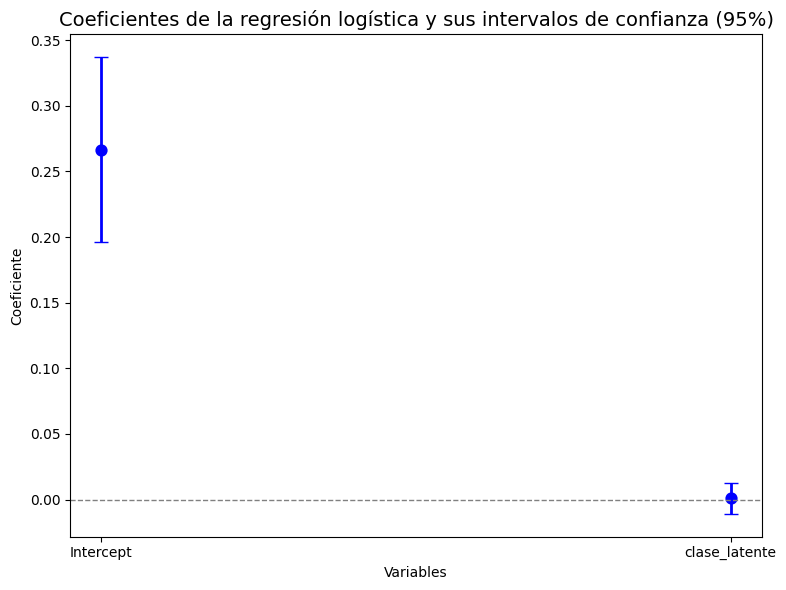

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Coeficientes y errores estándar del modelo
coef = pd.Series([0.2665, 0.0009], index=['Intercept', 'clase_latente'])
std_err = pd.Series([0.036, 0.006], index=['Intercept', 'clase_latente'])

# Calcular los intervalos de confianza (95%)
conf_lower = coef - 1.96 * std_err
conf_upper = coef + 1.96 * std_err

# Crear un DataFrame para almacenar los resultados
results = pd.DataFrame({
    'coef': coef,
    'conf_lower': conf_lower,
    'conf_upper': conf_upper
})

# Graficar los coeficientes y sus intervalos de confianza
plt.figure(figsize=(8, 6))
sns.pointplot(x=results.index, y=results['coef'], join=False, capsize=0.1, color="b",
              errwidth=2, markers="o", linestyles="")
plt.errorbar(results.index, results['coef'],
             yerr=[results['coef'] - results['conf_lower'], results['conf_upper'] - results['coef']],
             fmt='none', color='b', capsize=5, lw=2)

# Títulos y etiquetas
plt.title("Coeficientes de la regresión logística y sus intervalos de confianza (95%)", fontsize=14)
plt.ylabel('Coeficiente')
plt.xlabel('Variables')
plt.axhline(0, color='grey', lw=1, linestyle='--')  # Línea horizontal en 0 para referencia

# Mostrar el gráfico
plt.tight_layout()
plt.show()


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 22.26it/s, max_LL=3.09e+7, max_avg_LL=1.35e+3]
<ipython-input-6-fd56fe500b36>:35: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(df['score_antivacuna'], df['score_indecision'], df['vacuna_oro2'],


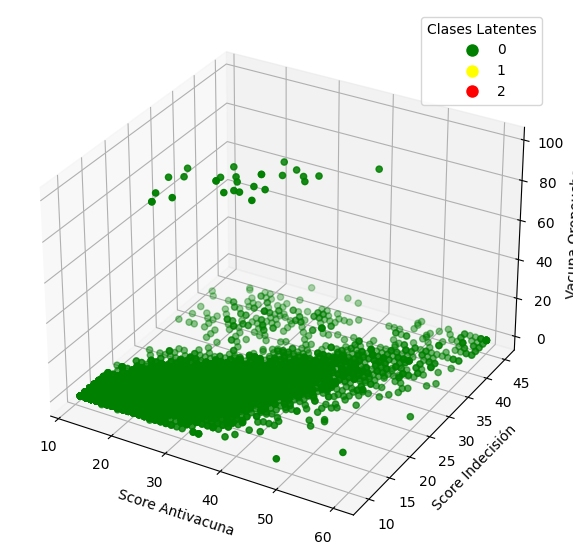

In [ ]:
import numpy as np
!pip install stepmix

import matplotlib.pyplot as plt
from stepmix.stepmix import StepMix

df = pd.read_csv('VACUNAS_SELECCION_a.csv', sep=';')

# Calcular el score de indecisión sumando falta_conf_total y riesgo_total
df['score_indecision'] = df['falta_conf_total'] + df['riesgo_total']

# Lista de variables a graficar, incluyendo el score_indecision
variables = ['falta_conf_total', 'riesgo_total', 'score_indecision']


# Preparar los datos
variables_cluster = df[['score_antivacuna', 'score_indecision', 'vacuna_oro2']].to_numpy()

# Inicializamos el modelo LCA
lca = StepMix(n_components=3, n_steps=1, measurement="bernoulli", random_state=42)

# Ajustar el modelo a los datos
lca.fit(variables_cluster)

# Predecir la pertenencia de clases latentes
df['cluster_lca'] = lca.predict(variables_cluster)

# Definir un mapa de colores para cada cluster
cluster_colors = {0: 'green', 1: 'yellow', 2: 'red'}
df['cluster_color'] = df['cluster_lca'].map(cluster_colors)

# Gráfico de dispersión 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['score_antivacuna'], df['score_indecision'], df['vacuna_oro2'],
                     c=df['cluster_color'], cmap='viridis')

ax.set_xlabel('Score Antivacuna')
ax.set_ylabel('Score Indecisión')
ax.set_zlabel('Vacuna Oropouche')

# Agregar leyenda
legend_labels = ['Provacunas', 'Indecisos', 'Antivacunas']
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                          markerfacecolor=color, markersize=10) for label, color in cluster_colors.items()]
legend = ax.legend(handles=legend_elements, title="Clases Latentes")
plt.show()


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:00<00:00, 24.71it/s, max_LL=3.09e+7, max_avg_LL=1.35e+3]


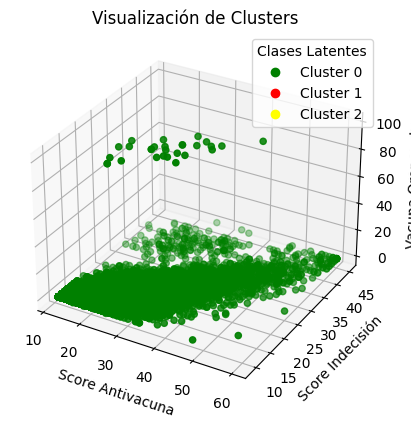

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Inicializamos el modelo LCA
lca = StepMix(n_components=3, n_steps=1, measurement="bernoulli", random_state=42)

# Ajustar el modelo a los datos
lca.fit(variables_cluster)

# Predecir la pertenencia de clases latentes
df['cluster_lca'] = lca.predict(variables_cluster)

# Supongamos que 'df' es tu DataFrame y que contiene las etiquetas de clusters en 'cluster_lca'
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Asignando colores a cada cluster específicamente
colores = {0: 'green', 1: 'red', 2: 'yellow'}

# Mapeando cada punto a su color correspondiente basado en el label del cluster
colors = df['cluster_lca'].map(colores)

# Graficar los puntos
scatter = ax.scatter(df['score_antivacuna'], df['score_indecision'], df['vacuna_oro2'], c=colors)

# Añadir etiquetas y título
ax.set_xlabel('Score Antivacuna')
ax.set_ylabel('Score Indecisión')
ax.set_zlabel('Vacuna Oropouche')
ax.set_title('Visualización de Clusters')

# Añadir una leyenda correctamente
legend_labels = colores  # Usa directamente el diccionario 'colores' que ya está correctamente definido
handles = [plt.Line2D([0], [0], marker='o', color=color, label=f"Cluster {label}", linestyle='') for label, color in legend_labels.items()]
ax.legend(handles=handles, title="Clases Latentes")

plt.show()


Score Antivacuna en relación a los diferentes niveles educativos y la conformación de grupos de edad (escala a partir de los 18 años a 30, 31 a 40, de 41 a 50 y de 51 a 60, otro final +60 años de edad)

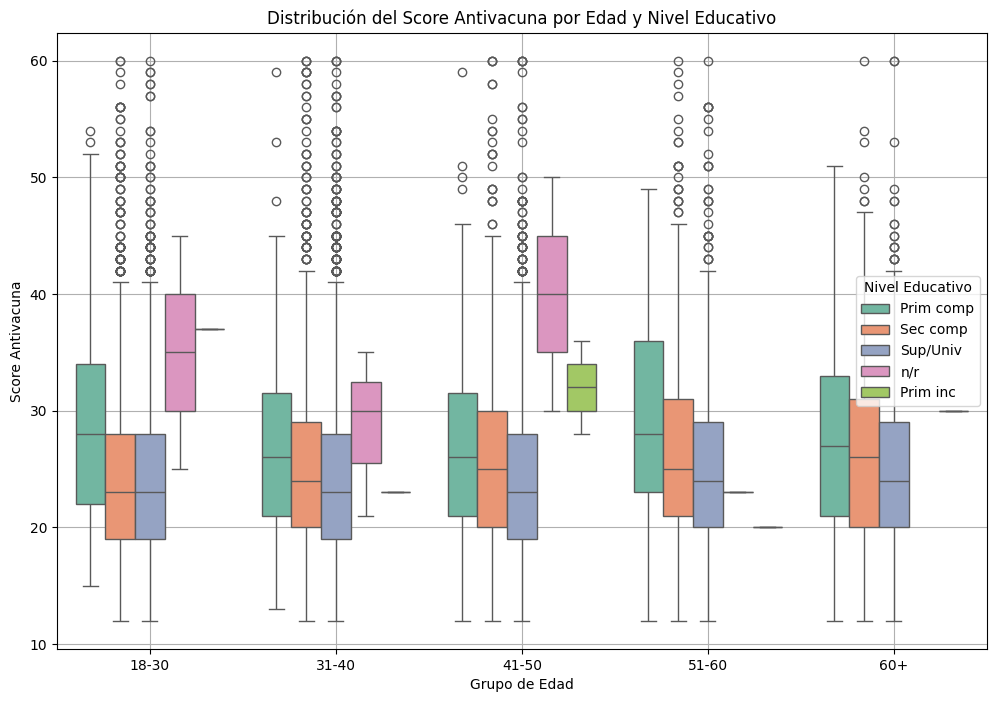

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el archivo CSV
df = pd.read_csv('VACUNAS_SELECCION_a.csv', sep=';')

# Calcular el score antivacunas sumando las variables correspondientes
df['score_antivacuna'] = df['desconfianza_total'] + df['futuro_total'] + df['lucro_total'] + df['inmuno_total']

# Crear categorías de edad para una mejor visualización
df['edad_grupo'] = pd.cut(df['edad_continua'], bins=[18, 30, 40, 50, 60, 100], labels=['18-30', '31-40', '41-50', '51-60', '60+'])

# Mapear valores numéricos a etiquetas para 'niv_edu_3'
nivel_educativo_labels = {
    1: 'Prim inc',   # Primaria incompleta
    2: 'Prim comp',  # Primaria completa
    3: 'Sec comp',   # Secundaria completa
    4: 'Sup/Univ',   # Superior/Universitaria
    99: 'n/r'        # No responde
}
df['niv_edu_3'] = df['niv_edu_3'].map(nivel_educativo_labels)

# Crear un boxplot para visualizar el score antivacuna por grupo de edad y nivel educativo
plt.figure(figsize=(12, 8))
sns.boxplot(x='edad_grupo', y='score_antivacuna', hue='niv_edu_3', data=df, palette='Set2')
plt.title('Distribución del Score Antivacuna por Edad y Nivel Educativo')
plt.xlabel('Grupo de Edad')
plt.ylabel('Score Antivacuna')
plt.legend(title='Nivel Educativo')
plt.grid(True)
plt.show()


Modelo de Clase Latente, utilizando stepmix, para el score antivacuna, cuyos grupos a diferenciar son provacunas, indecisos y antivacunas.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 2.8 MB/s eta 0:00:00
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:08<00:00,  8.32s/it, max_LL=-1.16e+5, max_avg_LL=-5.06]


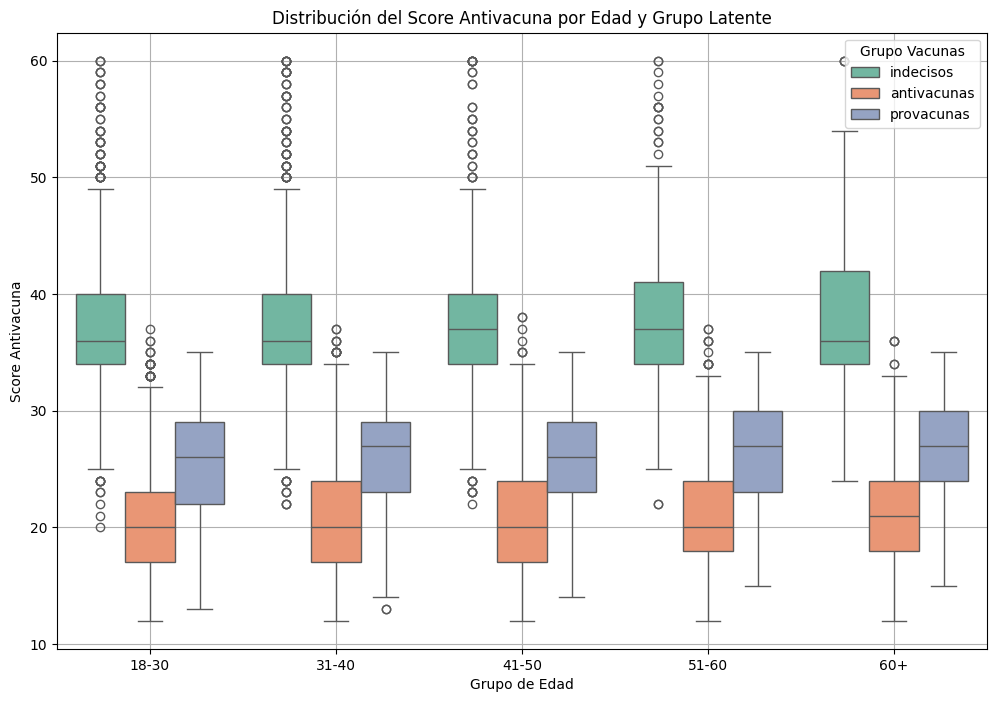

In [ ]:
!pip install stepmix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from stepmix.stepmix import StepMix

# Cargar el archivo CSV
df = pd.read_csv('VACUNAS_SELECCION_a.csv', sep=';')

# Calcular el score antivacunas sumando las variables correspondientes
df['score_antivacuna'] = df['desconfianza_total'] + df['futuro_total'] + df['lucro_total'] + df['inmuno_total']

# Crear categorías de edad para una mejor visualización
df['edad_grupo'] = pd.cut(df['edad_continua'], bins=[18, 30, 40, 50, 60, 100], labels=['18-30', '31-40', '41-50', '51-60', '60+'])

# Mapear valores numéricos a etiquetas para 'niv_edu_3'
nivel_educativo_labels = {
    1: 'Prim inc',   # Primaria incompleta
    2: 'Prim comp',  # Primaria completa
    3: 'Sec comp',   # Secundaria completa
    4: 'Sup/Univ',   # Superior/Universitaria
    99: 'n/r'        # No responde
}
df['niv_edu_3'] = df['niv_edu_3'].map(nivel_educativo_labels)

# Seleccionar las variables relevantes para el modelo (usamos las subescalas que componen el score)
X = df[['desconfianza_total', 'futuro_total', 'lucro_total', 'inmuno_total']].dropna()

# Crear un modelo de clase latente con 3 clases (provacunas, indecisos, antivacunas)
lcm = StepMix(n_components=3, measurement='continuous', random_state=42)
lcm.fit(X)

# Predecir las clases latentes para cada individuo
df['grupo_latente'] = lcm.predict(X)

# Mapear los clusters a categorías: 0, 1 y 2 corresponden a provacunas, indecisos y antivacunas
grupo_labels = {0: 'provacunas', 1: 'indecisos', 2: 'antivacunas'}
df['grupo_vacunas'] = df['grupo_latente'].map(grupo_labels)

# Visualizar el score antivacuna por grupo de edad y nivel educativo, coloreado por grupo latente
plt.figure(figsize=(12, 8))
sns.boxplot(x='edad_grupo', y='score_antivacuna', hue='grupo_vacunas', data=df, palette='Set2')
plt.title('Distribución del Score Antivacuna por Edad y Grupo Latente')
plt.xlabel('Grupo de Edad')
plt.ylabel('Score Antivacuna')
plt.legend(title='Grupo Vacunas')
plt.grid(True)
plt.show()


Calculo sobre el total de la muestra con análisis latente, en función de edad y nivel educativo.

Número total de observaciones: 22850
Tamaño de X (datos para el modelo): 22850
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:16<00:00, 16.35s/it, max_LL=-1.16e+5, max_avg_LL=-5.06]


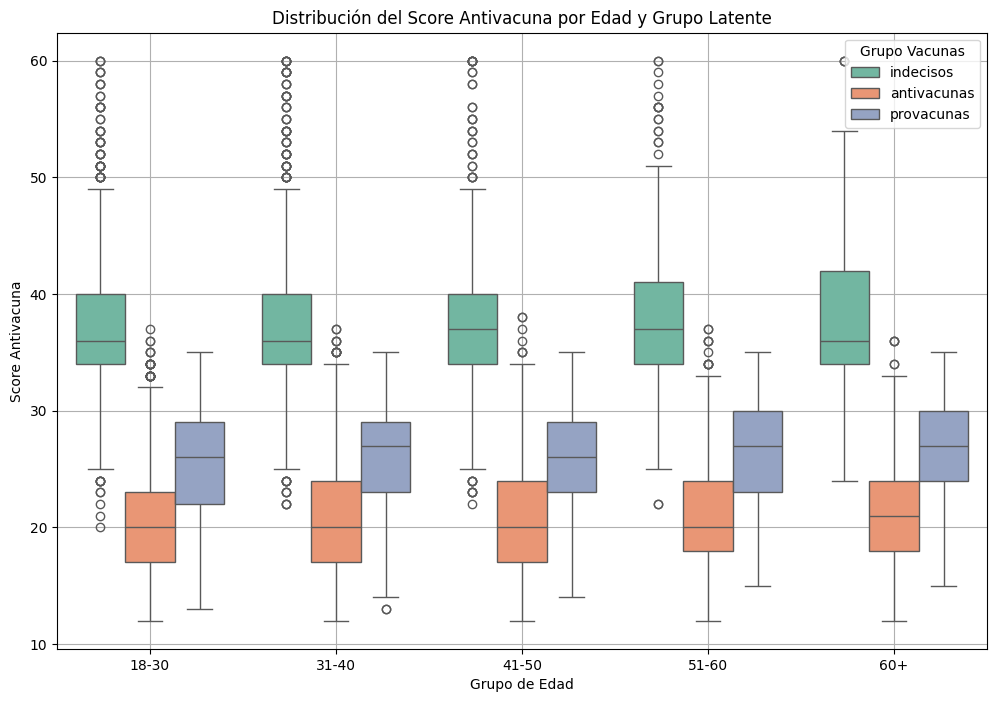

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from stepmix.stepmix import StepMix

# Cargar el archivo CSV
df = pd.read_csv('VACUNAS_SELECCION_a.csv', sep=';')

# Verificar el tamaño total de la muestra
print(f"Número total de observaciones: {len(df)}")

# Mapear valores 99 a NaN y convertir a categorías
df['vacuna_oro2'] = df['vacuna_oro2'].replace({99: pd.NA}).astype('category')
df['pagaria_oro'] = df['pagaria_oro'].replace({99: pd.NA}).astype('category')

# Calcular el score antivacunas sumando las variables correspondientes
df['score_antivacuna'] = df[['desconfianza_total', 'futuro_total', 'lucro_total', 'inmuno_total']].sum(axis=1)

# Crear categorías de edad para una mejor visualización
df['edad_grupo'] = pd.cut(df['edad_continua'], bins=[18, 30, 40, 50, 60, 100], labels=['18-30', '31-40', '41-50', '51-60', '60+'])

# Mapear valores numéricos a etiquetas para 'niv_edu_3'
nivel_educativo_labels = {
    1: 'Prim inc',   # Primaria incompleta
    2: 'Prim comp',  # Primaria completa
    3: 'Sec comp',   # Secundaria completa
    4: 'Sup/Univ',   # Superior/Universitaria
    99: 'n/r'        # No responde
}
df['niv_edu_3'] = df['niv_edu_3'].map(nivel_educativo_labels)

# Seleccionar las variables relevantes para el modelo
X = df[['desconfianza_total', 'futuro_total', 'lucro_total', 'inmuno_total']].dropna()

# Verificar el tamaño de X para asegurar que no se pierden muchas observaciones
print(f"Tamaño de X (datos para el modelo): {X.shape[0]}")

# Crear un modelo de clase latente con 3 clases (provacunas, indecisos, antivacunas)
lcm = StepMix(n_components=3, measurement='continuous', random_state=42)
lcm.fit(X)

# Predecir las clases latentes para cada individuo
df['grupo_latente'] = lcm.predict(X)

 # Mapear los clusters a categorías
grupo_labels = {0: 'provacunas', 1: 'indecisos', 2: 'antivacunas'}
df['grupo_vacunas'] = df['grupo_latente'].map(grupo_labels)

# Visualizar el score antivacuna por grupo de edad y nivel educativo, coloreado por grupo latente
plt.figure(figsize=(12, 8))
sns.boxplot(x='edad_grupo', y='score_antivacuna', hue='grupo_vacunas', data=df, palette='Set2')
plt.title('Distribución del Score Antivacuna por Edad y Grupo Latente')
plt.xlabel('Grupo de Edad')
plt.ylabel('Score Antivacuna')
plt.legend(title='Grupo Vacunas')
plt.grid(True)
plt.show()


Calculo Modelo Predictivo utilizando la variable vacuna_oro2 (¿Te vacunarias para oropouche? Si-NO), utilizando como variable predictora el Score Antivacunas.

In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Cargar el archivo CSV
df = pd.read_csv('VACUNAS_SELECCION_a.csv', sep=';')

# Calcular el score antivacunas sumando las variables correspondientes
df['score_antivacuna'] = df['desconfianza_total'] + df['futuro_total'] + df['lucro_total'] + df['inmuno_total']

# Eliminar filas con valores nulos en las columnas seleccionadas (vacuna_oro2 y score_antivacuna)
# Además, eliminar las filas donde vacuna_oro2 tiene el valor 99
df_clean = df.dropna(subset=['vacuna_oro2', 'score_antivacuna'])
df_clean = df_clean[df_clean['vacuna_oro2'] != 99]  # Excluir las respuestas 'no responde'

# Asegurarse de que 'vacuna_oro2' sea categórica o binaria
df_clean['vacuna_oro2'] = df_clean['vacuna_oro2'].map({1: 1, 0: 0})

# Verificar si hay valores nulos en vacuna_oro2 después del mapeo y la exclusión
print(f"Valores nulos en vacuna_oro2 antes del split: {df_clean['vacuna_oro2'].isnull().sum()}")  # Debería ser 0

# Definir las variables predictora y objetivo
X = df_clean[['score_antivacuna']]  # Variable predictora
y = df_clean['vacuna_oro2']         # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verificar si hay valores nulos en y_train y X_train
print(f"Valores nulos en y_train: {y_train.isnull().sum()}")  # Debería ser 0
print(f"Valores nulos en X_train: {X_train.isnull().sum().sum()}")  # Debería ser 0

# Si aún quedan valores nulos en y_train o X_train, eliminarlos
y_train_clean = y_train.dropna()
X_train_clean = X_train.loc[y_train_clean.index]  # Mantener solo los índices válidos en X_train

# Verificar los tipos de datos para asegurarse de que sean numéricos
print(X_train_clean.dtypes)
print(y_train_clean.dtypes)

# Convertir los datos a tipo numérico por si hay algún tipo incorrecto
X_train_clean = X_train_clean.apply(pd.to_numeric)
y_train_clean = pd.to_numeric(y_train_clean)

# Crear el modelo de regresión logística
model = LogisticRegression()

# Entrenar el modelo con el conjunto de entrenamiento
model.fit(X_train_clean, y_train_clean)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
print('Precisión:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Valores nulos en vacuna_oro2 antes del split: 0
Valores nulos en y_train: 0
Valores nulos en X_train: 0
score_antivacuna    int64
dtype: object
int64
Precisión: 0.9300423543157588
              precision    recall  f1-score   support

           0       0.73      0.32      0.44       598
           1       0.94      0.99      0.96      6249

    accuracy                           0.93      6847
   macro avg       0.83      0.65      0.70      6847
weighted avg       0.92      0.93      0.92      6847



Grafico con Curva Precision-Recall

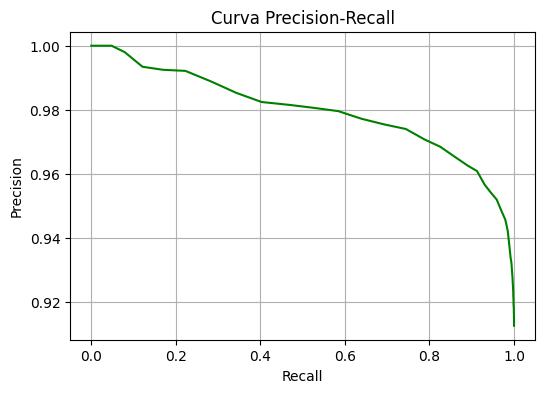

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Obtener las probabilidades predichas para la clase 1 (Sí se vacunaría)
y_prob = model.predict_proba(X_test)[:, 1]

# Calcular la curva precision-recall
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Graficar la curva Precision-Recall
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='green', label='Precision-Recall curve')
plt.title('Curva Precision-Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()



Análisis Latente con las variables ¿Te vacunarias para oropouche? = vacuna_oro2 y ¿pagarias por vacunarte? = pagaria_oro.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 618.2 kB/s eta 0:00:00
  vacuna_oro2 pagaria_oro
0           1           1
1           1           0
2           1           0
3           1           0
4           1           0
Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:07<00:00,  7.84s/it, max_LL=-1.16e+5, max_avg_LL=-5.06]


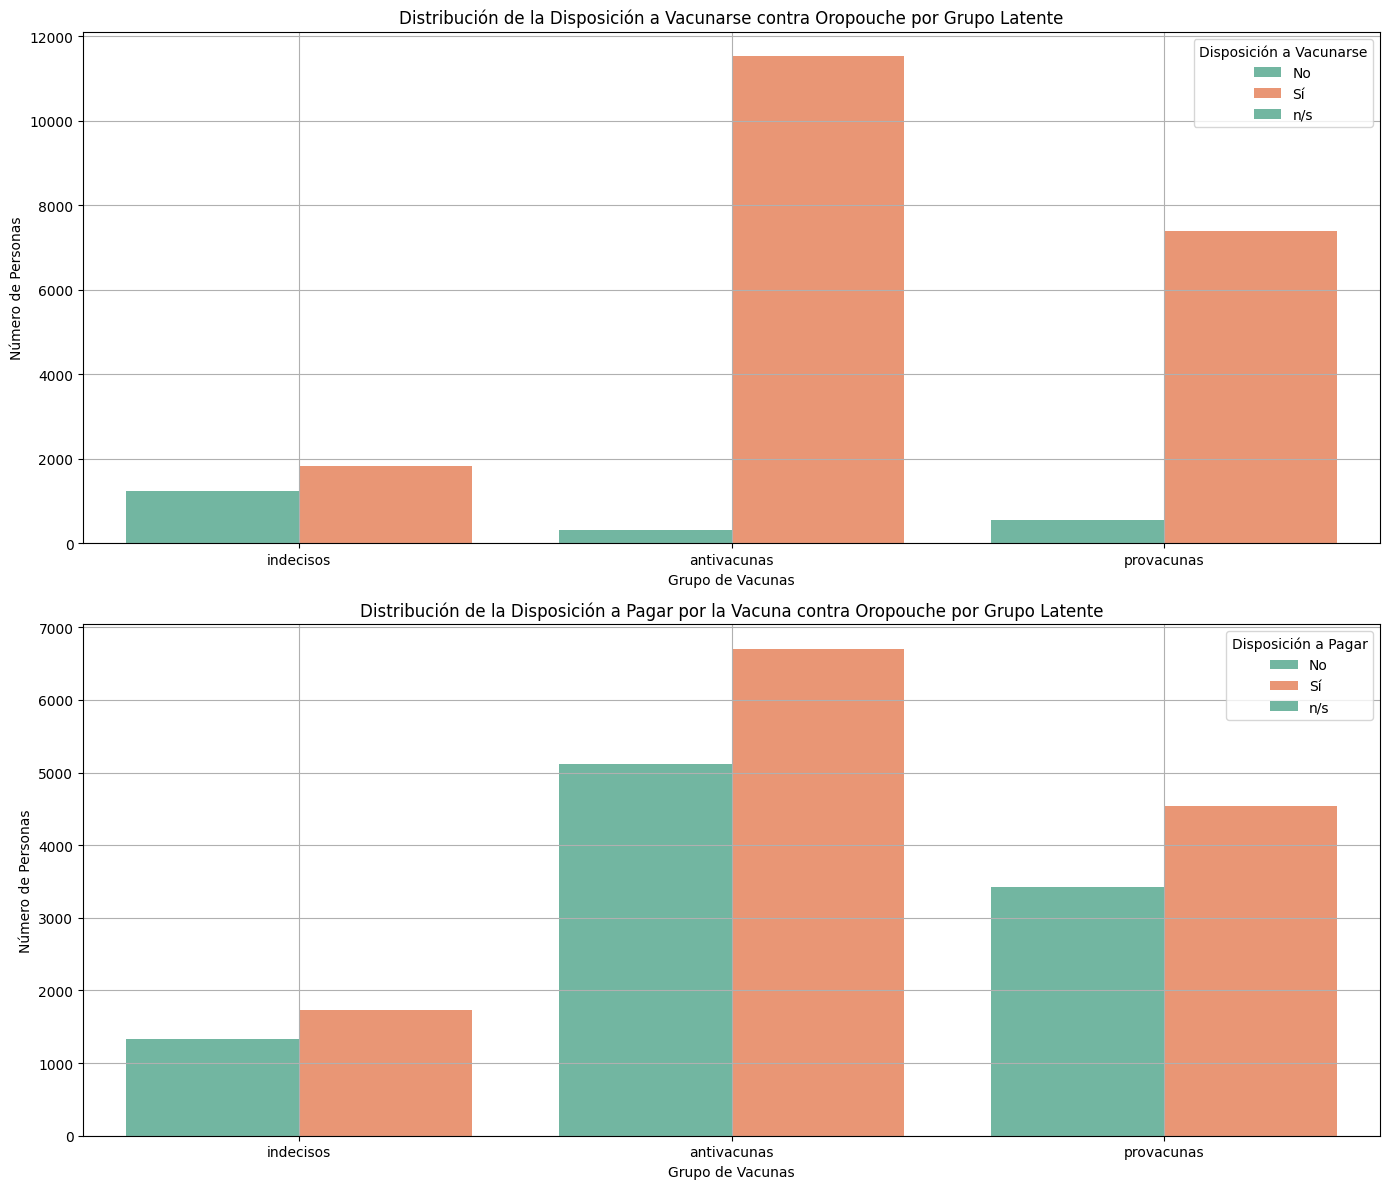

In [ ]:
import pandas as pd
!pip install stepmix
from stepmix.stepmix import StepMix
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el archivo CSV
df = pd.read_csv('VACUNAS_SELECCION_a.csv', sep=';')

# Mapear las variables a valores numéricos 1 (Sí) y 0 (No), y tratar '99' como NaN para análisis
df['vacuna_oro2'] = df['vacuna_oro2'].replace({99: pd.NA})
df['pagaria_oro'] = df['pagaria_oro'].replace({99: pd.NA})

# Convertir las variables a tipo categórico
df['vacuna_oro2'] = df['vacuna_oro2'].astype('category')
df['pagaria_oro'] = df['pagaria_oro'].astype('category')

# Revisar los datos
print(df[['vacuna_oro2', 'pagaria_oro']].head())

# Calcular el score antivacunas
df['score_antivacuna'] = df[['desconfianza_total', 'futuro_total', 'lucro_total', 'inmuno_total']].sum(axis=1)

# Crear categorías de edad para una mejor visualización
df['edad_grupo'] = pd.cut(df['edad_continua'], bins=[18, 30, 40, 50, 60, 100], labels=['18-30', '31-40', '41-50', '51-60', '60+'])

# Mapear valores numéricos a etiquetas para 'niv_edu_3'
nivel_educativo_labels = {
    1: 'Prim inc',   # Primaria incompleta
    2: 'Prim comp',  # Primaria completa
    3: 'Sec comp',   # Secundaria completa
    4: 'Sup/Univ',   # Superior/Universitaria
    99: 'n/r'        # No responde
}
df['niv_edu_3'] = df['niv_edu_3'].map(nivel_educativo_labels)

# Seleccionar las variables relevantes para el modelo
X = df[['desconfianza_total', 'futuro_total', 'lucro_total', 'inmuno_total']].dropna()

# Crear el modelo de clase latente con 3 clases (provacunas, indecisos, antivacunas)
lcm = StepMix(n_components=3, measurement='continuous', random_state=42)
lcm.fit(X)

# Predecir las clases latentes para cada individuo
df['grupo_latente'] = lcm.predict(X)

# Mapear los clusters a categorías
grupo_labels = {0: 'provacunas', 1: 'indecisos', 2: 'antivacunas'}
df['grupo_vacunas'] = df['grupo_latente'].map(grupo_labels)

# Visualizar la distribución de 'vacuna_oro2' y 'pagaria_oro' por grupo latente
plt.figure(figsize=(14, 12))

# Distribución de 'vacuna_oro2' por grupo latente
plt.subplot(2, 1, 1)
sns.countplot(x='grupo_vacunas', hue='vacuna_oro2', data=df, palette='Set2')
plt.title('Distribución de la Disposición a Vacunarse contra Oropouche por Grupo Latente')
plt.xlabel('Grupo de Vacunas')
plt.ylabel('Número de Personas')
plt.legend(title='Disposición a Vacunarse', labels=['No', 'Sí', 'n/s'])
plt.grid(True)

# Distribución de 'pagaria_oro' por grupo latente
plt.subplot(2, 1, 2)
sns.countplot(x='grupo_vacunas', hue='pagaria_oro', data=df, palette='Set2')
plt.title('Distribución de la Disposición a Pagar por la Vacuna contra Oropouche por Grupo Latente')
plt.xlabel('Grupo de Vacunas')
plt.ylabel('Número de Personas')
plt.legend(title='Disposición a Pagar', labels=['No', 'Sí', 'n/s'])
plt.grid(True)

plt.tight_layout()
plt.show()

Distribución del score Antivacuna por Edad y Grupo Latente (Indecisio, provacuna, antivacuna)

In [ ]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv('VACUNAS_SELECCION_a.csv', sep=';')

# Mapear las variables a valores numéricos 1 (Sí) y 0 (No), y tratar '99' como NaN para análisis
df['vacuna_oro2'] = df['vacuna_oro2'].replace({99: pd.NA})
df['pagaria_oro'] = df['pagaria_oro'].replace({99: pd.NA})

# Convertir las variables a tipo categórico
df['vacuna_oro2'] = df['vacuna_oro2'].astype('category')
df['pagaria_oro'] = df['pagaria_oro'].astype('category')

# Revisar los datos
print(df[['vacuna_oro2', 'pagaria_oro']].head())


  vacuna_oro2 pagaria_oro
0           1           1
1           1           0
2           1           0
3           1           0
4           1           0


In [ ]:
# Calcular el score antivacunas
df['score_antivacuna'] = df[['desconfianza_total', 'futuro_total', 'lucro_total', 'inmuno_total']].sum(axis=1)

# Crear categorías de edad para mejor visualización
df['edad_grupo'] = pd.cut(df['edad_continua'], bins=[18, 30, 40, 50, 60, 100], labels=['18-30', '31-40', '41-50', '51-60', '60+'])

# Mapear valores numéricos a etiquetas para 'niv_edu_3'
nivel_educativo_labels = {
    1: 'Prim inc',   # Primaria incompleta
    2: 'Prim comp',  # Primaria completa
    3: 'Sec comp',   # Secundaria completa
    4: 'Sup/Univ',   # Superior/Universitaria
    99: 'n/r'        # No responde
}
df['niv_edu_3'] = df['niv_edu_3'].map(nivel_educativo_labels)

# Revisar las transformaciones
print(df[['score_antivacuna', 'edad_grupo', 'niv_edu_3']].head())


   score_antivacuna edad_grupo  niv_edu_3
0                33        NaN  Prim comp
1                22        NaN  Prim comp
2                31        NaN   Sec comp
3                25        NaN  Prim comp
4                37        NaN   Sec comp


In [ ]:
from stepmix.stepmix import StepMix

# Seleccionar las variables relevantes para el modelo
X = df[['desconfianza_total', 'futuro_total', 'lucro_total', 'inmuno_total']].dropna()

# Crear el modelo de clase latente con 3 clases
lcm = StepMix(n_components=3, measurement='continuous', random_state=42)
lcm.fit(X)

# Predecir las clases latentes
df['grupo_latente'] = lcm.predict(X)

# Mapear los clusters a categorías
grupo_labels = {0: 'provacunas', 1: 'indecisos', 2: 'antivacunas'}
df['grupo_vacunas'] = df['grupo_latente'].map(grupo_labels)

# Revisar los resultados
print(df[['grupo_latente', 'grupo_vacunas']].head())


Fitting StepMix...


Initializations (n_init) : 100%|██████████| 1/1 [00:12<00:00, 12.34s/it, max_LL=-1.16e+5, max_avg_LL=-5.06]

   grupo_latente grupo_vacunas
0              1     indecisos
1              2   antivacunas
2              0    provacunas
3              2   antivacunas
4              1     indecisos


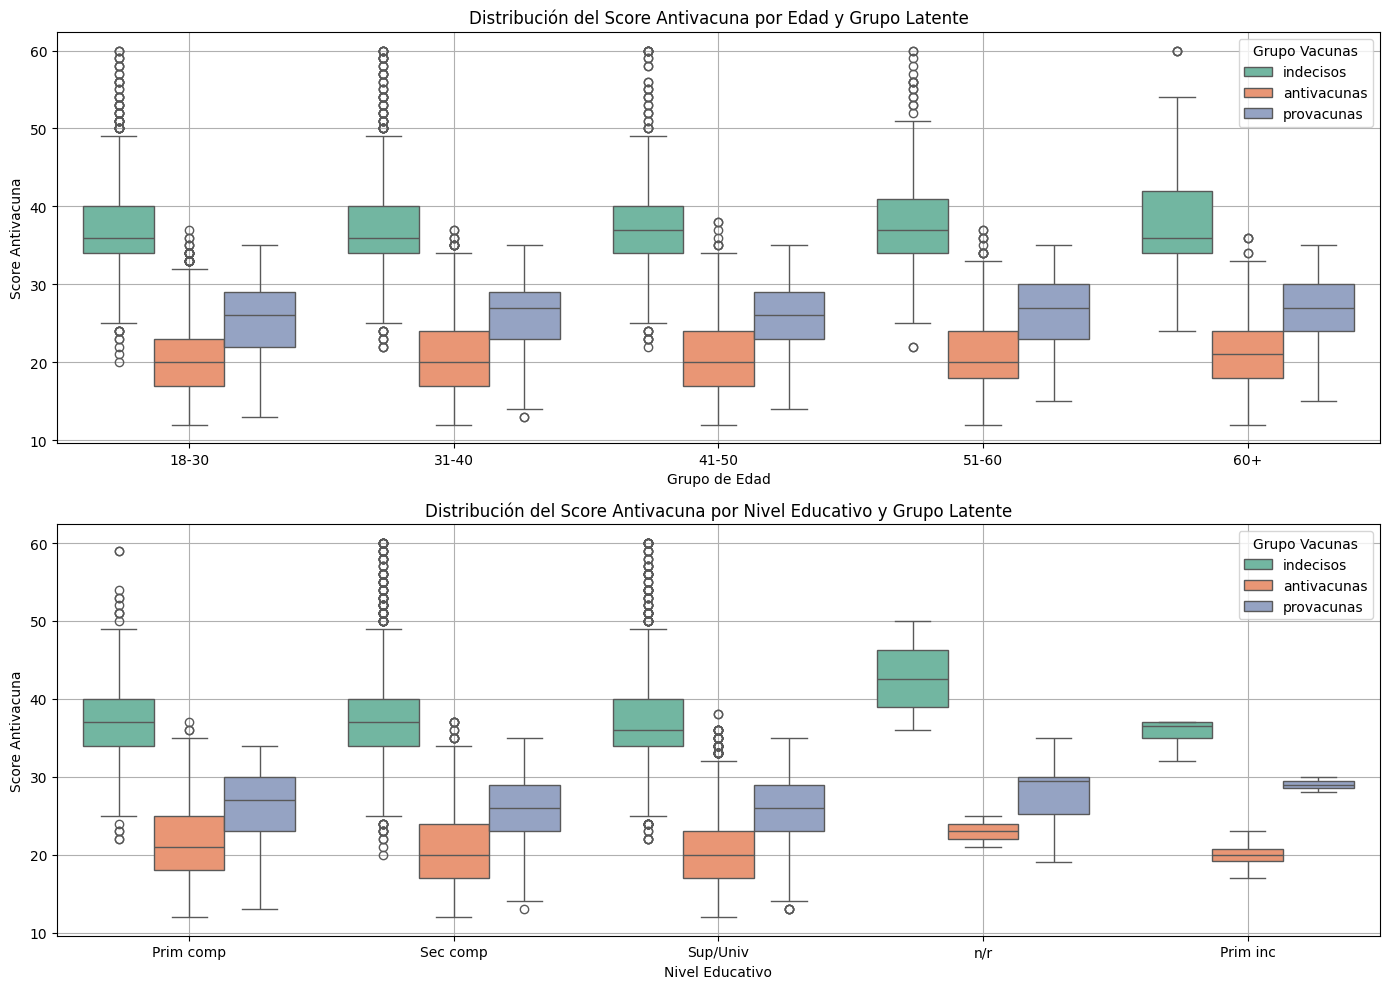

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar el score antivacunas por grupo de edad y nivel educativo, coloreado por grupo latente
plt.figure(figsize=(14, 10))

# Score antivacunas por grupo de edad y grupo latente
plt.subplot(2, 1, 1)
sns.boxplot(x='edad_grupo', y='score_antivacuna', hue='grupo_vacunas', data=df, palette='Set2')
plt.title('Distribución del Score Antivacuna por Edad y Grupo Latente')
plt.xlabel('Grupo de Edad')
plt.ylabel('Score Antivacuna')
plt.legend(title='Grupo Vacunas')
plt.grid(True)

# Score antivacunas por nivel educativo y grupo latente
plt.subplot(2, 1, 2)
sns.boxplot(x='niv_edu_3', y='score_antivacuna', hue='grupo_vacunas', data=df, palette='Set2')
plt.title('Distribución del Score Antivacuna por Nivel Educativo y Grupo Latente')
plt.xlabel('Nivel Educativo')
plt.ylabel('Score Antivacuna')
plt.legend(title='Grupo Vacunas')
plt.grid(True)

plt.tight_layout()
plt.show()





Conformación de los Clusters jerárquicos para el score Actitud Antivacuna, con eliminacion de los outliers

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


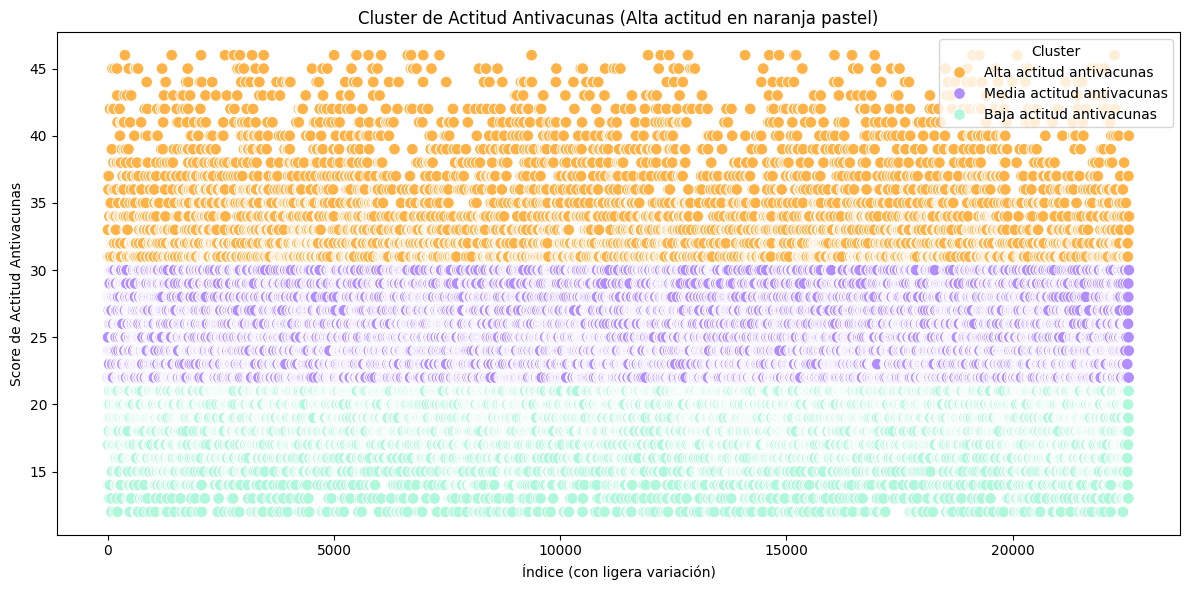

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv('/content/VACUNAS_SELECCION_a.csv', delimiter=';')

# Definir las variables de interés para los scores
score_antivacunas_cols = ['desconfianza_total', 'futuro_total', 'lucro_total', 'inmuno_total']

# Reemplazar NaNs con 0
df[score_antivacunas_cols] = df[score_antivacunas_cols].fillna(0)

# Calcular el score antivacunas
df['score_antivacunas'] = df[score_antivacunas_cols].sum(axis=1)

# Calcular el Z-score para el score antivacunas
df['score_antivacunas_z'] = np.abs(stats.zscore(df['score_antivacunas']))

# Eliminar outliers (umbral Z-score de 3)
df_no_outliers = df[df['score_antivacunas_z'] < 3].copy()

# Seleccionar solo la columna del score antivacunas para el clustering
data_for_clustering = df_no_outliers[['score_antivacunas']]

# Realizar el clustering usando KMeans (3 clusters)
kmeans = KMeans(n_clusters=3, random_state=0)
df_no_outliers['cluster'] = kmeans.fit_predict(data_for_clustering)

# Definir etiquetas para los clusters basándonos en la media de actitud antivacunas
cluster_means = df_no_outliers.groupby('cluster')['score_antivacunas'].mean()

# Identificar los clusters como baja, media, y alta actitud antivacunas
cluster_labels = {}
cluster_labels[cluster_means.idxmax()] = 'Alta actitud antivacunas'
cluster_labels[cluster_means.idxmin()] = 'Baja actitud antivacunas'
for cluster in cluster_means.index:
    if cluster not in cluster_labels:
        cluster_labels[cluster] = 'Media actitud antivacunas'

# Asignar las etiquetas a cada fila en el DataFrame
df_no_outliers['cluster_label'] = df_no_outliers['cluster'].map(cluster_labels)

# Crear una columna con desplazamientos pequeños en el eje X para evitar que los puntos se amontonen
df_no_outliers['x_jitter'] = np.arange(len(df_no_outliers)) + np.random.uniform(-0.2, 0.2, len(df_no_outliers))

# Definir los colores personalizados para cada nivel de actitud antivacunas
palette = {
    'Alta actitud antivacunas': '#FFB347',  # Naranja pastel
    'Media actitud antivacunas': '#B28DFF',  # Púrpura pastel
    'Baja actitud antivacunas': '#AFF8DB'  # Verde pastel
}

# Graficar el score antivacunas, resaltando los niveles de actitud
plt.figure(figsize=(12, 6))

sns.scatterplot(
    x='x_jitter',  # Eje X con desplazamientos aleatorios
    y='score_antivacunas',
    hue='cluster_label',
    palette=palette,
    data=df_no_outliers,
    s=70  # Tamaño de los puntos reducido para mayor claridad
)

# Ajustar el gráfico
plt.title('Cluster de Actitud Antivacunas (Alta actitud en naranja pastel)')
plt.xlabel('Índice (con ligera variación)')
plt.ylabel('Score de Actitud Antivacunas')
plt.legend(title='Cluster')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Cluster Jerárquicos de Actitud Antivacuna, a partir de las variables Ocupación y Cobertura de Salud

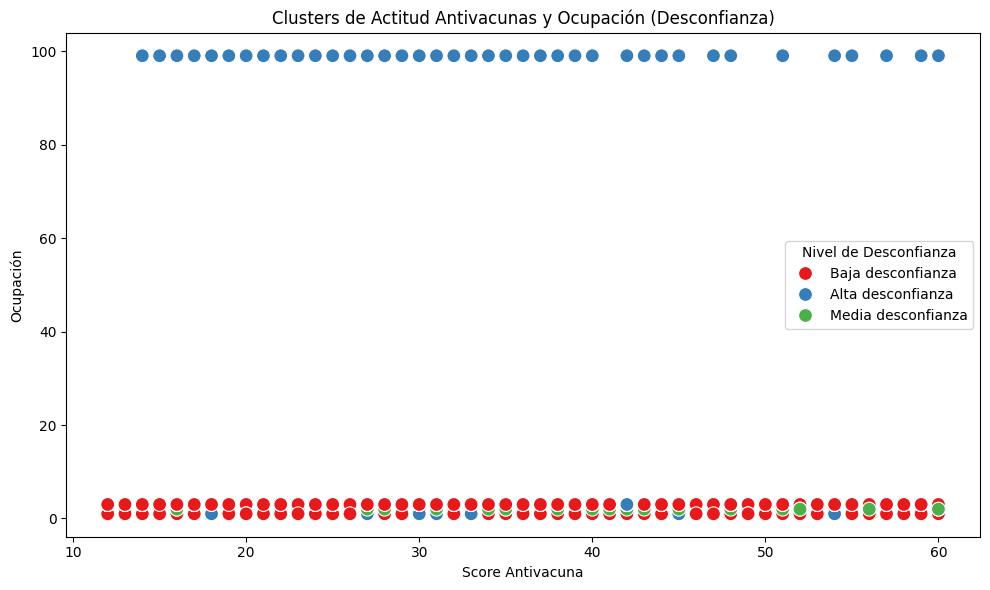

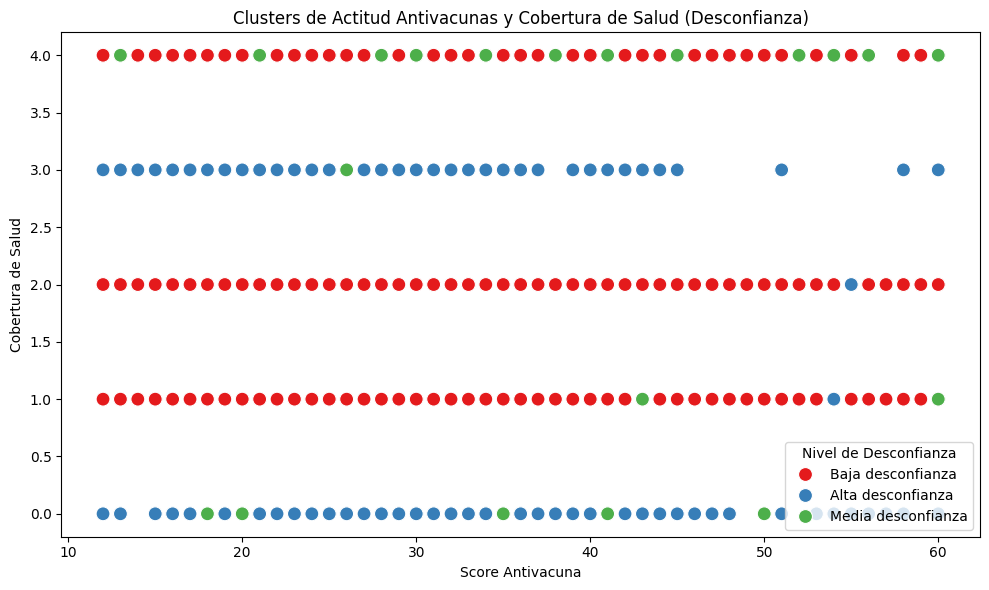

In [ ]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Cargar el dataset
df = pd.read_csv('VACUNAS_SELECCION_a.csv', delimiter=';')

# Seleccionar las columnas relevantes: score_antivacuna, cobertura_salud, ocupacion, desconfianza_total
data = df[['score_antivacuna', 'cobertura_salud', 'ocupacion', 'desconfianza_total']].copy()

# Mapeo de cobertura de salud (1=prepaga, 2=o. soc, 3=PAMI, 4=sist. pub, 0=n/s)
cobertura_map = {1: 'Prepaga', 2: 'Obra Social', 3: 'PAMI', 4: 'Sist. Público', 0: 'No sabe'}
data['cobertura_salud'] = data['cobertura_salud'].map(cobertura_map)

# Mapeo de ocupación (1=desocupado, 2=inactivo, 3=ocupado, 99=n/s)
ocupacion_map = {1: 'Desocupado', 2: 'Inactivo', 3: 'Ocupado', 99: 'No sabe'}
data['ocupacion'] = data['ocupacion'].map(ocupacion_map)

# Verificar si hay valores faltantes en las columnas numéricas y llenarlos con la mediana
data['score_antivacuna'].fillna(data['score_antivacuna'].median(), inplace=True)
data['desconfianza_total'].fillna(data['desconfianza_total'].median(), inplace=True)

# Para las columnas categóricas, puedes rellenar con el valor más frecuente (modo)
data['cobertura_salud'].fillna(data['cobertura_salud'].mode()[0], inplace=True)
data['ocupacion'].fillna(data['ocupacion'].mode()[0], inplace=True)

# Convertir las variables categóricas (cobertura_salud, ocupacion) en variables numéricas usando OneHotEncoding
data = pd.get_dummies(data, columns=['cobertura_salud', 'ocupacion'], drop_first=True)

# Escalar los datos para evitar que una variable domine sobre las demás
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Realizar el clustering usando Gaussian Mixture Model (elegimos 3 clusters como ejemplo)
gmm = GaussianMixture(n_components=3, random_state=0)
data['cluster'] = gmm.fit_predict(data_scaled)

# Añadir los clusters al DataFrame original
df['cluster'] = data['cluster']

# Clasificar los clusters en baja, media y alta desconfianza usando la media de desconfianza_total
cluster_means = df.groupby('cluster')['desconfianza_total'].mean()
cluster_labels = {}
cluster_labels[cluster_means.idxmax()] = 'Alta desconfianza'
cluster_labels[cluster_means.idxmin()] = 'Baja desconfianza'
for cluster in cluster_means.index:
    if cluster not in cluster_labels:
        cluster_labels[cluster] = 'Media desconfianza'

# Asignar las etiquetas de desconfianza a cada fila en el DataFrame
df['desconfianza_label'] = df['cluster'].map(cluster_labels)

# Graficar los clusters con el score antivacuna, cobertura de salud y ocupación, diferenciando los niveles de desconfianza

# Gráfico 1: Score antivacuna y ocupación, diferenciando niveles de desconfianza
plt.figure(figsize=(10, 6))
sns.scatterplot(x='score_antivacuna', y='ocupacion', hue='desconfianza_label', palette='Set1', data=df, s=100)
plt.title('Clusters de Actitud Antivacunas y Ocupación (Desconfianza)')
plt.xlabel('Score Antivacuna')
plt.ylabel('Ocupación')
plt.legend(title='Nivel de Desconfianza')
plt.tight_layout()
plt.show()

# Gráfico 2: Score antivacuna y cobertura de salud, diferenciando niveles de desconfianza
plt.figure(figsize=(10, 6))
sns.scatterplot(x='score_antivacuna', y='cobertura_salud', hue='desconfianza_label', palette='Set1', data=df, s=100)
plt.title('Clusters de Actitud Antivacunas y Cobertura de Salud (Desconfianza)')
plt.xlabel('Score Antivacuna')
plt.ylabel('Cobertura de Salud')
plt.legend(title='Nivel de Desconfianza')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


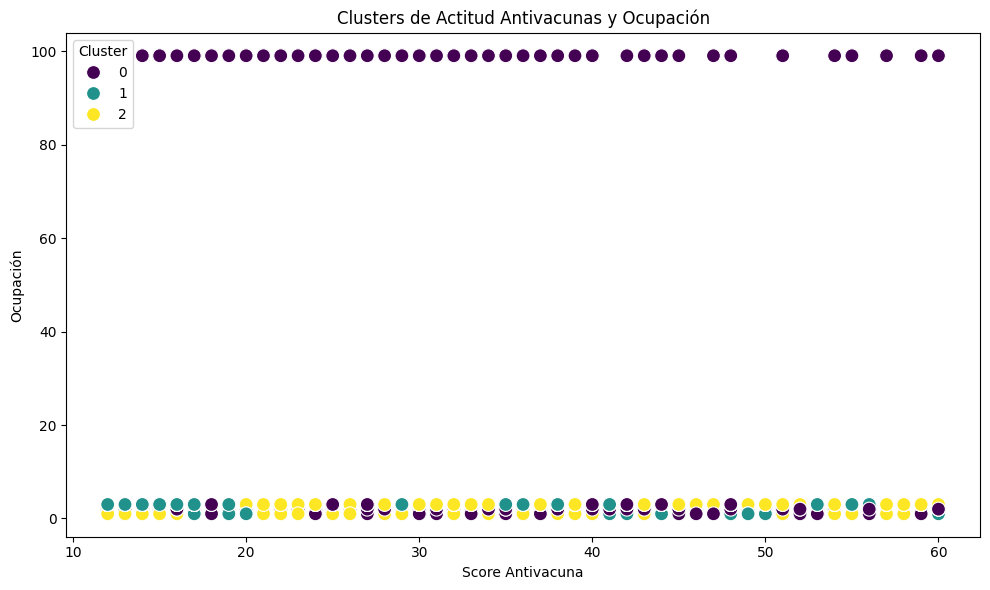

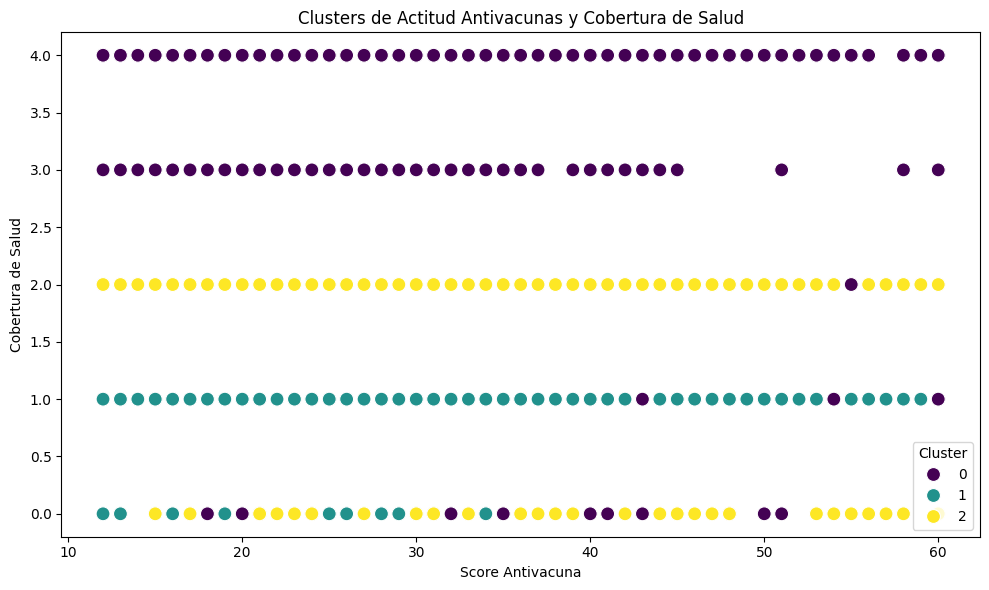

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Cargar el dataset
df = pd.read_csv('VACUNAS_SELECCION_a.csv', delimiter=';')

# Seleccionar las columnas relevantes: score_antivacuna, cobertura_salud y ocupacion
data = df[['score_antivacuna', 'cobertura_salud', 'ocupacion']].copy()

# Verificar si hay valores faltantes y, en caso de que haya, llenarlos (por ejemplo, con la mediana)
data.fillna(data.median(), inplace=True)

# Convertir las variables categóricas (cobertura_salud, ocupacion) en variables numéricas usando OneHotEncoding
data = pd.get_dummies(data, columns=['cobertura_salud', 'ocupacion'], drop_first=True)

# Escalar los datos para evitar que una variable domine sobre las demás
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Realizar el clustering usando KMeans (elegimos 3 clusters como ejemplo)
kmeans = KMeans(n_clusters=3, random_state=0)
data['cluster'] = kmeans.fit_predict(data_scaled)

# Añadir los clusters al DataFrame original
df['cluster'] = data['cluster']

# Graficar los clusters con el score antivacuna, cobertura de salud y ocupación
plt.figure(figsize=(10, 6))
sns.scatterplot(x='score_antivacuna', y='ocupacion', hue='cluster', palette='viridis', data=df, s=100)
plt.title('Clusters de Actitud Antivacunas y Ocupación')
plt.xlabel('Score Antivacuna')
plt.ylabel('Ocupación')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# Gráfico 2: Score antivacuna y cobertura de salud
plt.figure(figsize=(10, 6))
sns.scatterplot(x='score_antivacuna', y='cobertura_salud', hue='cluster', palette='viridis', data=df, s=100)
plt.title('Clusters de Actitud Antivacunas y Cobertura de Salud')
plt.xlabel('Score Antivacuna')
plt.ylabel('Cobertura de Salud')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


   edad_continua  edades_agrupadas  niv_edu_3  vacuna_oro2  id_genero  \
0             16                 1          2            1          1   
1             16                 1          2            1          1   
2             16                 1          3            1          1   
3             17                 1          2            1          1   
4             18                 1          3            1          1   

   residencia_regiones  ocupacion  cobertura_salud  enf_cronica  embarazo  \
0                    2          1                4            2         2   
1                    2          1                4            2         2   
2                    2          1                4            2         2   
3                    2          1                2            2         2   
4                    2          1                4            2         2   

   info_wapp  info_face  info_ig  recibio_info  aplica_vacunas  desconoce_vac  \
0          0     

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


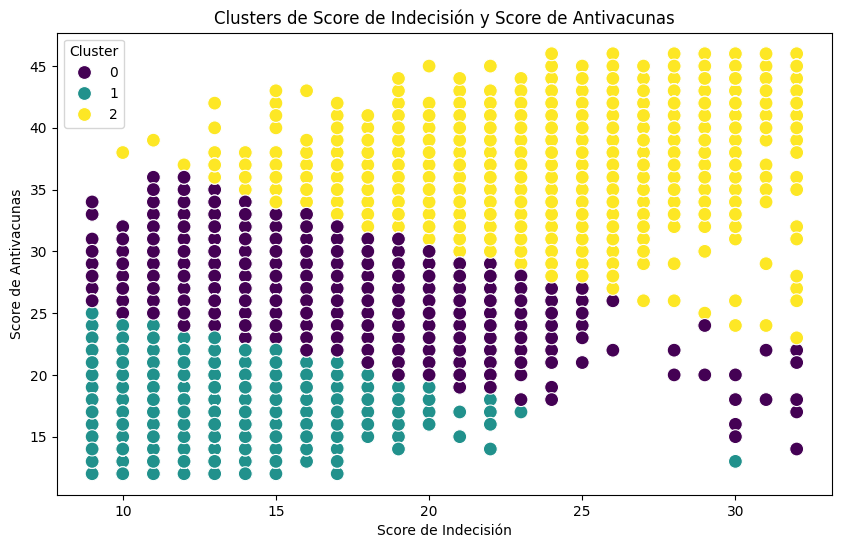

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv('/content/VACUNAS_SELECCION_a.csv', delimiter=';')

# Definir las variables de interés para los scores
score_indecision_cols = ['falta_conf_total', 'riesgo_total']
score_antivacunas_cols = ['desconfianza_total', 'futuro_total', 'lucro_total', 'inmuno_total']

# Reemplazar NaNs con 0 o una estrategia adecuada
df[score_indecision_cols] = df[score_indecision_cols].fillna(0)
df[score_antivacunas_cols] = df[score_antivacunas_cols].fillna(0)

# Calcular los scores
df['score_indecision'] = df[score_indecision_cols].sum(axis=1)
df['score_antivacunas'] = df[score_antivacunas_cols].sum(axis=1)

# Calcular el Z-score para los scores
df['score_indecision_z'] = np.abs(stats.zscore(df['score_indecision']))
df['score_antivacunas_z'] = np.abs(stats.zscore(df['score_antivacunas']))

# Usar un umbral de 3 para identificar outliers
df_no_outliers = df[(df['score_indecision_z'] < 3) & (df['score_antivacunas_z'] < 3)].copy()

# Eliminar columnas auxiliares
df_clean = df_no_outliers.drop(columns=['score_indecision', 'score_indecision_z', 'score_antivacunas', 'score_antivacunas_z'])

# Mostrar el DataFrame limpio
print(df_clean.head())

# Opcional: Guardar el DataFrame limpio para su uso posterior
df_clean.to_csv('VACUNAS_SELECCION_clean.csv', index=False, sep=';')

# Seleccionar solo las columnas relevantes para el clustering
data_for_clustering = df_no_outliers[['score_indecision', 'score_antivacunas']]

# Realizar el clustering usando KMeans
kmeans = KMeans(n_clusters=3, random_state=0)  # Ajusta el número de clusters según sea necesario
df_no_outliers['cluster'] = kmeans.fit_predict(data_for_clustering)

# Graficar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='score_indecision', y='score_antivacunas', hue='cluster', palette='viridis', data=df_no_outliers, s=100)
plt.title('Clusters de Score de Indecisión y Score de Antivacunas')
plt.xlabel('Score de Indecisión')
plt.ylabel('Score de Antivacunas')
plt.legend(title='Cluster')
plt.show()

Análisis de Correlación entre ambos scors Indecision y Antivacunas

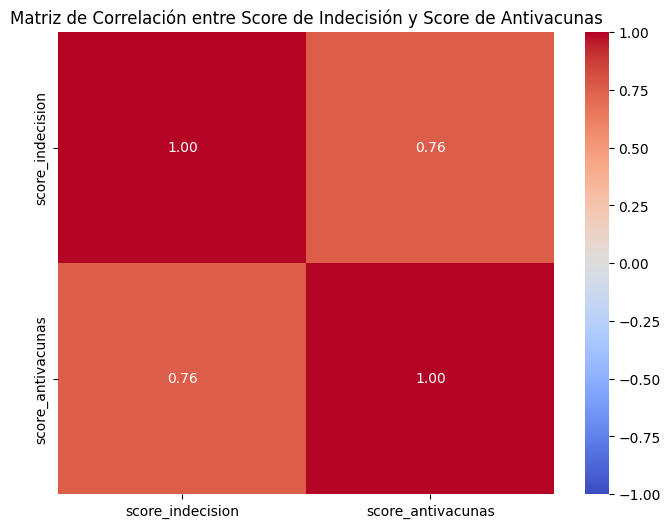

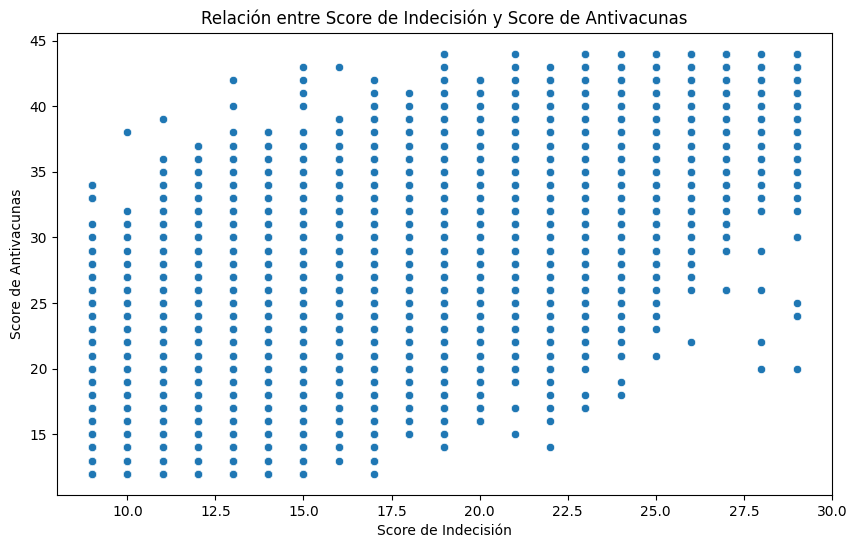

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv('/content/VACUNAS_SELECCION_clean.csv', delimiter=';')  # Asegúrate de usar el delimitador correcto

# Definir las variables de interés para los scores
score_indecision_cols = ['falta_conf_total', 'riesgo_total']
score_antivacunas_cols = ['desconfianza_total', 'futuro_total', 'lucro_total', 'inmuno_total']

# Reemplazar NaNs con 0 o una estrategia adecuada
df[score_indecision_cols] = df[score_indecision_cols].fillna(0)
df[score_antivacunas_cols] = df[score_antivacunas_cols].fillna(0)

# Calcular los scores
df['score_indecision'] = df[score_indecision_cols].sum(axis=1)
df['score_antivacunas'] = df[score_antivacunas_cols].sum(axis=1)

# Calcular el Z-score para los scores
df['score_indecision_z'] = np.abs(stats.zscore(df['score_indecision']))
df['score_antivacunas_z'] = np.abs(stats.zscore(df['score_antivacunas']))

# Usar un umbral de 3 para identificar outliers
df_no_outliers = df[(df['score_indecision_z'] < 3) & (df['score_antivacunas_z'] < 3)].copy()

# Calcular la matriz de correlación
correlation_matrix = df_no_outliers[['score_indecision', 'score_antivacunas']].corr()

# Graficar la matriz de correlación usando un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Matriz de Correlación entre Score de Indecisión y Score de Antivacunas')
plt.show()

# Graficar la relación entre score_indecision y score_antivacunas
plt.figure(figsize=(10, 6))
sns.scatterplot(x='score_indecision', y='score_antivacunas', data=df_no_outliers)
plt.title('Relación entre Score de Indecisión y Score de Antivacunas')
plt.xlabel('Score de Indecisión')
plt.ylabel('Score de Antivacunas')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Cargar el dataset
df = pd.read_csv('VACUNAS_SELECCION_a.csv')

# Mostrar los nombres de las columnas para confirmar que existen las necesarias
print("Columnas en el DataFrame:")
print(df.columns)

# Definir las variables de interés
score_indecision_cols = ['falta_conf_total', 'riesgo_total']
score_antivacunas_cols = ['desconfianza_total', 'futuro_total', 'lucro_total', 'inmuno_total']

# Verificar si las columnas existen en el DataFrame
missing_columns_indecision = [col for col in score_indecision_cols if col not in df.columns]
missing_columns_antivacunas = [col for col in score_antivacunas_cols if col not in df.columns]

if missing_columns_indecision or missing_columns_antivacunas:
    raise ValueError(f"Columnas faltantes en el DataFrame: {missing_columns_indecision + missing_columns_antivacunas}")

# Reemplazar NaNs con 0 o una estrategia adecuada
df[score_indecision_cols] = df[score_indecision_cols].fillna(0)
df[score_antivacunas_cols] = df[score_antivacunas_cols].fillna(0)

# Calcular score_indecision y su Z-score
df['score_indecision'] = df[score_indecision_cols].sum(axis=1)
df['score_indecision_z'] = np.abs(stats.zscore(df['score_indecision']))

# Usar un umbral de 3 para identificar outliers en score_indecision
df_no_outliers_indecision = df[df['score_indecision_z'] < 3].copy()

# Calcular score_antivacunas y su Z-score
df_no_outliers_indecision['score_antivacunas'] = df_no_outliers_indecision[score_antivacunas_cols].sum(axis=1)
df_no_outliers_indecision['score_antivacunas_z'] = np.abs(stats.zscore(df_no_outliers_indecision['score_antivacunas']))

# Usar un umbral de 3 para identificar outliers en score_antivacunas
df_clean = df_no_outliers_indecision[df_no_outliers_indecision['score_antivacunas_z'] < 3].copy()

# Eliminar columnas auxiliares
df_clean = df_clean.drop(columns=['score_indecision', 'score_indecision_z', 'score_antivacunas', 'score_antivacunas_z'])

# Mostrar el DataFrame limpio
print(df_clean.head())


Columnas en el DataFrame:
Index(['edad_continua;edades_agrupadas;niv_edu_3;vacuna_oro2;id_genero;residencia_regiones;ocupacion;cobertura_salud;enf_cronica;embarazo;info_wapp;info_face;info_ig;recibio_info;aplica_vacunas;desconoce_vac;no_quiere;no_paga;desconfianza_total;futuro_total;lucro_total;inmuno_total;score_antivacuna;falta_conf_total;riesgo_total;score_indecision_total;vacuna_score_t;pagaria_oro'], dtype='object')


ValueError: Columnas faltantes en el DataFrame: ['falta_conf_total', 'riesgo_total', 'desconfianza_total', 'futuro_total', 'lucro_total', 'inmuno_total']

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Cargar el dataset
df = pd.read_csv('VACUNAS_SELECCION_a.csv')

# Definir las variables de interés
variables_scores = ['falta_conf_total', 'riesgo_total']
variables_antivacunas = ['desconfianza_total', 'futuro_total', 'lucro_total', 'inmuno_total']

# Identificar y manejar outliers para score_indecision
df['score_indecision'] = df[variables_scores].sum(axis=1)
df['score_indecision_z'] = np.abs(stats.zscore(df['score_indecision']))

# Usar un umbral de 3 para identificar outliers
df_no_outliers_indecision = df[df['score_indecision_z'] < 3]

# Identificar y manejar outliers para score_antivacunas
df_no_outliers_indecision['score_antivacunas'] = df_no_outliers_indecision[variables_antivacunas].sum(axis=1)
df_no_outliers_indecision['score_antivacunas_z'] = np.abs(stats.zscore(df_no_outliers_indecision['score_antivacunas']))

# Usar un umbral de 3 para identificar outliers
df_clean = df_no_outliers_indecision[df_no_outliers_indecision['score_antivacunas_z'] < 3]

# Eliminar columnas auxiliares
df_clean = df_clean.drop(columns=['score_indecision', 'score_indecision_z', 'score_antivacunas', 'score_antivacunas_z'])

# Mostrar el DataFrame limpio
print(df_clean.head())


KeyError: "None of [Index(['falta_conf_total', 'riesgo_total'], dtype='object')] are in the [columns]"

In [ ]:
import pandas as pd

# Cargar el dataset (reemplaza 'nombre_del_archivo.csv' por el nombre del archivo subido)
df = pd.read_csv('/content/VACUNAS_SELECCION_a.csv')

# Mostrar todas las columnas
pd.set_option('display.max_columns', None)

# Mostrar las 5 primeras filas del dataset
print(df.head())


  edad_continua;edades_agrupadas;niv_edu_3;vacuna_oro2;id_genero;residencia_regiones;ocupacion;cobertura_salud;enf_cronica;embarazo;info_wapp;info_face;info_ig;recibio_info;aplica_vacunas;desconoce_vac;no_quiere;no_paga;desconfianza_total;futuro_total;lucro_total;inmuno_total;score_antivacuna;falta_conf_total;riesgo_total;score_indecision_total;vacuna_score_t;pagaria_oro
0  16;1;2;1;1;2;1;4;2;2;0;1;0;1;1;0;0;0;7;9;11;6;...                                                                                                                                                                                                                                                                                                                                 
1  16;1;2;1;1;2;1;4;2;2;0;1;0;0;1;0;0;0;3;7;6;6;2...                                                                                                                                                                                                        

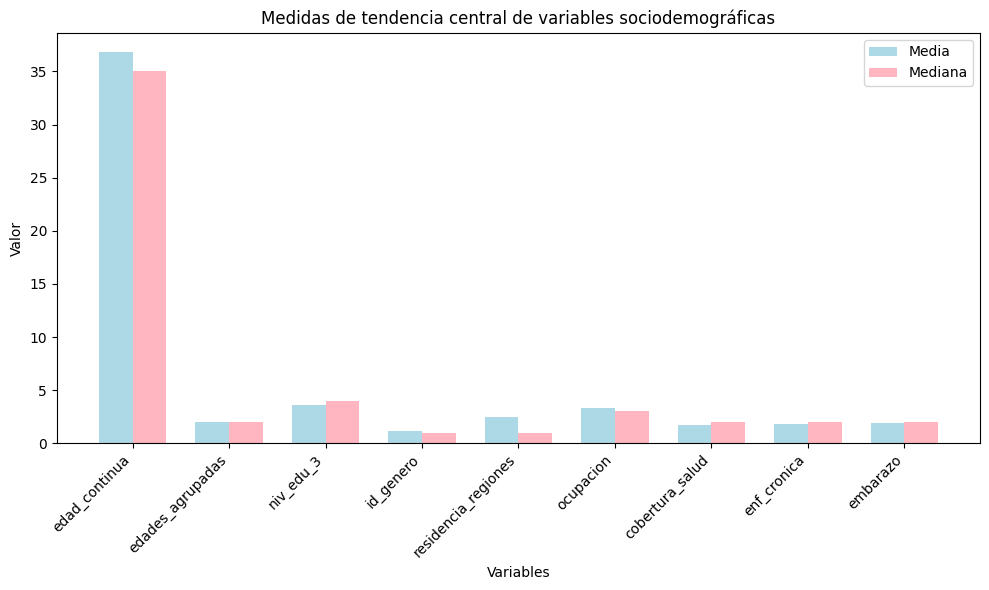

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de las variables sociodemográficas
variables = ['edad_continua', 'edades_agrupadas', 'niv_edu_3', 'id_genero', 'residencia_regiones',
             'ocupacion', 'cobertura_salud', 'enf_cronica', 'embarazo']

# Medidas de tendencia central (media y mediana)
mean_values = [36.80, 2.02, 3.59, 1.17, 2.48, 3.36, 1.73, 1.77, 1.92]
median_values = [35.00, 2.00, 4.00, 1.00, 1.00, 3.00, 2.00, 2.00, 2.00]

# Crear gráfico de barras
x = np.arange(len(variables))  # Etiquetas de las variables
width = 0.35  # Ancho de las barras

fig, ax = plt.subplots(figsize=(10, 6))

# Gráfica de la media
bars1 = ax.bar(x - width/2, mean_values, width, label='Media', color='lightblue')

# Gráfica de la mediana
bars2 = ax.bar(x + width/2, median_values, width, label='Mediana', color='lightpink')

# Añadir etiquetas y título
ax.set_xlabel('Variables')
ax.set_ylabel('Valor')
ax.set_title('Medidas de tendencia central de variables sociodemográficas')
ax.set_xticks(x)
ax.set_xticklabels(variables, rotation=45, ha='right')
ax.legend()

# Mostrar gráfico
plt.tight_layout()
plt.show()


Perfil de Desconfianza hacia la vacuna

In [ ]:
# Cargar el archivo CSV para analizar el perfil de desconfianza hacia las vacunas
file_path = '/content/VACUNAS_SELECCION_a.csv'
df = pd.read_csv(file_path, delimiter=';', decimal=',')

# Calcular las medidas de tendencia central y dispersión para las columnas relacionadas con desconfianza hacia las vacunas
desconfianza_vars = ['desconfianza_total', 'futuro_total', 'lucro_total', 'inmuno_total', 'score_antivacuna', 'falta_conf_total', 'riesgo_total', 'score_indecision_total']

desconfianza_stats = df[desconfianza_vars].describe()

desconfianza_stats


FileNotFoundError: [Errno 2] No such file or directory: '/content/VACUNAS_SELECCION_a.csv'

Grafico de la Tendencia central de la Desconfianza hacia la vacuna

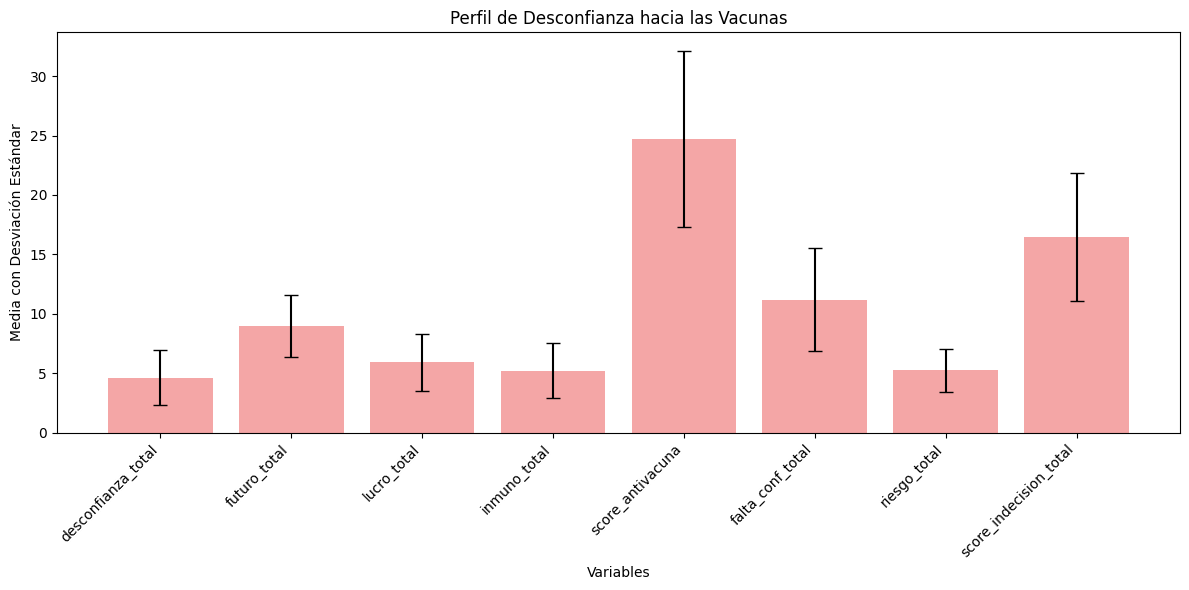

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Variables y sus estadísticas
variables = ['desconfianza_total', 'futuro_total', 'lucro_total', 'inmuno_total', 'score_antivacuna',
             'falta_conf_total', 'riesgo_total', 'score_indecision_total']

mean_values = [4.62, 8.96, 5.91, 5.21, 24.70, 11.17, 5.25, 16.43]
std_values = [2.33, 2.59, 2.42, 2.32, 7.38, 4.34, 1.80, 5.39]

# Crear gráfico de barras con error bars (desviación estándar)
x = np.arange(len(variables))  # Etiquetas de las variables
width = 0.75  # Ancho de las barras

fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.bar(x, mean_values, yerr=std_values, color='lightcoral', alpha=0.7, capsize=5)

# Añadir etiquetas y título
ax.set_xlabel('Variables')
ax.set_ylabel('Media con Desviación Estándar')
ax.set_title('Perfil de Desconfianza hacia las Vacunas')
ax.set_xticks(x)
ax.set_xticklabels(variables, rotation=45, ha='right')

# Mostrar gráfico
plt.tight_layout()
plt.show()


a) Distribución del score total de confianza:
Histograma: Muestra cómo se distribuyen los scores de confianza en las distintas observaciones, ayudando a identificar si los scores están concentrados en un rango o si hay mucha variabilidad.
Gráfico de Barras: Cada barra representa el score de confianza de una observación específica, lo que facilita la comparación entre las observaciones individuales.

In [ ]:
import pandas as pd

# Cargar el archivo CSV
file_path = '/content/VACUNAS_SELECCION_a.csv'
df = pd.read_csv(file_path, delimiter=';', decimal=',')

# Variables relacionadas con la desconfianza hacia las vacunas
desconfianza_vars = [ 'futuro_total', 'lucro_total', 'inmuno_total', 'falta_conf_total', 'riesgo_total']

# Calcular el score total de confianza invirtiendo la desconfianza
df['score_confianza_total'] = 100 - df[desconfianza_vars].sum(axis=1)

# Ver las primeras filas con el nuevo score de confianza
print(df[['score_confianza_total']].head())

# Guardar el DataFrame con el nuevo score
df.to_csv('/content/VACUNAS_CON_SCORE_CONFIANZA.csv', index=False)

import matplotlib.pyplot as plt

# Datos del score de confianza total
score_confianza = [45, 66, 49, 58, 42]

# Crear histograma para ver la distribución del score de confianza
plt.figure(figsize=(8, 6))
plt.hist(score_confianza, bins=5, color='lightblue', edgecolor='black')
plt.title('Distribución del Score de Confianza hacia las Vacunas')
plt.xlabel('Score de Confianza Total')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()



FileNotFoundError: [Errno 2] No such file or directory: '/content/VACUNAS_SELECCION_a.csv'

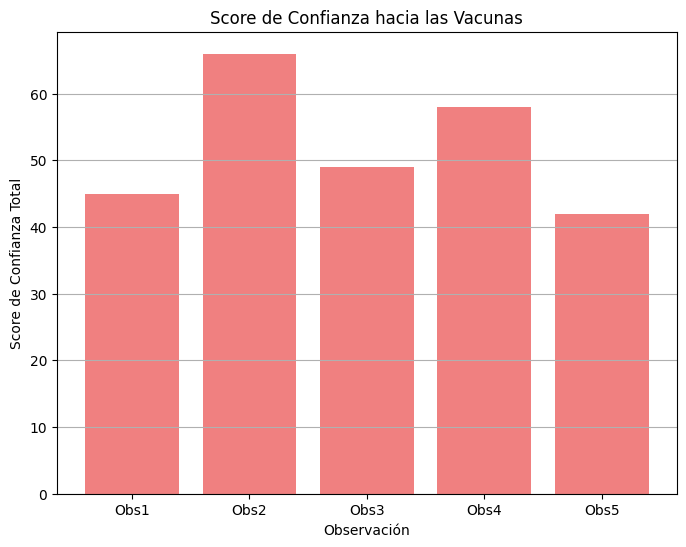

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos del score de confianza total
score_confianza = [45, 66, 49, 58, 42]

# Crear gráfico de barras
x = np.arange(len(score_confianza))  # Índices para las barras
plt.figure(figsize=(8, 6))
plt.bar(x, score_confianza, color='lightcoral')
plt.title('Score de Confianza hacia las Vacunas')
plt.xlabel('Observación')
plt.ylabel('Score de Confianza Total')
plt.xticks(x, ['Obs1', 'Obs2', 'Obs3', 'Obs4', 'Obs5'])  # Etiquetas para cada barra
plt.grid(True, axis='y')
plt.show()


Gráfico del score de Confianzza Total.

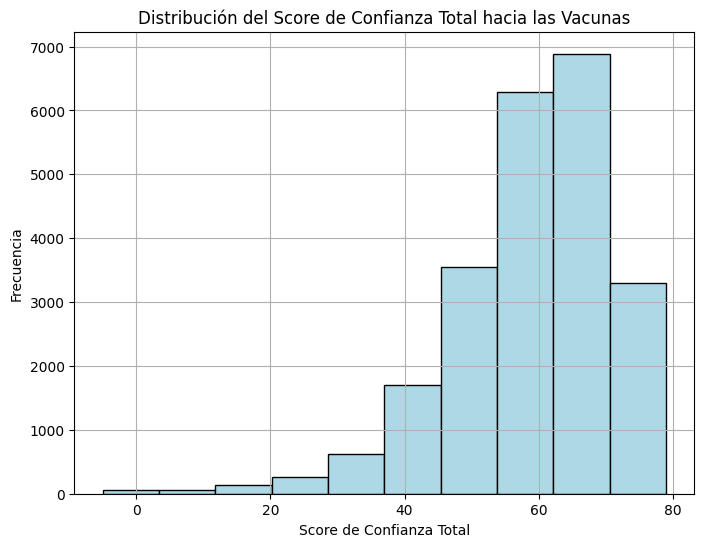

In [ ]:
import matplotlib.pyplot as plt

# Crear histograma del score_confianza_total
plt.figure(figsize=(8, 6))
plt.hist(df['score_confianza_total'], bins=10, color='lightblue', edgecolor='black')

# Añadir etiquetas y título
plt.title('Distribución del Score de Confianza Total hacia las Vacunas')
plt.xlabel('Score de Confianza Total')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.grid(True)
plt.show()


b) Comparación de desconfianza por grupo de edad

In [ ]:
import pandas as pd

# Cargar el dataset
file_path = 'VACUNAS_SELECCION_a.csv'
df = pd.read_csv(file_path, delimiter=';')

# Verificar las primeras filas del dataframe para entender su estructura
print(df.head())

# Agrupar por las edades agrupadas y calcular la desconfianza promedio
# Asumo que 'desconfianza_total' representa la desconfianza hacia la vacuna
grouped_age = df.groupby('edades_agrupadas')['desconfianza_total'].mean()

# Mostrar la desconfianza promedio por grupo de edad
print("Desconfianza promedio hacia la vacuna del virus Oropouche por grupo de edad:")
print(grouped_age)

# Análisis adicional para entender el perfil de actitudes hacia la vacuna
# Se pueden calcular estadísticas descriptivas para las actitudes hacia la vacuna
actitudes_summary = df[['edad_continua', 'desconfianza_total', 'score_antivacuna']].describe()

# Mostrar el resumen de las actitudes hacia la vacuna
print("\nResumen estadístico de actitudes hacia la vacuna del virus Oropouche:")
print(actitudes_summary)


   edad_continua  edades_agrupadas  niv_edu_3  vacuna_oro2  id_genero  \
0             16                 1          2            1          1   
1             16                 1          2            1          1   
2             16                 1          3            1          1   
3             17                 1          2            1          1   
4             18                 1          3            1          1   

   residencia_regiones  ocupacion  cobertura_salud  enf_cronica  embarazo  \
0                    2          1                4            2         2   
1                    2          1                4            2         2   
2                    2          1                4            2         2   
3                    2          1                2            2         2   
4                    2          1                4            2         2   

   info_wapp  info_face  info_ig  recibio_info  aplica_vacunas  desconoce_vac  \
0          0     

<ipython-input-30-d92deaf5dbde>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='edades_agrupadas', y='desconfianza_total', data=df_desconfianza, palette=palette)
<ipython-input-30-d92deaf5dbde>:22: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(x='edades_agrupadas', y='desconfianza_total', data=df_desconfianza, palette=palette)


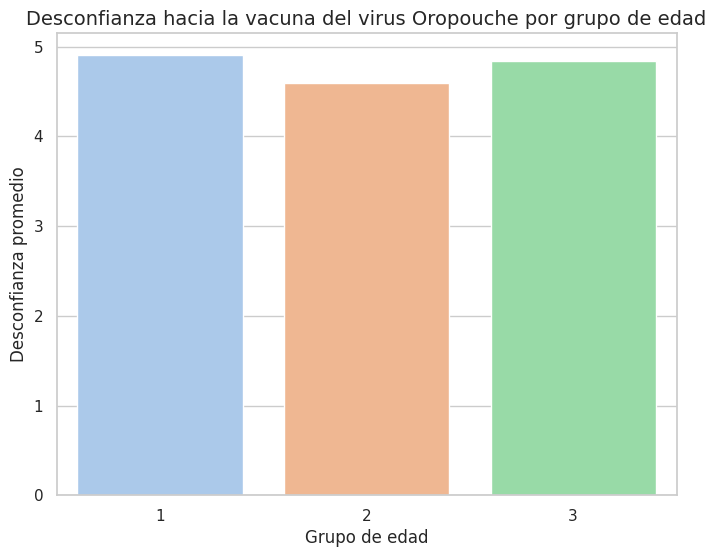

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datos simulados basados en tu resumen de desconfianza por grupo de edad
desconfianza_por_edad = {
    'edades_agrupadas': [1, 2, 3],
    'desconfianza_total': [4.903226, 4.599162, 4.841256]
}

# Crear un dataframe con los datos
df_desconfianza = pd.DataFrame(desconfianza_por_edad)

# Establecer un estilo estético de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras con colores pasteles
plt.figure(figsize=(8, 6))
palette = sns.color_palette("pastel")

# Gráfico de barras
sns.barplot(x='edades_agrupadas', y='desconfianza_total', data=df_desconfianza, palette=palette)

# Añadir títulos y etiquetas
plt.title("Desconfianza hacia la vacuna del virus Oropouche por grupo de edad", fontsize=14)
plt.xlabel("Grupo de edad", fontsize=12)
plt.ylabel("Desconfianza promedio", fontsize=12)

# Mostrar el gráfico
plt.show()


c) Relación entre desconfianza y nivel educativo

   edad_continua  edades_agrupadas  niv_edu_3  vacuna_oro2  id_genero  \
0             16                 1          2            1          1   
1             16                 1          2            1          1   
2             16                 1          3            1          1   
3             17                 1          2            1          1   
4             18                 1          3            1          1   

   residencia_regiones  ocupacion  cobertura_salud  enf_cronica  embarazo  \
0                    2          1                4            2         2   
1                    2          1                4            2         2   
2                    2          1                4            2         2   
3                    2          1                2            2         2   
4                    2          1                4            2         2   

   info_wapp  info_face  info_ig  recibio_info  aplica_vacunas  desconoce_vac  \
0          0     

<ipython-input-31-7ce2e2acc25f>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='niv_edu_3', y='desconfianza_total', data=desconfianza_nivel_educativo, palette=palette)
<ipython-input-31-7ce2e2acc25f>:25: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.barplot(x='niv_edu_3', y='desconfianza_total', data=desconfianza_nivel_educativo, palette=palette)


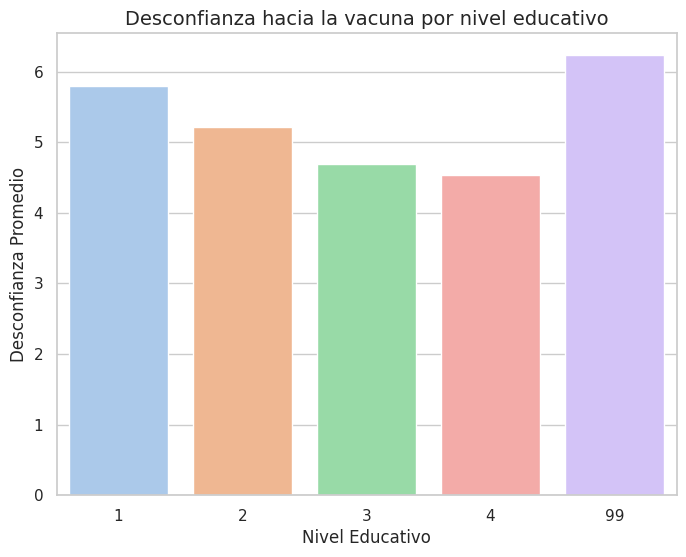

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
file_path = 'VACUNAS_SELECCION_a.csv'
df = pd.read_csv(file_path, delimiter=';')

# Verificar las primeras filas para entender la estructura
print(df.head())

# Agrupar por nivel educativo y calcular la desconfianza promedio
desconfianza_nivel_educativo = df.groupby('niv_edu_3')['desconfianza_total'].mean().reset_index()

# Verificar el resultado de la agrupación
print("Desconfianza promedio por nivel educativo:")
print(desconfianza_nivel_educativo)

# Visualización de la relación entre nivel educativo y desconfianza
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
palette = sns.color_palette("pastel")

# Crear gráfico de barras
sns.barplot(x='niv_edu_3', y='desconfianza_total', data=desconfianza_nivel_educativo, palette=palette)

# Añadir títulos y etiquetas
plt.title("Desconfianza hacia la vacuna por nivel educativo", fontsize=14)
plt.xlabel("Nivel Educativo", fontsize=12)
plt.ylabel("Desconfianza Promedio", fontsize=12)

# Mostrar el gráfico
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
file_path = 'VACUNAS_SELECCION_a.csv'
df = pd.read_csv(file_path, delimiter=';')

# Verificar las primeras filas del dataframe
print(df.head())

# Crear el score de confianza basado en la falta de confianza (falta_conf_total)
max_confianza = 20  # Asumimos que el valor máximo posible de confianza es 20
df['score_confianza'] = max_confianza - df['falta_conf_total']

# Agrupar por nivel educativo y calcular el score de confianza promedio
confianza_nivel_educativo = df.groupby('niv_edu_3')['score_confianza'].mean().reset_index()

# Verificar el resultado
print("Score de confianza promedio por nivel educativo:")
print(confianza_nivel_educativo)

# Visualización del score de confianza por nivel educativo
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
palette = sns.color_palette("pastel")

# Crear gráfico de barras
sns.barplot(x='niv_edu_3', y='score_confianza', data=confianza_nivel_educativo, palette=palette)

# Añadir títulos y etiquetas
plt.title("Score de Confianza por Nivel Educativo", fontsize=14)
plt.xlabel("Nivel Educativo", fontsize=12)
plt.ylabel("Score de Confianza Promedio", fontsize=12)

# Mostrar el gráfico
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'VACUNAS_SELECCION_a.csv'

Resumen del perfil general de desconfianza

Estadísticas descriptivas del Score de Confianza:
count    22850.000000
mean         8.828096
std          4.342874
min        -15.000000
25%          6.000000
50%         10.000000
75%         12.000000
max         13.000000
Name: score_confianza, dtype: float64


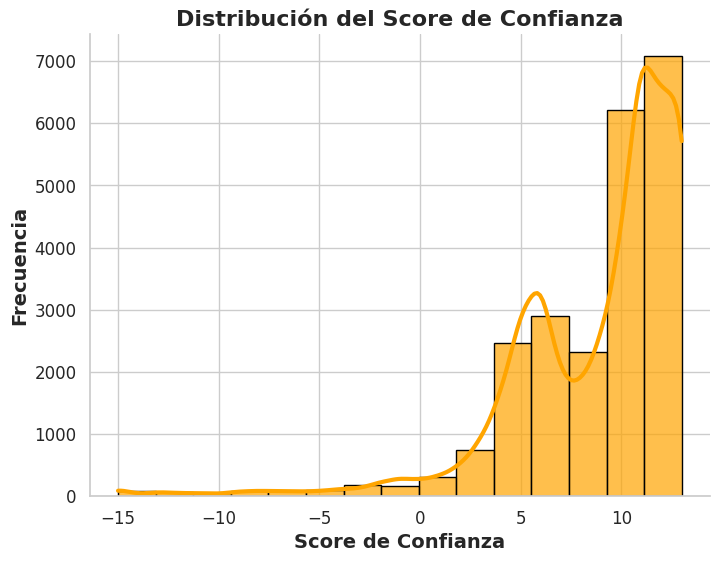

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
file_path = 'VACUNAS_SELECCION_a.csv'
df = pd.read_csv(file_path, delimiter=';')

# Crear el score de confianza basado en la falta de confianza (falta_conf_total)
max_confianza = 20  # Asumimos que el valor máximo posible de confianza es 20
df['score_confianza'] = max_confianza - df['falta_conf_total']

# Obtener estadísticas descriptivas para el score de confianza
estadisticas_confianza = df['score_confianza'].describe()

# Mostrar las estadísticas descriptivas
print("Estadísticas descriptivas del Score de Confianza:")
print(estadisticas_confianza)

# Configuración del estilo del gráfico
sns.set(style="whitegrid")

# Ajustar el tamaño del gráfico
plt.figure(figsize=(8, 6))

# Crear gráfico de densidad con histograma ajustado
sns.histplot(df['score_confianza'], kde=True,
             bins=15, color="orange", edgecolor='black', alpha=0.7,  # Color contrastante para las barras
             line_kws={'color': 'orange', 'lw': 3})  # Color contrastante para la línea de densidad

# Añadir títulos y etiquetas
plt.title("Distribución del Score de Confianza", fontsize=16, fontweight='bold')
plt.xlabel("Score de Confianza", fontsize=14, fontweight='bold')
plt.ylabel("Frecuencia", fontsize=14, fontweight='bold')

# Ajustar tamaño de los ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Añadir bordes a la figura
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Mostrar el gráfico mejorado
plt.show()


Primero, visualicemos las estadísticas descriptivas a través de un boxplot:

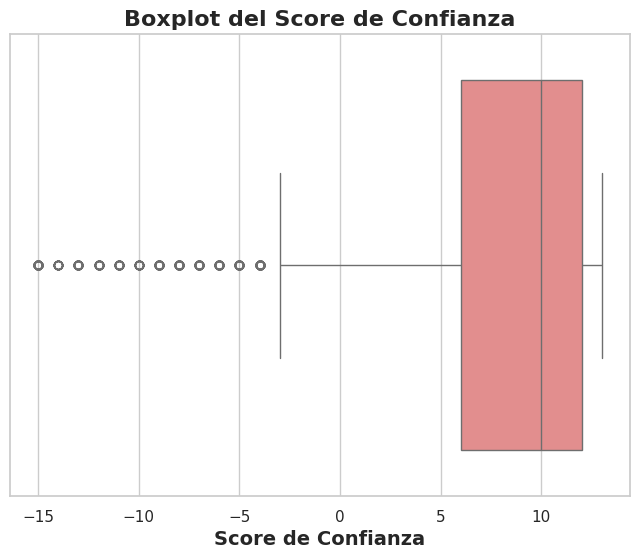

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
file_path = 'VACUNAS_SELECCION_a.csv'
df = pd.read_csv(file_path, delimiter=';')

# Crear el score de confianza basado en la falta de confianza (falta_conf_total)
max_confianza = 20  # Asumimos que el valor máximo posible de confianza es 20
df['score_confianza'] = max_confianza - df['falta_conf_total']

# Configuración del estilo del gráfico
sns.set(style="whitegrid")

# Ajustar el tamaño del gráfico
plt.figure(figsize=(8, 6))

# Crear el boxplot para el score de confianza
sns.boxplot(x=df['score_confianza'], color="lightcoral")

# Añadir títulos y etiquetas
plt.title("Boxplot del Score de Confianza", fontsize=16, fontweight='bold')
plt.xlabel("Score de Confianza", fontsize=14, fontweight='bold')

# Mostrar el gráfico
plt.show()


A continuación, un histograma para visualizar la distribución:

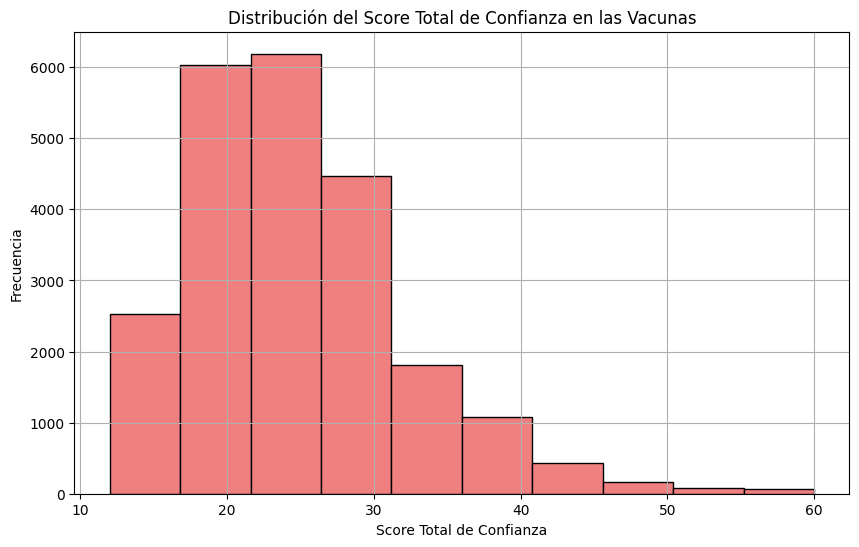

In [ ]:
# Histograma de la distribución del score de confianza
plt.figure(figsize=(10,6))
plt.hist(df['score_total_conf'].dropna(), bins=10, color='lightcoral', edgecolor='black')
plt.title('Distribución del Score Total de Confianza en las Vacunas')
plt.xlabel('Score Total de Confianza')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


Perfil de actitudes para la vacuna Oropuche

Perfil de actitudes hacia la vacuna del virus Oropouche:
       desconfianza_total  futuro_total   lucro_total  inmuno_total
count        20734.000000  20734.000000  20734.000000  20734.000000
mean             4.354635      8.723160      5.624578      4.918154
std              2.071357      2.481076      2.156087      2.025522
min              3.000000      3.000000      3.000000      3.000000
25%              3.000000      7.000000      4.000000      3.000000
50%              3.000000      9.000000      5.000000      5.000000
75%              6.000000     10.000000      7.000000      6.000000
max             15.000000     15.000000     15.000000     15.000000


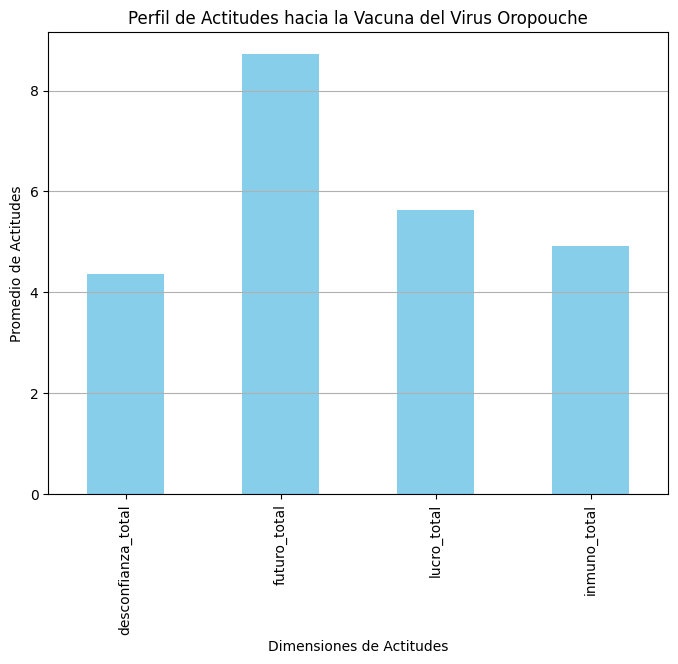

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset
file_path = '/content/VACUNAS_SELECCION_a.csv'  # Ajustar según corresponda en tu Colab
df = pd.read_csv(file_path, delimiter=';')

# Filtrar las observaciones relacionadas con la vacuna del virus Oropouche (vacuna_oro2 = 1)
df_oro = df[df['vacuna_oro2'] == 1]

# Dimensiones de actitudes relacionadas con la vacuna (según las variables mencionadas)
vax_dims = ['desconfianza_total', 'futuro_total', 'lucro_total', 'inmuno_total']

# Calcular el perfil de actitudes hacia la vacuna del virus Oropouche
perfil_vax_oro = df_oro[vax_dims].describe()

# Mostrar el perfil estadístico
print("Perfil de actitudes hacia la vacuna del virus Oropouche:")
print(perfil_vax_oro)

# Visualización del perfil de actitudes con gráficos de barras
mean_vax_oro = df_oro[vax_dims].mean()

# Crear un gráfico de barras para visualizar la media de cada dimensión
plt.figure(figsize=(8, 6))
mean_vax_oro.plot(kind='bar', color='skyblue')
plt.title('Perfil de Actitudes hacia la Vacuna del Virus Oropouche')
plt.xlabel('Dimensiones de Actitudes')
plt.ylabel('Promedio de Actitudes')
plt.grid(True, axis='y')
plt.show()


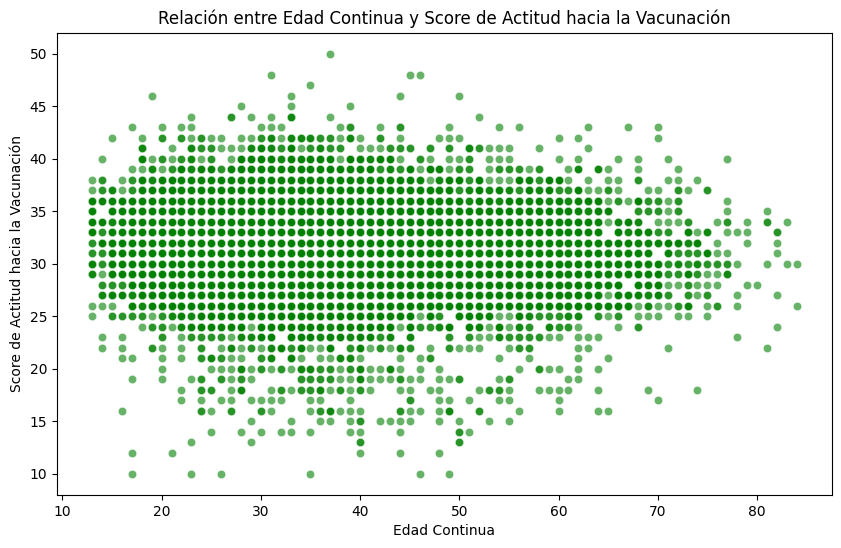

<ipython-input-10-e72540a4e7db>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Edades_agrupadas', y='VACUNAVIRUS_SCORE', data=df, palette='magma')


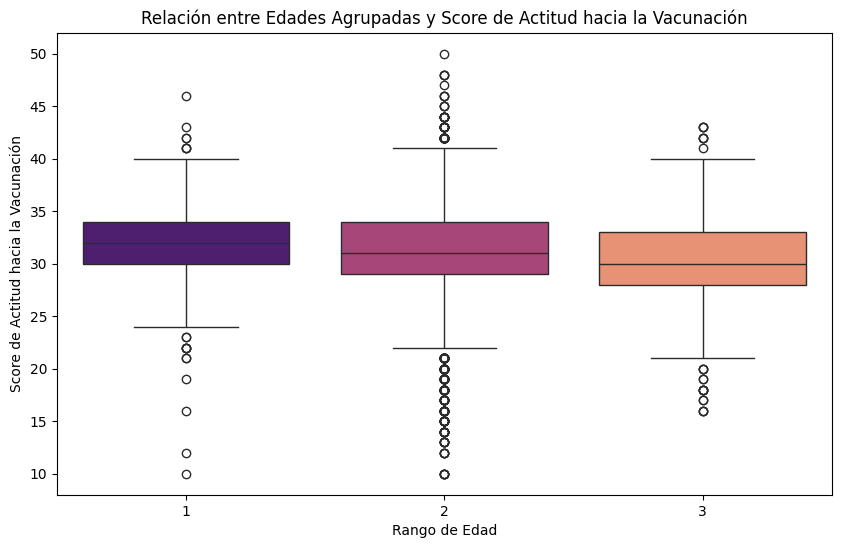

In [ ]:
# Crear una nueva columna con el score total de actitudes hacia la vacunación
cols_vacunavirus = [f'VACUNAVIRUS{i}' for i in range(1, 11)]
df['VACUNAVIRUS_SCORE'] = df[cols_vacunavirus].sum(axis=1)

# Relación entre Edad Continua y Score de Vacunavirus
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Edad_continua', y='VACUNAVIRUS_SCORE', data=df, alpha=0.6, color='green')
plt.title('Relación entre Edad Continua y Score de Actitud hacia la Vacunación')
plt.xlabel('Edad Continua')
plt.ylabel('Score de Actitud hacia la Vacunación')
plt.show()

# Boxplot para analizar relación entre edades agrupadas y score de vacunavirus
plt.figure(figsize=(10, 6))
sns.boxplot(x='Edades_agrupadas', y='VACUNAVIRUS_SCORE', data=df, palette='magma')
plt.title('Relación entre Edades Agrupadas y Score de Actitud hacia la Vacunación')
plt.xlabel('Rango de Edad')
plt.ylabel('Score de Actitud hacia la Vacunación')
plt.show()


Clusters latentes en función de confianza y desconfianza hacia la vacunación

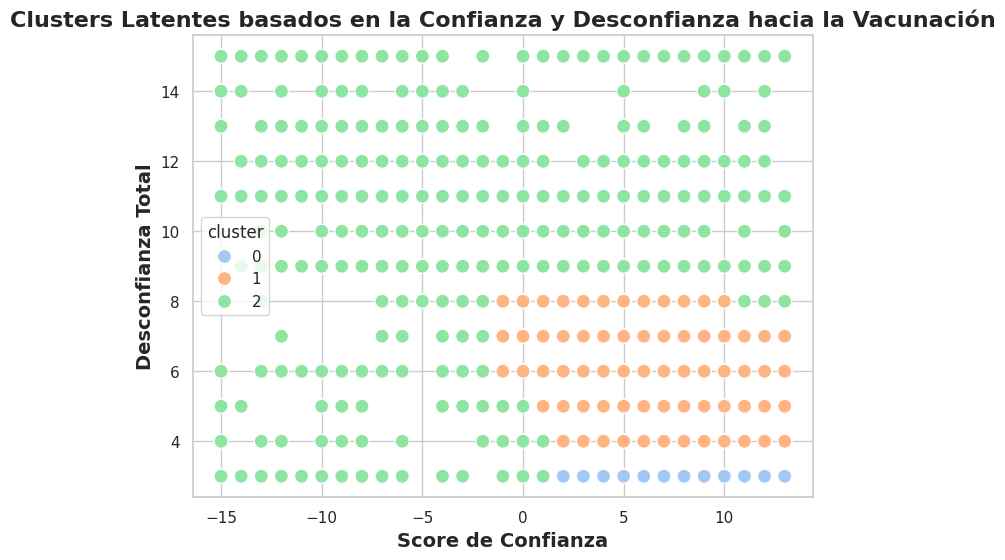

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Cargar el dataset
file_path = 'VACUNAS_SELECCION_a.csv'
df = pd.read_csv(file_path, delimiter=';')

# Crear el score de confianza basado en la falta de confianza (falta_conf_total)
max_confianza = 20
df['score_confianza'] = max_confianza - df['falta_conf_total']

# Seleccionar las columnas de interés (confianza y desconfianza)
data = df[['score_confianza', 'desconfianza_total']].dropna()

# Estandarizar los datos para mejorar el rendimiento del algoritmo de clustering
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Aplicar el modelo de mezcla gaussiana (GMM)
gmm = GaussianMixture(n_components=3, random_state=42)  # Intentamos con 3 clusters inicialmente
gmm.fit(data_scaled)

# Predecir los clusters
clusters = gmm.predict(data_scaled)

# Añadir los clusters al dataframe original
df['cluster'] = clusters

# Visualización de los clusters en un scatterplot
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
palette = sns.color_palette("pastel", 3)

# Gráfico de dispersión con colores pastel según el cluster
sns.scatterplot(x='score_confianza', y='desconfianza_total', hue='cluster', data=df, palette=palette, s=100)

# Añadir títulos y etiquetas
plt.title("Clusters Latentes basados en la Confianza y Desconfianza hacia la Vacunación", fontsize=16, fontweight='bold')
plt.xlabel("Score de Confianza", fontsize=14, fontweight='bold')
plt.ylabel("Desconfianza Total", fontsize=14, fontweight='bold')

plt.show()


Caterización de los diferentes cluster segun actitudes de confianza y desconfianza hacia las vacunas.

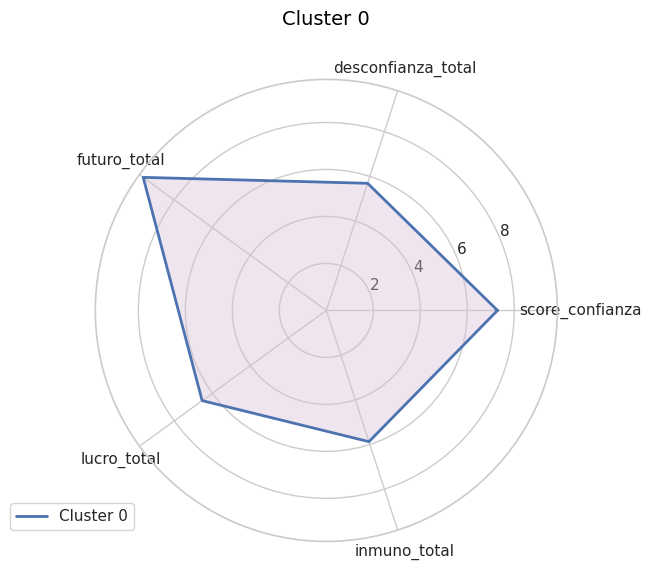

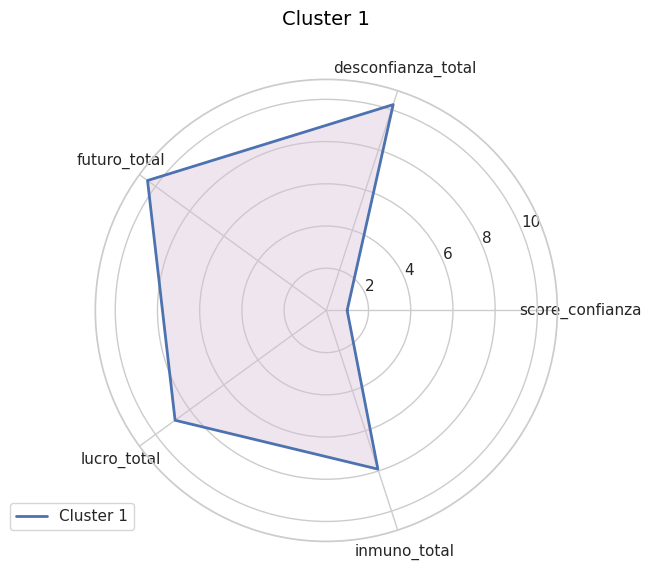

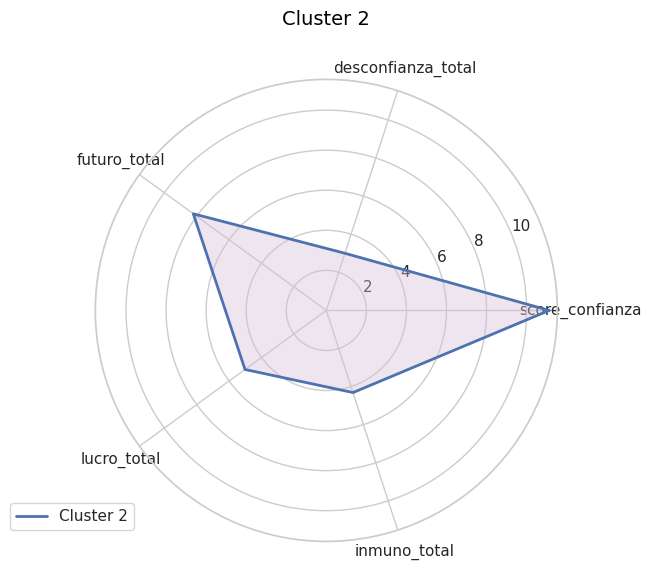

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Cargar el dataset
file_path = 'VACUNAS_SELECCION_a.csv'
df = pd.read_csv(file_path, delimiter=';')

# Crear el score de confianza basado en la falta de confianza (falta_conf_total)
max_confianza = 20
df['score_confianza'] = max_confianza - df['falta_conf_total']

# Seleccionar las variables clave relacionadas con las actitudes hacia la vacunación
variables = ['score_confianza', 'desconfianza_total', 'futuro_total', 'lucro_total', 'inmuno_total']
data = df[variables].dropna()

# Estandarizar los datos para mejorar el rendimiento del clustering
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Aplicar el modelo de mezcla gaussiana (GMM)
gmm = GaussianMixture(n_components=3, random_state=42)  # Intentamos con 3 clusters
gmm.fit(data_scaled)

# Predecir los clusters
df['cluster'] = gmm.predict(data_scaled)

# Caracterización de los clusters: calcular la media de cada variable para cada cluster
cluster_means = df.groupby('cluster')[variables].mean()

# Crear un gráfico de radar para cada cluster
def make_radar_chart(cluster_means, cluster_idx):
    # Número de variables
    categories = list(cluster_means.columns)
    N = len(categories)

    # Ángulos del gráfico
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]  # Cerrar el gráfico

    # Inicializar el gráfico
    plt.figure(figsize=(6, 6))
    ax = plt.subplot(111, polar=True)

    # Primera línea del radar
    values = cluster_means.loc[cluster_idx].values.flatten().tolist()
    values += values[:1]

    # Dibujar los datos
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'Cluster {cluster_idx}')
    ax.fill(angles, values, color='#D8BFD8', alpha=0.4)

    # Añadir etiquetas
    plt.xticks(angles[:-1], categories)

    # Título y leyenda
    plt.title(f'Cluster {cluster_idx}', size=14, color='black', y=1.1)
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    plt.show()

# Visualizar los gráficos de radar para cada cluster
for cluster_idx in cluster_means.index:
    make_radar_chart(cluster_means, cluster_idx)


Perfiles sociograficos y actitudinales. Predicciones posibles

In [ ]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Cargar el dataset
file_path = 'VACUNAS_SELECCION_a.csv'
df = pd.read_csv(file_path, delimiter=';')

# Crear el score de confianza basado en la falta de confianza (falta_conf_total)
max_confianza = 20
df['score_confianza'] = max_confianza - df['falta_conf_total']

# Seleccionar variables sociodemográficas y actitudinales relevantes
variables_sociodemograficas = ['edad_continua', 'niv_edu_3', 'id_genero', 'ocupacion', 'residencia_regiones']
variables_actitudinales = ['score_confianza', 'desconfianza_total', 'futuro_total', 'lucro_total', 'inmuno_total']

# Filtrar los datos relevantes
data = df[variables_sociodemograficas + variables_actitudinales].dropna()

# Estandarizar las variables actitudinales
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[variables_actitudinales])

# Aplicar el modelo de mezcla gaussiana (GMM) para encontrar los clusters
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(data_scaled)

# Predecir los clusters y añadirlos al dataframe
df['cluster'] = gmm.predict(data_scaled)

# Calcular estadísticas para las variables numéricas (medias y desviación estándar)
perfil_numerico = df.groupby('cluster').agg({
    'edad_continua': ['mean', 'std'],  # Edad promedio y desviación estándar
    'score_confianza': ['mean', 'std'],  # Score de confianza promedio y desviación estándar
    'desconfianza_total': ['mean', 'std'],  # Desconfianza promedio y desviación estándar
    'futuro_total': ['mean', 'std'],     # Preocupaciones futuras
    'lucro_total': ['mean', 'std'],      # Preocupaciones por lucro comercial
    'inmuno_total': ['mean', 'std']      # Preferencia por inmunidad natural
})

# Calcular las frecuencias de las variables categóricas
perfil_categorico = {}
for var in ['niv_edu_3', 'id_genero', 'ocupacion', 'residencia_regiones']:
    perfil_categorico[var] = df.groupby('cluster')[var].value_counts(normalize=True).unstack()

# Mostrar el perfil numérico de cada cluster
print("\nPerfil numérico por cluster:")
print(perfil_numerico)

# Mostrar el perfil categórico de cada cluster
for var, tabla in perfil_categorico.items():
    print(f"\nDistribución de {var} por cluster:")
    print(tabla)



Perfil numérico por cluster:
        edad_continua            score_confianza           desconfianza_total  \
                 mean        std            mean       std               mean   
cluster                                                                         
0           36.892819  11.639715        7.286800  3.219519           5.689440   
1           37.820690  12.082234        0.986834  8.143349          10.252665   
2           36.593891  11.016236       11.127874  1.936586           3.000000   

                  futuro_total           lucro_total           inmuno_total  \
              std         mean       std        mean       std         mean   
cluster                                                                       
0        1.195692     9.635903  2.198959    6.533474  2.130074     5.875185   
1        3.370026    10.470846  3.200474    8.856426  3.701039     7.907210   
2        0.000000     8.209334  2.550152    5.017650  1.900761     4.313789   

        

Análisis comparativo bivariado utilizando disposición para pagar la vacuna y las variables sociodemográficas.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
file_path = 'VACUNAS_SELECCION_a.csv'
df = pd.read_csv(file_path, delimiter=';')

# Filtrar las columnas sociodemográficas y la disposición a pagar la vacuna
variables_sociodemograficas = ['edad_continua', 'niv_edu_3', 'id_genero', 'ocupacion', 'residencia_regiones']
df_filtered = df[variables_sociodemograficas + ['pagaria_oro']].dropna()

# Configuración del estilo del gráfico
sns.set(style="whitegrid")

# 1. Gráfico de barras: Disposición a pagar por la vacuna según el nivel educativo
plt.figure(figsize=(8, 6))
sns.barplot(x='niv_edu_3', y='pagaria_oro', data=df_filtered, palette="pastel")
plt.title("Disposición a Pagar por la Vacuna según Nivel Educativo", fontsize=14)
plt.xlabel("Nivel Educativo", fontsize=12)
plt.ylabel("Disposición a Pagar (%)", fontsize=12)
plt.show()

# 2. Gráfico de barras: Disposición a pagar por la vacuna según el género
plt.figure(figsize=(8, 6))
sns.barplot(x='id_genero', y='pagaria_oro', data=df_filtered, palette="pastel")
plt.title("Disposición a Pagar por la Vacuna según Género", fontsize=14)
plt.xlabel("Género", fontsize=12)
plt.ylabel("Disposición a Pagar (%)", fontsize=12)
plt.show()

# 3. Boxplot: Disposición a pagar por la vacuna según la edad
plt.figure(figsize=(8, 6))
sns.boxplot(x='pagaria_oro', y='edad_continua', data=df_filtered, palette="pastel")
plt.title("Disposición a Pagar por la Vacuna según Edad", fontsize=14)
plt.xlabel("Disposición a Pagar", fontsize=12)
plt.ylabel("Edad", fontsize=12)
plt.show()

# 4. Gráfico de barras: Disposición a pagar por la vacuna según la ocupación
plt.figure(figsize=(8, 6))
sns.barplot(x='ocupacion', y='pagaria_oro', data=df_filtered, palette="pastel")
plt.title("Disposición a Pagar por la Vacuna según Ocupación", fontsize=14)
plt.xlabel("Ocupación", fontsize=12)
plt.ylabel("Disposición a Pagar (%)", fontsize=12)
plt.show()

# 5. Gráfico de barras: Disposición a pagar por la vacuna según la región de residencia
plt.figure(figsize=(8, 6))
sns.barplot(x='residencia_regiones', y='pagaria_oro', data=df_filtered, palette="pastel")
plt.title("Disposición a Pagar por la Vacuna según Región de Residencia", fontsize=14)
plt.xlabel("Región de Residencia", fontsize=12)
plt.ylabel("Disposición a Pagar (%)", fontsize=12)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'VACUNAS_SELECCION_a.csv'